<h1 style="text-align:center;;font-weight:bold"><i>BITS CAPSTONE PROJECT</i></h1>
<h3 style="text-align:center;;font-weight:bold"><i>Employee Attrition Prediction</i></h3>

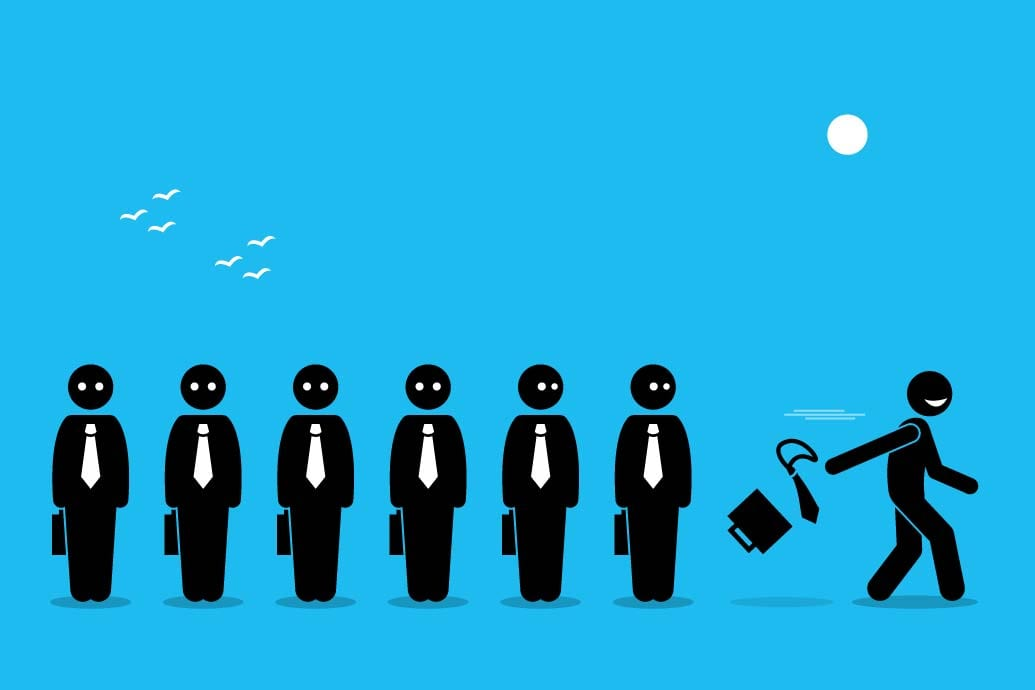

## ***Problem statement***
Employees are the pillars of organization and workforce retention is one of the key factor in
measuring the organizational growth. But swelling attrition levels across the businesses are strait-
jacketing the distraught HR practitioner’s ability to come out with good retention strategies.
Employee attrition must be decreased for a firm as it increases the high training cost and the crucial
business time of an organization.

## ***Objective of the project***
After proving its mettle in sales and marketing, artificial intelligence is also becoming central to
employee-related decisions within HR management.
Therefore, the objective is to build a model to predict employee attrition which could help human
resource department strategize hiring and retention process.
*    The objective is also to thoroughly understand the data in hand and derive business insights,
come up with recommendations for better employee retention and build a Predictive model
that would help predict the required information in an efficient manner.

Employee attrition refers to the gradual loss of employees over time. Most literature on employee
attrition categorizes it as either voluntary or involuntary. Involuntary attrition is thought of as the
mistake of the employee and refers to the organization firing the employee for various reasons.
Voluntary attrition is when the employee leaves the organization by his own will. This paper focuses
on voluntary attrition. A meta-analytic review of voluntary attrition (Predictive Attrition Model:
Using Analytics to predict Employee Attrition, n.d.) found that the strongest predictors of voluntary
attrition included age, pay, and job satisfaction. Other studies showed that several other features,
such as working conditions, job satisfaction, and growth potential also contributed to voluntary
attrition (Cotton & Tuttle). Organizations try to prevent employee attrition by using machine
learning algorithms to predict the risk of an employee leaving, and then take pro-active steps for
preventing such an incident

## ***Machine Learning process flow (Consolidated Approach / Solution Architecture)***
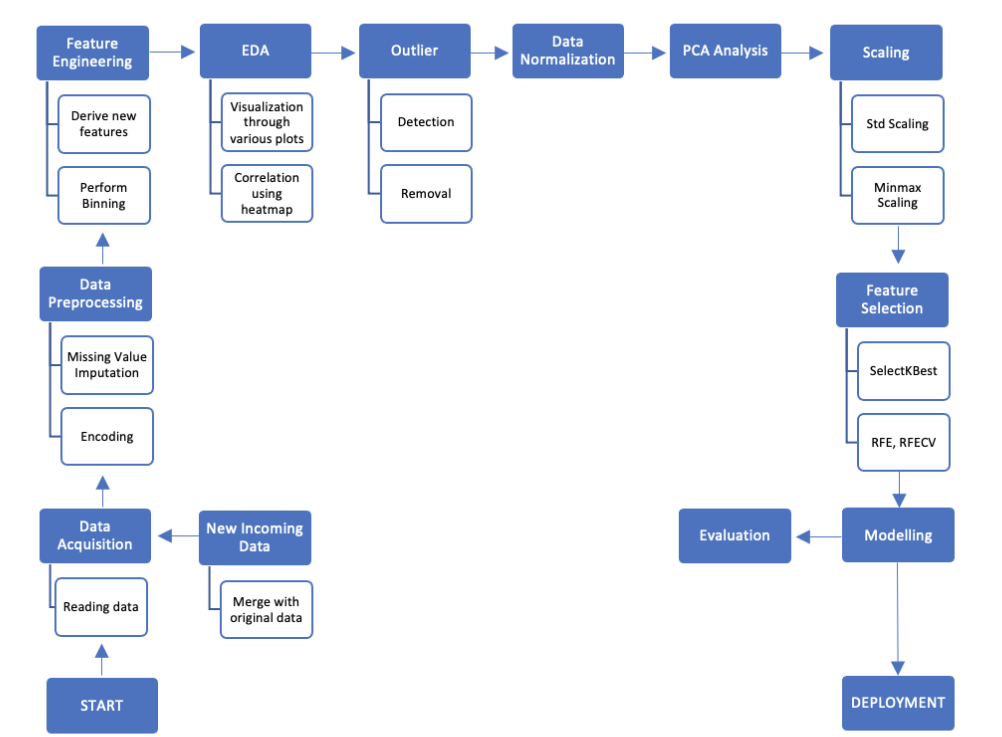

### Importing the Required Libraries

In [2]:
#import all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.style as style; style.use('fivethirtyeight')

%matplotlib inline

### **Reading the dataset**
Given employee data set is in CSV format. Function is created to read data set of any file format like csv, .xlsx , txt or .json.

## ***Dataset columns discreptions***
Here are the details of 13 attributes in the given data set.
* **MMMM - YY**
• Reporting Date (Monthly) – When the employee data is updated
* **Emp_ID**- A unique ID that helps to identify each employee distinctly
* **Age**-Age of the employee on the Reporting Date
* **Gender**-Gender of the Employee
* **City**-City code of the Employee
* **Education Level**-Education Level of the Employee : Bachelor / Master / College
* **Salary**-Salary of the Employee on the Reporting Date
* **Dateof joining**-The date when the Employee joined the Organization
* **LastWorkingDate**
    * Last date of working for the employee –
    * Null for the employees still working in the Organization
    * Last date of working for the employees who left the Organization
* **Joining Designation**-Designation at which the Employee was hired
* **Designation**-Designation of the Employee on the Reporting Date
* **TotalBusinessValue**
    * Total business value acquired by the Employee in a month –
    * Positive value corresponds to successful sold of insurance policy
    * Negative value corresponds to cancellation / refund of the sold insurance policy
    * Zero value corresponds to the case when the Employee couldn’t sell any insurance policy in the given month
* **Quarterly Rating**
    * Quarterly rating of the Employee as evaluated based on Employee’s performance in thegiven quarter
    * Possible values: 1, 2, 3, 4
    * Higher value indicates better performance and better rating

In [3]:
#function to read the file
def read_file(path,file_name):
    import glob
    import os
    file_patteren=file_name
    print(f'File: {file_patteren}')
    files = glob.glob(path +file_patteren, recursive = True)
    if(len(files)==0):
        print('File does not exits')
        return 0
    else:
        for file in files:
            file_text,file_extension=os.path.splitext(file)
            if(file_extension=='.csv'):
                print('Loading CSV file...')
                df=pd.read_csv(file)
            elif(file_extension=='.xlsx'):
                print('Loading excel file...')
                df=pd.read_excel(file)
            elif(file_extension=='.txt'):
                print('Loading text file')
                df=pd.read_csv(file)
            elif(file_extension=='.json'):
                print('Loading the JSON file')
                df=pd.read_json(file)
            else:
                df=pd.read_csv(file)
    return df

In [4]:
df=read_file('./','train.csv')

File: train.csv
Loading CSV file...


In [4]:
df1=read_file('./','train1.csv')

File: train1.csv
File does not exits


### Reading the new incoming data and merging with the original one

In [5]:
if(df1!=0):
    frames = [df, df1]
    result = pd.concat(frames)
    df = result.sort_values(by=['EmpID', 'MMM-YY'], ascending=True)
    df.to_csv('train.csv')

    file = 'test.csv'
    if(os.path.exists(file) and os.path.isfile(file)):
        os.remove(file)
        print("file deleted")
    else:
        print("file not found")

In [14]:
def BasicStat(dataframe):
    print('--------------Basic Description of Data Frame--------------')
    print()
    #total count
    print('Total records in data frame: {}\nTotal Columns:{}'.format(dataframe.shape[0],dataframe.shape[1]))
    print()
    #missing values
    print('Total Missing value in each Column:\n{}\n'.format(dataframe.isnull().sum()))
    print()
    #duplicate count
    print('Total Duplicate Count:{}'.format(dataframe.duplicated().sum()))
    print()
    #data types
    print('Data Types of each column:\n{}'.format(dataframe.dtypes))

In [7]:
BasicStat(df)

--------------Basic Description of Data Frame--------------

Total records in data frame: 19104
Total Columns:13

Total Missing value in each Column:
MMM-YY                    0
EmpID                     0
Age                       0
Gender                    0
City                      0
EducationLevel            0
Salary                    0
DateofJoining             0
LastWorkingDate       17488
JoiningDesignation        0
Designation               0
TotalBusinessValue        0
QuarterlyRating           0
dtype: int64


Total Duplicate Count:0

Data Types of each column:
MMM-YY                object
EmpID                  int64
Age                    int64
Gender                object
City                  object
EducationLevel        object
Salary                 int64
DateofJoining         object
LastWorkingDate       object
JoiningDesignation     int64
Designation            int64
TotalBusinessValue     int64
QuarterlyRating        int64
dtype: object


In [8]:
def dfDescription(dataframe):
    #Discreption of Data Frame
    print(f'Statistics of Data Frame:\n')
    result=dataframe.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T #lamda function is to avoid printing scientific notation
    result['median']=dataframe.median()
    return result

In [9]:
dfDescription(df)

Statistics of Data Frame:



count          mean            std             min  \
EmpID               19104.00000    1415.59113      810.70532         1.00000   
Age                 19104.00000      34.65028        6.26447        21.00000   
Salary              19104.00000   65652.02513    30914.51534     10747.00000   
JoiningDesignation  19104.00000       1.69054        0.83698         1.00000   
Designation         19104.00000       2.25267        1.02651         1.00000   
TotalBusinessValue  19104.00000  571662.07496  1128312.21846  -6000000.00000   
QuarterlyRating     19104.00000       2.00890        1.00983         1.00000   

                            25%           50%           75%             max  \
EmpID                 710.00000    1417.00000    2137.00000      2788.00000   
Age                    30.00000      34.00000      39.00000        58.00000   
Salary              42383.00000   60087.00000   83969.00000    188418.00000   
JoiningDesignation      1.00000       1.00000       2.00000         5.00000   
Designation             1.00000       2.00000       3.00000         5.00000   
TotalBusinessValue      0.00000  250000.00000  699700.00000  33747720.00000   
QuarterlyRating         1.00000       2.00000       3.00000         4.00000   

                      median  
EmpID                 1417.0  
Age                     34.0  
Salary               60087.0  
JoiningDesignation       1.0  
Designation              2.0  
TotalBusinessValue  250000.0  
QuarterlyRating          2.0

* **Salary** column is not normally distributed due to mean is greater then median and has some potentional outliers.
* **TotalBusinessValue** column is highly skwed and has outliers

## Preprocessing

### Missing Values

In [10]:
#missing value
null_df=pd.DataFrame(df.isnull().sum())
null_df.columns=['Null Records']
null_df=null_df[null_df['Null Records']!=0]
null_df

Null Records
LastWorkingDate         17488

<AxesSubplot:>

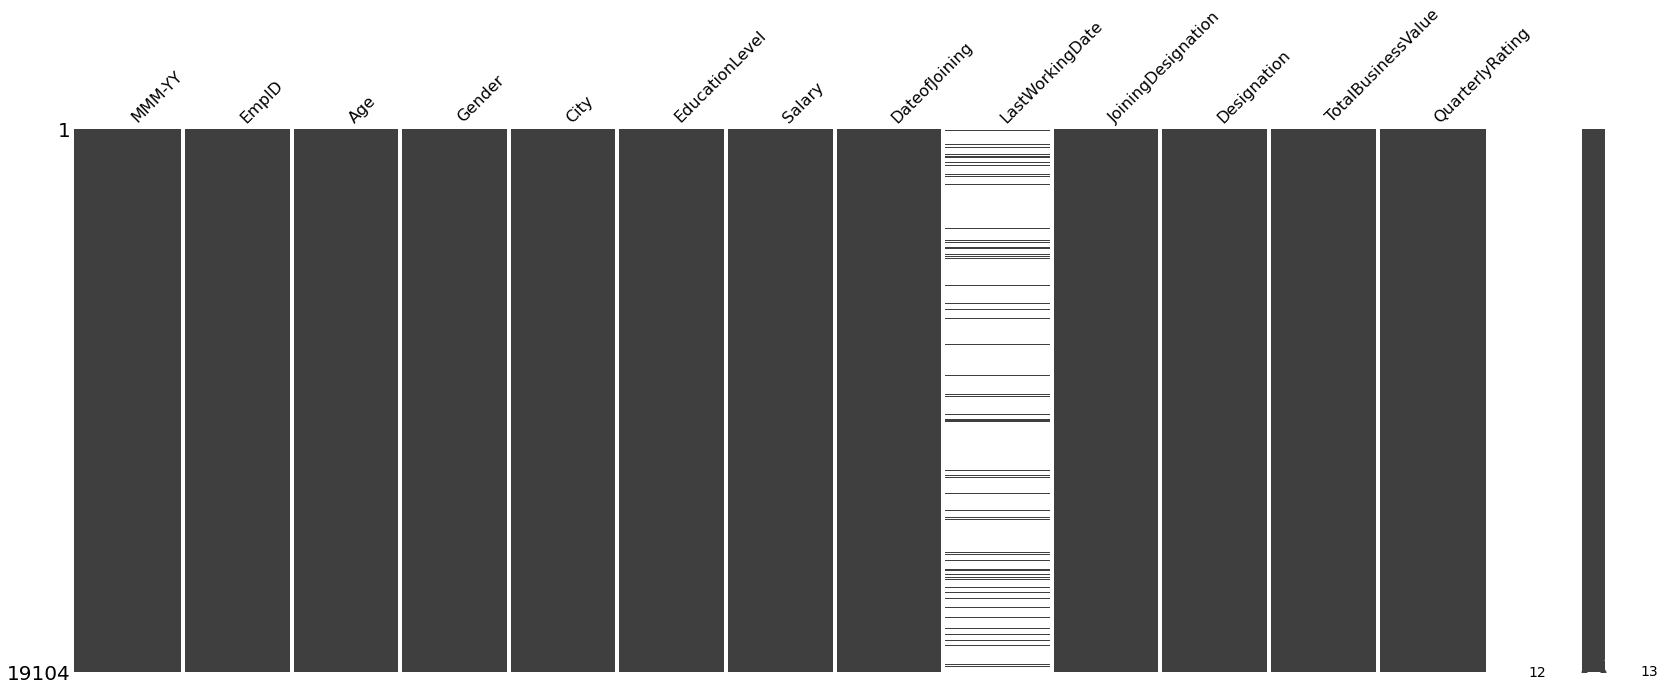

In [11]:
#vsualizing Missing value
import missingno as msno
msno.matrix(df)
#msno.bar(dataframe)

Column LastWorkingDate contains missing value which also indicates that employee didn't resign. None of the other columns have missing values

### Missing Value Imputation

### ***Types of Imputations***
* **1.** **Univariate imputation**, or mean imputation, is when values are imputed using only the target variable. Ex- **SimpleImputer**
* **2.** **Multivariate imputation:** Impute values depending on other factors, such as estimating missing values based on other variables using linear regression.

* **MICE or Multiple Imputation by Chained Equation:** Sometimes data missing in a dataset and is related to the other features and can be predicted using other feature values.It cannot be imputed with general ways of using mean, mode, or median.For doing this linear regression is applied.

* **KNN or K-Nearest Neighbor Imputation:** K-Nearest Neighbor is one of the simplest and easiest technique of imputation in machine learning. It works on Euclidean distance between the neighbor cordinates X and y to know how similar data is.

In [12]:
#function to fill missing value using KNN,MICE and Simple Imputer
def MissingValueImputation(dataframe,method):
    from sklearn.impute import SimpleImputer,KNNImputer
    from sklearn.linear_model import LinearRegression
    from fancyimpute import IterativeImputer
    
    #filtering Numeric and Non-numeric columns
    numericCols = dataframe.select_dtypes(include=["number"]).columns
    nonNumericCols = [col for col in dataframe.columns if col not in numericCols]
    data= dataframe[numericCols]
    
    #Instead of printing all the columns,print only those columns having missing value.
    # Creating a dataframe that contain columns that have missing value. 
    null_df=pd.DataFrame(dataframe.isnull().sum())
    null_df.columns=['Null Records']
    null_df=null_df[null_df['Null Records']!=0]
    

    # summarize total missing
    print('Missing value before imputation:\n{}'.format(dataframe[null_df.index].isnull().sum()))
    print()
    
    if(method=='mice'):
        print('Imputation by MICE..')
        lr = LinearRegression()
        imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10)
        imputedData=imp.fit_transform(data)
    elif(method=='knn'):
        print('Imputation by KNN..')
        imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
        imputer.fit(data)
        imputedData= imputer.transform(data)
    else:
        print('Imputation by mean..')
        imputer = SimpleImputer(strategy='mean')
        imputer.fit(data)
        imputedData= imputer.transform(data)
    
    imputed_df = pd.DataFrame(imputedData)
    imputed_df.columns = data.columns
    finalImputedData = pd.concat([imputed_df, dataframe.loc[:, nonNumericCols]], axis=1)
    
    print('Missing value after imputation:\n{}'.format(finalImputedData[null_df.index].isnull().sum()))
    return finalImputedData

### Inducing Missing Values in the dataset
This is just show how KNN and MIC impute the missing values.

In [13]:
df_with_mv = df[['Age', 'Salary', 'TotalBusinessValue']].copy()
for col in df_with_mv.columns:
    if(col in ['Salary']):
        df_with_mv.loc[df_with_mv.sample(frac=0.05).index, col] = np.nan

In [14]:
df_with_mv.isnull().sum()

Age                     0
Salary                955
TotalBusinessValue      0
dtype: int64

<AxesSubplot:>

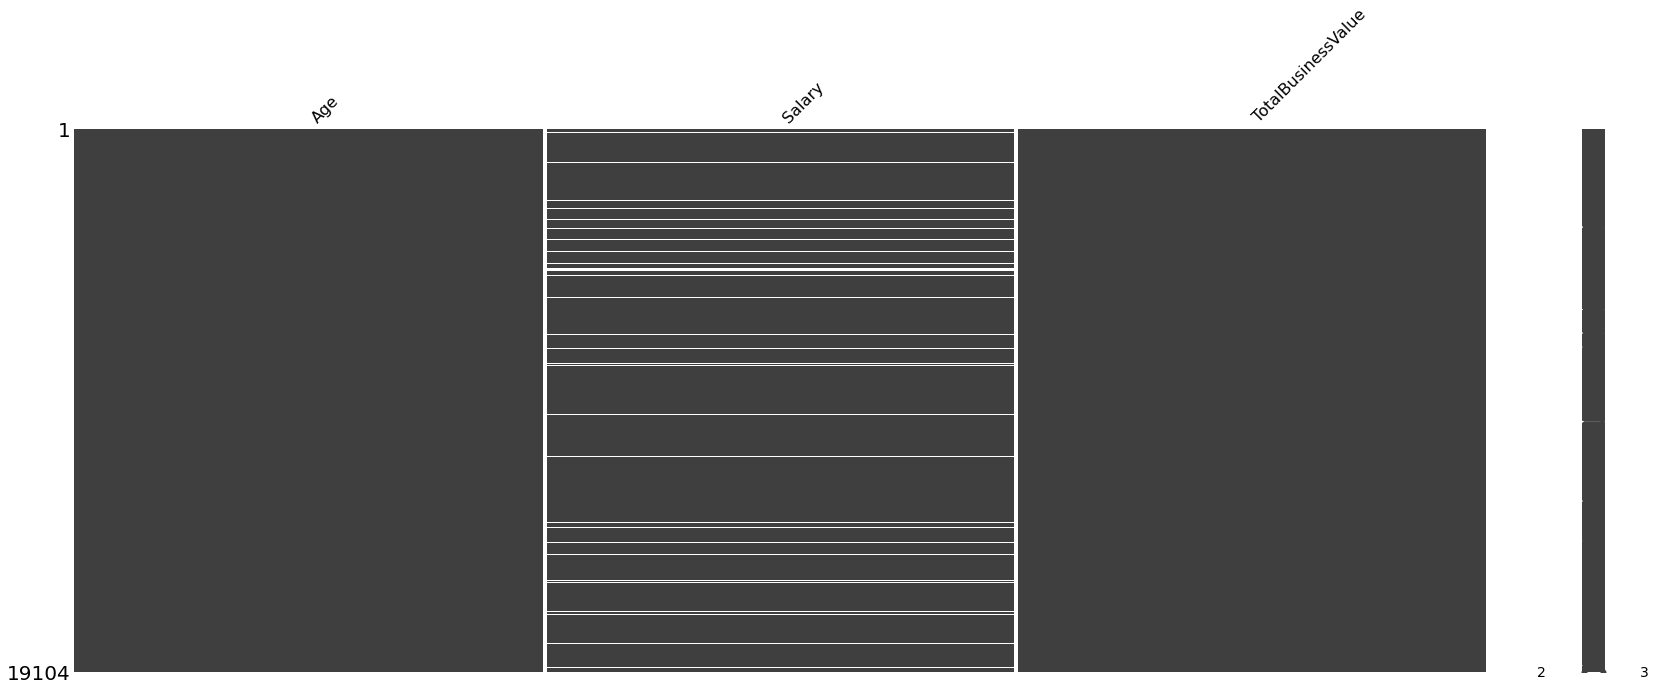

In [15]:
#vsualizing Missing value
import missingno as msno
msno.matrix(df_with_mv)
#msno.bar(dataframe)

5% Missing Values have been induced in columns 'Age', 'Salary, 'Designation', 'TotalBusinessValue' in the dataset

### Comparing Original values with Imputed values from MICE

In [16]:
finalImputedData=MissingValueImputation(df_with_mv,'mice')

Missing value before imputation:
Salary    955
dtype: int64

Imputation by MICE..
Missing value after imputation:
Salary    0
dtype: int64


In [17]:
def ShowImputed(column):
    idx=df_with_mv[df_with_mv[column].isnull()==True].index.tolist()
    imptd_df=pd.concat([pd.DataFrame(df[column]),
                        pd.DataFrame(df_with_mv[column]),
                        pd.DataFrame(finalImputedData[column])],axis=1)
    imptd_df=imptd_df.loc[idx]
    return imptd_df

In [18]:
imptd_df=ShowImputed('Salary')
imptd_df.head()

Salary  Salary        Salary
0    57387     NaN  70715.187027
6    65603     NaN  69046.241302
29  119227     NaN  67647.451074
42  119227     NaN  67728.215012
90   31224     NaN  71401.907449

### Adding Feature for Quarters to see the trend in each Quarter for 2016 and 2017

In [15]:
# new dataframe to see the trend in each quarter for 2016 and 2017
def QuarterDF():
    df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
    #making a seperate dataframe by unique employee id and Q1---Q8 empty column
    emp=df['EmpID'].unique().tolist()
    quarter_df=pd.DataFrame(emp)
    quarter_df.columns=['EmpID']
    q=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']
    for i in q:
        quarter_df[i]=np.nan
    
    # make a seperate dataframe for each employee and take required index value for that emplyoyee
    # iterate through unique year and get the Quarter
    # for 2016 quarter value will go from Q1 to Q4 and for 2017 Q5 to Q8
    for e in emp:
        IDF=df[df['EmpID']==e]
        idx=quarter_df[quarter_df['EmpID']==e].index.tolist()[0]
        for index,y in enumerate(IDF['MMM-YY'].dt.year.tolist()):
            if(y==2016):
                quarter_numer=pd.to_datetime(IDF['MMM-YY'].iloc[index]).quarter
                if(quarter_numer==1):
                    quarter_df['Q1'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                elif(quarter_numer==2):
                    quarter_df['Q2'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                elif(quarter_numer==3):
                    quarter_df['Q3'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                else:
                    quarter_df['Q4'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
            elif(y==2017):
                quarter_numer=pd.to_datetime(IDF['MMM-YY'].iloc[index]).quarter
                if(quarter_numer==1):
                    quarter_df['Q5'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                elif(quarter_numer==2):
                    quarter_df['Q6'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                elif(quarter_numer==3):
                    quarter_df['Q7'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
                else:
                    quarter_df['Q8'].loc[idx]=IDF['QuarterlyRating'].iloc[index]
            else:
                pass
    return quarter_df

In [16]:
quarter_df=QuarterDF()
quarter_df.head()

EmpID   Q1  Q2  Q3  Q4   Q5  Q6  Q7  Q8
0      1  2.0 NaN NaN NaN  NaN NaN NaN NaN
1      2  NaN NaN NaN NaN  1.0 NaN NaN NaN
2      4  1.0 NaN NaN NaN  1.0 NaN NaN NaN
3      5  1.0 NaN NaN NaN  NaN NaN NaN NaN
4      6  NaN NaN NaN NaN  2.0 NaN NaN NaN

### ***Feature Engineering***

Following data are extracted from the given dataset by using the below code
1. Resign (Target Variable): Derived from the Last Working Date
2. Retention Years: Derived from features – Date of Joining, Last Working Date and Latest Reporting Date
3. Promotion: Derived from the difference in the Joining Designation and the Designation at the latest Reporting Date
4. Hike%: Derived from the salary changes across all the reporting dates corresponding to each Employee
5. For each employee it is possible to derive the change in designation and salary in 1 appraisal cycle by comparing 2016 and 2017 data (around 12 months from date of joining)
6. Quarter: As quarterly rating is changing for each employee, we have created 8 quarters per employee (4 quarters in 2016 and 4 quarters in 2017) to understand the rating change trend.
7. Total business value also varies with each quarter. We have extracted the change in total business value for each employees to understand their sales performance.
8. New features added Salary_change, Designation_change, TotalBusinessValue_change,QuarterlyRating_change,
9. Year & Month columns are derived corresponding to the Date columns
10. BinnedSalary and BinnedAge columns are derived from binning the Salary and Age columns.

### Determining the variation in a column for each Employee

In [5]:
#Function to Determining the variation
#shift is used to shift the value by index
def ChangeInValue(dataframe,column):
    new_column=column+'_change'
    dataframe[new_column]=dataframe.groupby(['EmpID'])[column].transform(lambda y: y - y.shift(1)).apply(lambda x: 1 if x>0 else (-1 if x<0 else 0))
    #dataframe[new_column]=dataframe[new_column].apply(lambda x: 'Remain Same/Decreased' if x<=0 else 'Increased')
    print('Change in Value Column added..')
    return dataframe

### Function for binning of any column.

In [6]:
def BinningCol(dataframe, col):
    label = [1,2,3]
    dataframe['bins_'+col] = pd.cut(dataframe[col],3)
    print('intervals in ', col)
    print(':',dataframe['bins_'+col].unique())
    return pd.cut(dataframe[col],3,labels=label)

### Creating New relevant Features from Existing Features

In [7]:
def NewColumn(dataframe):
    # adding target column
    dataframe['Resign']=np.where(dataframe['LastWorkingDate'].isnull()==True,0,1)
    
    # Hike Column
    dataframe['SalaryChangeAmount']=dataframe.groupby(['EmpID'])['Salary'].transform(lambda y:y-y.shift(1)).apply(lambda x: x if x>0 else (-x if x<0 else 0))
    dataframe['Hike%']=(dataframe['SalaryChangeAmount'])*100//dataframe['Salary']
    dataframe.drop('SalaryChangeAmount',axis=1,inplace=True)
    
   # Promotion Column (Yes/No)
    dataframe['Promotion']=dataframe['Designation']-dataframe['JoiningDesignation']    
    
    # Replacing Promotion values to Yes and No
    dataframe['Promotion']=dataframe['Promotion'].replace(to_replace =[1,2,3,4], value ="Yes").replace(to_replace =[0], value ="No").astype('category')
    print('Resign,Hike and Promotion column added,..')
    
    # Sallary Binning
    dataframe['BinnedSalary']= BinningCol(dataframe, 'Salary') #applying the function
    print('BinnedSalary column added,..')
    
    # Age binning
    dataframe['BinnedAge']= BinningCol(dataframe, 'Age') #applying the function
    print('BinnedAge column added,..')


    return dataframe

### Below function is to change the columns data type.

In [8]:
#function to change the datatype of column
def ChangeDataTypes(dataframe,column,column_type):
    import datetime as datetime
    for c in column:
        if(column_type=='category'):
            dataframe[column]=dataframe[column].astype('category')
        elif(column_type=='date'):
            #dataframe[column]=pd.to_datetime(dataframe[column],format='%d-%m-%Y').dt.tz_localize(None)
            dataframe[column]=pd.to_datetime(dataframe[column],format='%d-%m-%Y')
        elif(column_type=='float'):
            dataframe[column]=dataframe[column].astype('float')
        else:
            dataframe[column]=dataframe[column].astype('int64')
    #print(f'Data types have been changed to {column_type}..')
    return dataframe

### Below function is added to remove any duplicate items based on the column name.

In [9]:
def remove_duplicate(dataframe,column_name):
    #Aggregating the TotalBusinessValue before removing the duplicates
    total_tvb=dataframe[['EmpID','TotalBusinessValue']].groupby('EmpID').sum()
    total_tvb.reset_index(drop = True,inplace = True)
    
    #Cumulative sum of TotalBusinessValue_change before removing the duplicates
    # total_tvbc=dataframe[['EmpID','TotalBusinessValue_change']].groupby('EmpID').sum()
    # total_tvbc.reset_index(drop = True,inplace = True)
    
    #remove duplicate
    print(f'Before Removing the duplicates:{len(dataframe)}')
    print('Removing the Duplicate')
    dataframe=dataframe.drop_duplicates([column_name],keep='last')
    dataframe.reset_index(drop = True,inplace = True)
    print(f'After Removing the duplicates:{len(dataframe)}')
    
    #replacing the TotalBusinessValue value by Aggrgating values
    dataframe['TotalBusinessValue']=total_tvb['TotalBusinessValue']
    #dataframe['TotalBusinessValue_change']=total_tvbc['TotalBusinessValue_change']
    return dataframe

### Extraction of retention years from date of joining and last working day

In [10]:
def RetentionYear(dataframe):
    cnt = 0
    dataframe['DateofJoining'] = pd.to_datetime(dataframe['DateofJoining'])
    dataframe['LastWorkingDate'] = pd.to_datetime(dataframe['LastWorkingDate'])
    dataframe['MMM-YY'] = pd.to_datetime(dataframe['MMM-YY'])
    for j, val in enumerate(dataframe.columns.values):
        k = j
    dataframe.insert(k+1, "Retention_years", np.nan)
    for i in range(0,len(dataframe['LastWorkingDate'])):
        f1 = pd.isnull(dataframe['LastWorkingDate'].loc[i])
        if(f1 == False):   
            dataframe["Retention_years"].loc[i]=(dataframe['LastWorkingDate'].loc[i]- dataframe['DateofJoining'].loc[i])/np.timedelta64(1, 'Y')
            if(pd.isnull(dataframe["Retention_years"].loc[i])):
                dataframe["Retention_years"].loc[i]=(dataframe["MMM-YY"].loc[i]-dataframe["DateofJoining"].loc[i])/np.timedelta64(1, 'Y')
        else:
            dataframe["Retention_years"].loc[i]=(dataframe["MMM-YY"].loc[i]-dataframe["DateofJoining"].loc[i])/np.timedelta64(1, 'Y')
            if(dataframe["MMM-YY"].loc[i] == dataframe["DateofJoining"].loc[i]):
                dataframe["Retention_years"].loc[i] = 0
                
        if(dataframe["Retention_years"].loc[i] < 0):
            cnt = cnt + 1
            dataframe["Retention_years"].loc[i] = 0
    
    print("No. of Cases where Date of Joining is later than Last Working Date:",cnt)
    dataframe["Retention_years"]=dataframe['Retention_years'].round(decimals=2)
    return dataframe

def PromoPerYr(dataframe):
    for j, val in enumerate(dataframe.columns.values):
        k = j
    dataframe.insert(k+1, "PromoPerYr", np.nan)
    for i in range(0,len(dataframe['Retention_years'])):
        if(dataframe['Retention_years'].loc[i] != 0):
            dataframe['PromoPerYr'].loc[i] = (dataframe['Designation'].loc[i] -dataframe['JoiningDesignation'].loc[i])/dataframe['Retention_years'].loc[i] 
            
    return dataframe

### Function to get the count of promotion.

In [11]:
def CountUnexpectedlyLargePromotions(df):
    df['Designation'] = pd.to_numeric(df['Designation'])
    df['JoiningDesignation'] = pd.to_numeric(df['JoiningDesignation'])
    cnt = 0
    for i in range(0,len(df['JoiningDesignation'])):
        if((df['Designation'].loc[i] - df['JoiningDesignation'].loc[i]) > df['Retention_years'].loc[i]):
            cnt = cnt + 1

    print('No. of cases where employees have got more than 1 promotion per year: ', cnt)
    
    return cnt

### Single function to call all above function to preprocess the raw CSV file for further EDA purpose.

In [12]:
# Single function that include all the function to process the file
def Preprocess(path,file):
    
    # read the file
    df=read_file(path,file)
    print()
    
    # Change in value
    columns=['Salary','Designation','TotalBusinessValue','QuarterlyRating']
    for c in columns:
        df=ChangeInValue(df,c)
    print()
    
    # Adding columns
    df=NewColumn(df)
    print()
    
    #changing the data types into category
    cat_column=['Gender','EducationLevel','QuarterlyRating','Resign']
    df=ChangeDataTypes(df,cat_column,'category')
    print()
    
    ##changing the data types into date
    column=['MMM-YY','DateofJoining','LastWorkingDate']
    for col in column:
        df=ChangeDataTypes(df,col,'date')
    print()
    
    # Calling function to Extract year,month and quarter
#     df=ExtractDate(df)
#     print()
    
    
    # Remove the duplicate
    df=remove_duplicate(df,'EmpID')
    print()
    
     #Add the retention year column
    df=RetentionYear(df)
    
    #Add the PromoPerYr year column
    df=PromoPerYr(df)
    
    count = CountUnexpectedlyLargePromotions(df)
    
    print('Max no. of promotions per year: ',df['PromoPerYr'].max())
    
    cat_column=['JoiningDesignation','Designation',]
    df=ChangeDataTypes(df,cat_column,'category')
    print()
    
    df['YearsOfExperience'] = round(df['Retention_years'])
    
    df.drop(['bins_Age', 'bins_Salary'],axis=1,inplace=True)
    
    return df

In [13]:
pre_df=Preprocess('./','train.csv')
pre_df.head()

File: train.csv
Loading CSV file...

Change in Value Column added..
Change in Value Column added..
Change in Value Column added..
Change in Value Column added..

Resign,Hike and Promotion column added,..
intervals in  Salary
: [(10569.329, 69970.667], (69970.667, 129194.333], (129194.333, 188418.0]]
Categories (3, interval[float64, right]): [(10569.329, 69970.667] < (69970.667, 129194.333] < (129194.333, 188418.0]]
BinnedSalary column added,..
intervals in  Age
: [(20.963, 33.333], (33.333, 45.667], (45.667, 58.0]]
Categories (3, interval[float64, right]): [(20.963, 33.333] < (33.333, 45.667] < (45.667, 58.0]]
BinnedAge column added,..



Before Removing the duplicates:19104
Removing the Duplicate
After Removing the duplicates:2381

No. of Cases where Date of Joining is later than Last Working Date: 60
No. of cases where employees have got more than 1 promotion per year:  40
Max no. of promotions per year:  33.333333333333336



MMM-YY  EmpID  Age  Gender City EducationLevel  Salary DateofJoining  \
0 2016-03-01      1   28    Male  C23         Master   57387    2015-12-24   
1 2017-12-01      2   31    Male   C7         Master   67016    2017-11-06   
2 2017-04-01      4   43    Male  C13         Master   65603    2016-12-07   
3 2016-03-01      5   29    Male   C9        College   46368    2016-01-09   
4 2017-12-01      6   31  Female  C11       Bachelor   78728    2017-07-31   

  LastWorkingDate JoiningDesignation  ... TotalBusinessValue_change  \
0      2016-03-11                  1  ...                         1   
1             NaT                  2  ...                         0   
2      2017-04-27                  2  ...                        -1   
3      2016-03-07                  1  ...                        -1   
4             NaT                  3  ...                        -1   

   QuarterlyRating_change Resign  Hike%  Promotion  BinnedSalary  BinnedAge  \
0                       0      1    0.0         No             1          1   
1                       0      0    0.0         No             1          1   
2                       0      1    0.0         No             1          2   
3                       0      1    0.0         No             1          1   
4                       0      0    0.0         No             2          1   

  Retention_years  PromoPerYr YearsOfExperience  
0            0.21         0.0               0.0  
1            0.07         0.0               0.0  
2            0.39         0.0               0.0  
3            0.16         0.0               0.0  
4            0.34         0.0               0.0  

[5 rows x 25 columns]

<AxesSubplot:>

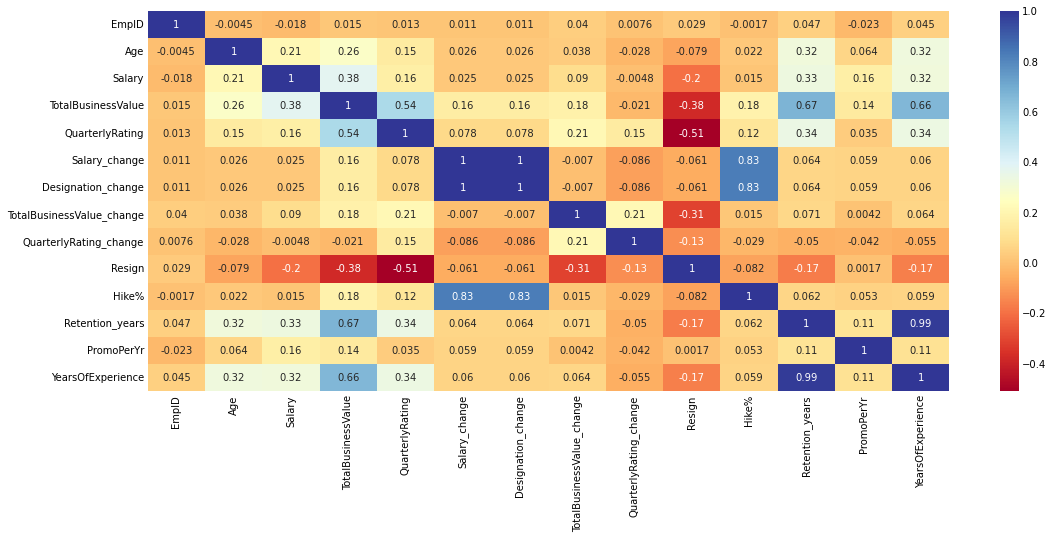

In [28]:
#heatmap
pre_df=ChangeDataTypes(pre_df,['Resign','QuarterlyRating'],'int64')
plt.figure(figsize=(16,7))
sns.heatmap(pre_df.corr(),annot=True,cmap='RdYlBu')

* **TotalBusinessValue** is positively corelated with YearsOfExperience,Retention_years,QuarterlyRating and Salary.
* **Salary_Change** is highly corelated with Hike. This is true because when a employee gets hike his/her salary will also change.

In [29]:
# Filter for correlation value greater than 0.7
corr=pre_df.corr()
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.7) & (sort < 1)]

YearsOfExperience   Retention_years       0.985301
Retention_years     YearsOfExperience     0.985301
Hike%               Designation_change    0.828417
Salary_change       Hike%                 0.828417
Designation_change  Hike%                 0.828417
Hike%               Salary_change         0.828417
dtype: float64

## ***Encoding***

Function to convert any categorical column into numerical column based on diffrent statistical technique.

In [14]:
#function for One-hot encoding and Label Encoding
def convertToNumerical(dataframe,columns,encoding):
    from sklearn.preprocessing import LabelEncoder
    from category_encoders import TargetEncoder
    
    if(encoding=='one-hot'):
        #print('One-Hot Encoding..')
        for c in columns:
            new_df='df_'+c
            new_df=pd.get_dummies(dataframe[c])
            dataframe=pd.concat([dataframe,new_df],axis=1)
            dataframe.drop(c,axis=1,inplace=True)
    elif(encoding=='target'):
        #print('Target Encoding...')
        #cat_column=['Gender','EducationLevel','JoiningDesignation','Designation','QuarterlyRating','Resign']
        cat_column=['Resign']
        dataframe=ChangeDataTypes(dataframe,cat_column,'int64')
        tr=TargetEncoder(cols=['City'])
        dataframe=tr.fit_transform(X=dataframe,y=dataframe['Resign'])
        dataframe=ChangeDataTypes(dataframe,cat_column,'category')
    else:
        #print('Label Encoding...')
        for c in columns:
            lr=LabelEncoder()
            dataframe[c]=lr.fit_transform(dataframe[c])
    return dataframe

In [14]:
# Label Encoding
df_t1=pre_df.copy()
columns=['EducationLevel','Promotion','Gender','City']
df_t1=convertToNumerical(df_t1,columns,"")
df_t1.head()

MMM-YY  EmpID  Age  Gender  City  EducationLevel  Salary DateofJoining  \
0 2016-03-01      1   28       1    15               2   57387    2015-12-24   
1 2017-12-01      2   31       1    26               2   67016    2017-11-06   
2 2017-04-01      4   43       1     4               2   65603    2016-12-07   
3 2016-03-01      5   29       1    28               1   46368    2016-01-09   
4 2017-12-01      6   31       0     2               0   78728    2017-07-31   

  LastWorkingDate JoiningDesignation  ... TotalBusinessValue_change  \
0      2016-03-11                  1  ...                         1   
1             NaT                  2  ...                         0   
2      2017-04-27                  2  ...                        -1   
3      2016-03-07                  1  ...                        -1   
4             NaT                  3  ...                        -1   

   QuarterlyRating_change Resign  Hike%  Promotion  BinnedSalary  BinnedAge  \
0                       0      1    0.0          0             1          1   
1                       0      0    0.0          0             1          1   
2                       0      1    0.0          0             1          2   
3                       0      1    0.0          0             1          1   
4                       0      0    0.0          0             2          1   

  Retention_years  PromoPerYr  YearsOfExperience  
0            0.21         0.0                0.0  
1            0.07         0.0                0.0  
2            0.39         0.0                0.0  
3            0.16         0.0                0.0  
4            0.34         0.0                0.0  

[5 rows x 25 columns]

In [15]:
# Target Encoding
df_test = df_t1.copy()
columns = ['City']
df_test=convertToNumerical(df_test,columns,"target")
df_test.head()

MMM-YY  EmpID  Age  Gender      City  EducationLevel  Salary  \
0 2016-03-01      1   28       1  0.770270               2   57387   
1 2017-12-01      2   31       1  0.684211               2   67016   
2 2017-04-01      4   43       1  0.816901               2   65603   
3 2016-03-01      5   29       1  0.706667               1   46368   
4 2017-12-01      6   31       0  0.703125               0   78728   

  DateofJoining LastWorkingDate JoiningDesignation  ...  \
0    2015-12-24      2016-03-11                  1  ...   
1    2017-11-06             NaT                  2  ...   
2    2016-12-07      2017-04-27                  2  ...   
3    2016-01-09      2016-03-07                  1  ...   
4    2017-07-31             NaT                  3  ...   

  TotalBusinessValue_change  QuarterlyRating_change Resign  Hike%  Promotion  \
0                         1                       0      1    0.0          0   
1                         0                       0      0    0.0          0   
2                        -1                       0      1    0.0          0   
3                        -1                       0      1    0.0          0   
4                        -1                       0      0    0.0          0   

   BinnedSalary  BinnedAge Retention_years  PromoPerYr  YearsOfExperience  
0             1          1            0.21         0.0                0.0  
1             1          1            0.07         0.0                0.0  
2             1          2            0.39         0.0                0.0  
3             1          1            0.16         0.0                0.0  
4             2          1            0.34         0.0                0.0  

[5 rows x 25 columns]

<AxesSubplot:>

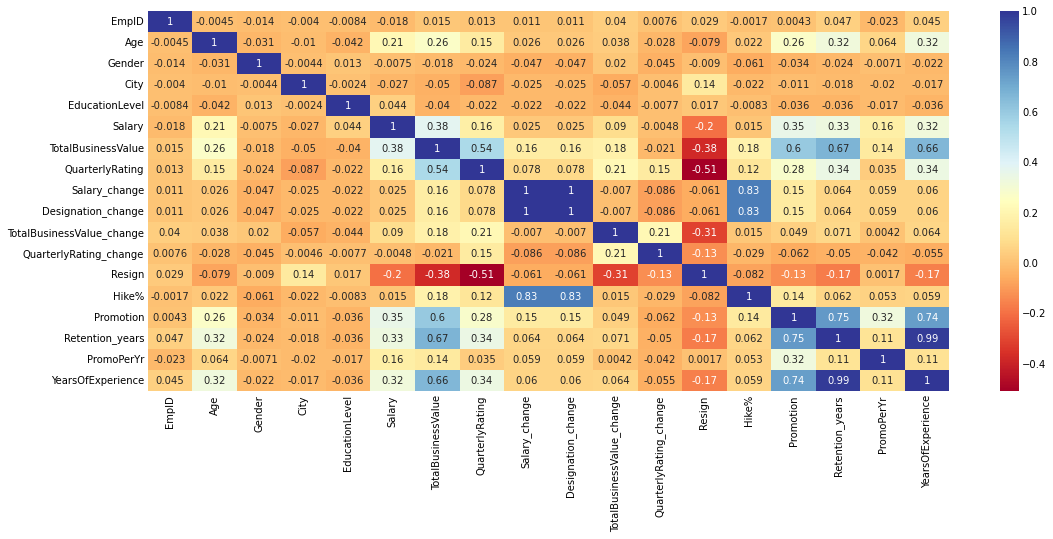

In [17]:
#heatmap
df_test=ChangeDataTypes(df_test,['Resign','QuarterlyRating'],'int64')
plt.figure(figsize=(16,7))
sns.heatmap(df_test.corr(),annot=True,cmap='RdYlBu')

without scaling


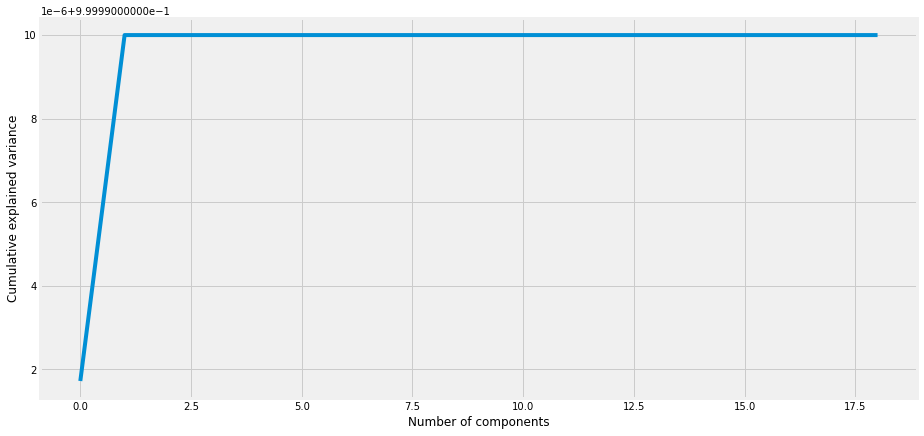

with scaling


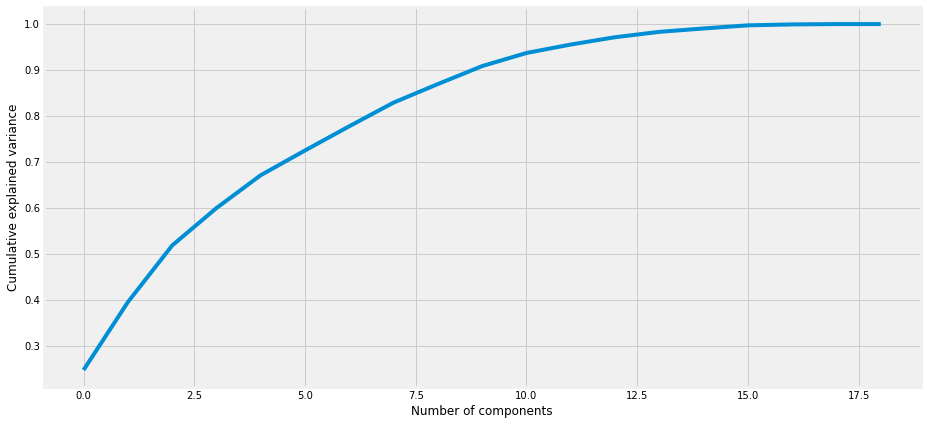

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pc_df=df_test.drop(['DateofJoining', 'LastWorkingDate', 'PromoPerYr', 'Resign','EmpID','MMM-YY'],axis=1)
scalar = StandardScaler()
pc_df_scaled = pd.DataFrame(scalar.fit_transform(pc_df), columns=pc_df.columns)
n_components = len(pc_df.columns)
pca_ = PCA(n_components)
x_new = pca_.fit_transform(pc_df)
print("without scaling")
plt.figure(figsize=(14,7))
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print("with scaling")
x_new = pca_.fit_transform(pc_df_scaled)
plt.figure(figsize=(14,7))
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

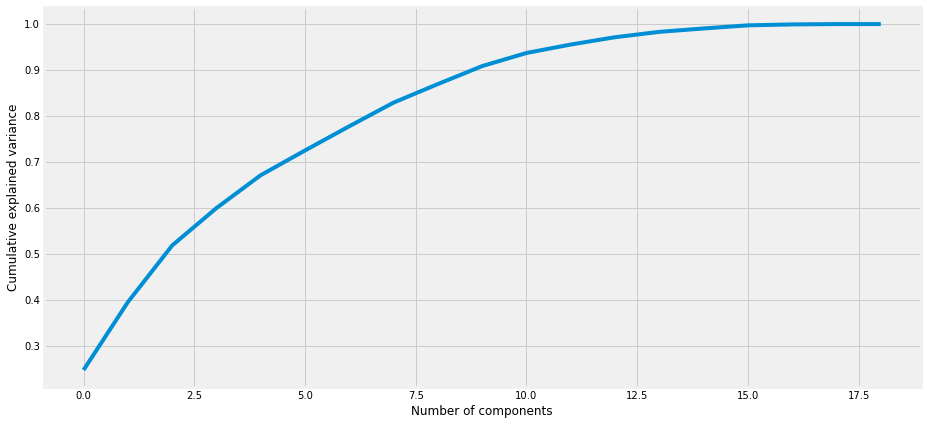

(19, 2)


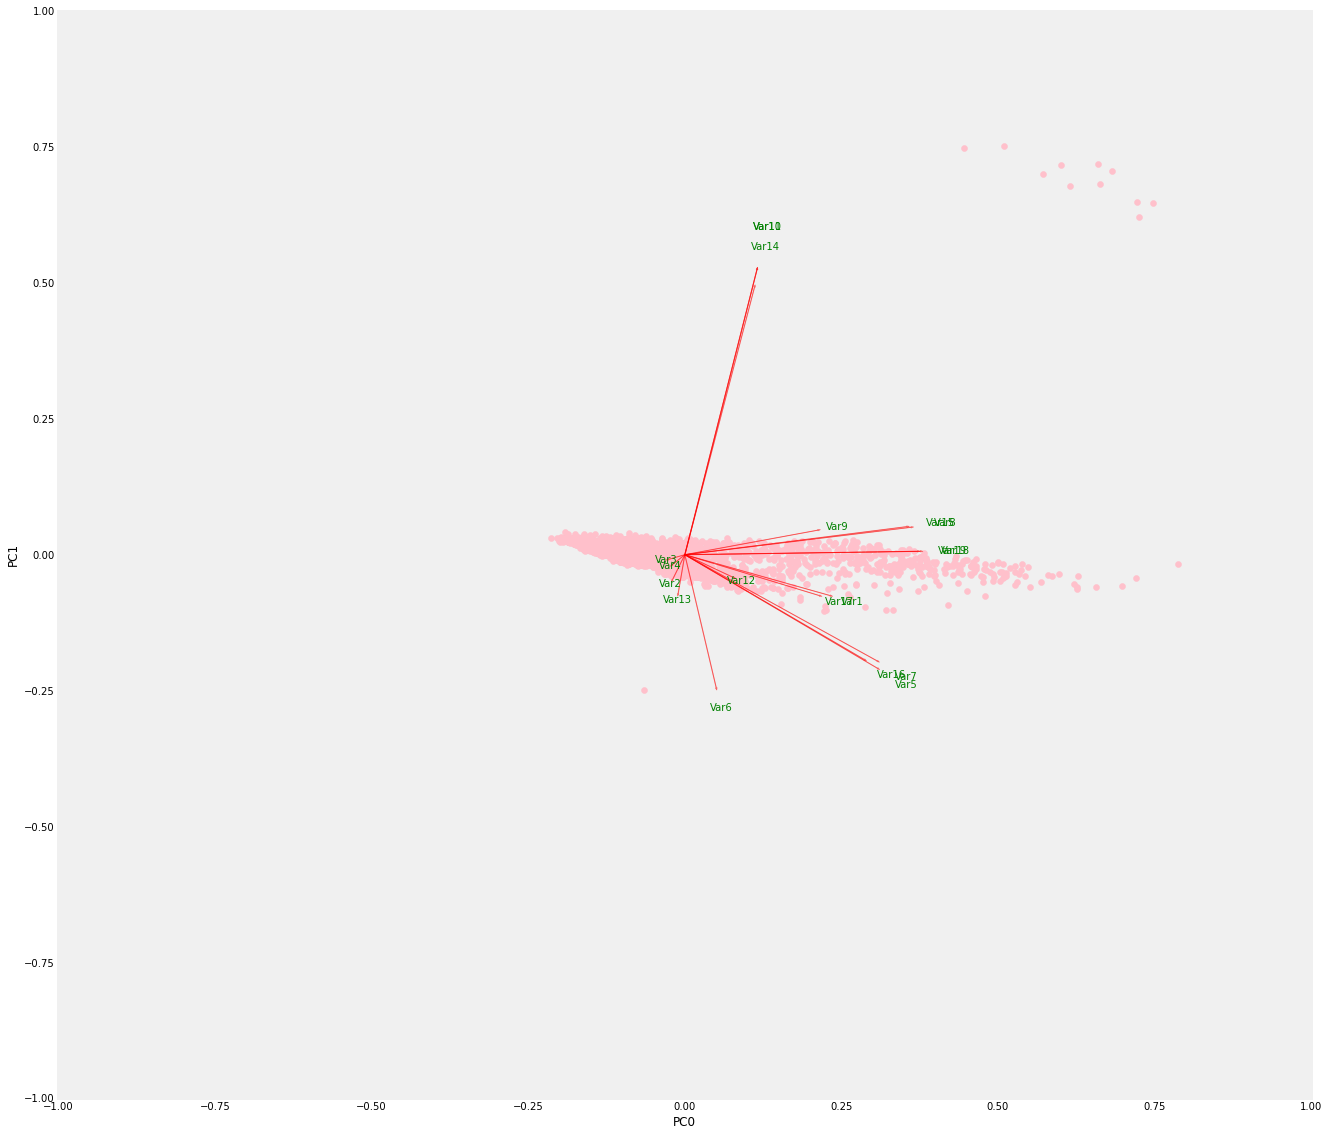

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pc_df=df_test.drop(['DateofJoining', 'LastWorkingDate', 'PromoPerYr', 'Resign','MMM-YY', 'EmpID'],axis=1)

n_components1 = 2
n_components2 = len(pc_df.columns)
pca1 = PCA(n_components1)
pca2 = PCA(n_components2)

scalar = StandardScaler()
pc_df_scaled = pd.DataFrame(scalar.fit_transform(pc_df), columns=pc_df.columns)

x_new = pca1.fit_transform(pc_df_scaled)

x_old = pca2.fit_transform(pc_df_scaled)

plt.figure(figsize=(14,7))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

y='pink'
plt.figure(figsize=(20,20))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    print(coeff.shape)
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

columns=[]
for i in range(n_components1):
    name='PCA'+str(i)
    columns.append(name)
df_pca = pd.DataFrame(x_new)
df_pca.columns=columns

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(0))
plt.ylabel("PC{}".format(1))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca1.components_[0:2, :]))
plt.show()

In [35]:
print(abs( pca1.components_ ))

[[0.23195205 0.01986769 0.02623355 0.0198847  0.30749779 0.05012118
  0.30706267 0.36094568 0.21219155 0.11518137 0.11518137 0.0779326
  0.01077463 0.11125703 0.35423377 0.28643518 0.21483973 0.37582057
  0.37152831]
 [0.07518158 0.04641006 0.0086286  0.01835774 0.20893264 0.24484463
  0.19543268 0.05038696 0.04509967 0.52465206 0.52465206 0.0421492
  0.0719578  0.49232306 0.05159701 0.19276268 0.07523294 0.00630376
  0.00619602]]


Here, pca.components_ has shape [n_components, n_features]. Thus, by looking at the PC1 (First Principal Component) which is the first row: 

[0.23140686 0.01972844 0.02608535 0.01975478 0.30747798 0.05018662
  0.30699051 0.36091382 0.21247709 0.11501252 0.11501252 0.07833938
  0.0103082  0.11113449 0.35402721 0.28634022 0.21441835 0.37615738
  0.37206926]
  
We can conclude that feature 18,19(or Var 18,19 in the biplot) is the most important. 

And by looking at the PC2 (First Principal Component) which is the second row, we can conclude that feature 10, 11(or Var 10,11 in the biplot) is the most important. 

In [36]:
pca1.explained_variance_ratio_

array([0.24735142, 0.14764965])

PC0 and PC1 together explains 38% of variance ratio.

## ***Outlier Detection***
An outlier is an individual point of data that is distant from other points in the dataset. It is an anomaly in the dataset that may be caused by a range of errors in capturing, processing or manipulating data. Outliers can skew overall data trends, so outlier detection methods are an important part of statistics.

Outlier detection is particularly important within machine learning. Models are trained on huge arrays of training data. The model understands the relationship between data points to help predict future events or categorise live data. Outliers in the training data may skew the model, lowering its accuracy and overall effectiveness.

* **InterQuartile Range Method**
* **Z-Score Method**
* **BoxPlot Method**
* **Unsupervised Method**
    * DBSCAN
    * LocalOutliersFactor

## ***1. Outlier Detection using InterQuartile Range***
In descriptive statistics, the interquartile range tells you the spread of the middle half of your distribution.

Quartiles segment any distribution that’s ordered from low to high into four equal parts. The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.
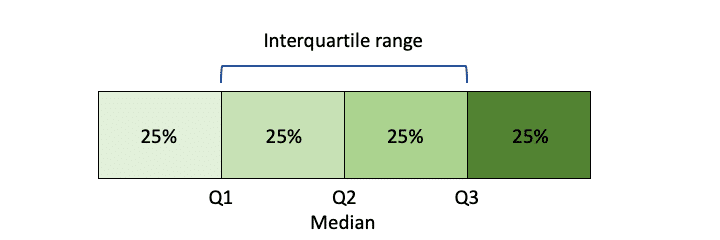

Whereas the range gives you the spread of the whole data set, the interquartile range gives you the range of the middle half of a data set.

The formula for inter-quartile range is given below:
$$IQR=Q3-Q1$$

* Where,
    * IQR=Inter-quartile range
    * Q1 = First quartile
    * Q3 = Third quartile

* Q1 can also be found by using the following formula:
$$Q1=\frac{(n+1)^th}{4}Term$$

* Q3 can also be found by using the following formula:
$$Q3=\frac{3(n+1)^th}{4}Term$$
<hr>

### ***How IQR Identify the outliers?***
* the interquartile range can be used to detect outliers. This is done using these steps:
    * Calculate the interquartile range for the data (IQR=Q3-Q1).
    * Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers) (1.5*IQR).
    * Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier (Q3+1.5*IQR).
    * Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier (Q1-1.5*IQR).


## ***2. Outlier Detection using Z-Score***
* **Z score** is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.
Z-score for a column can be calucluated by:

$$
z=\frac{(x-mean)}{(std.deviation)}
$$

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

## ***3. Outlier Detection using Box Plots***

#### ***BoxPlot***
A boxplot, also called a box and whisker plot, is a way to show the spread and centers of a data set. Measures of spread include the interquartile range and the mean of the data set. Measures of center include the mean or average and median (the middle of a data set).

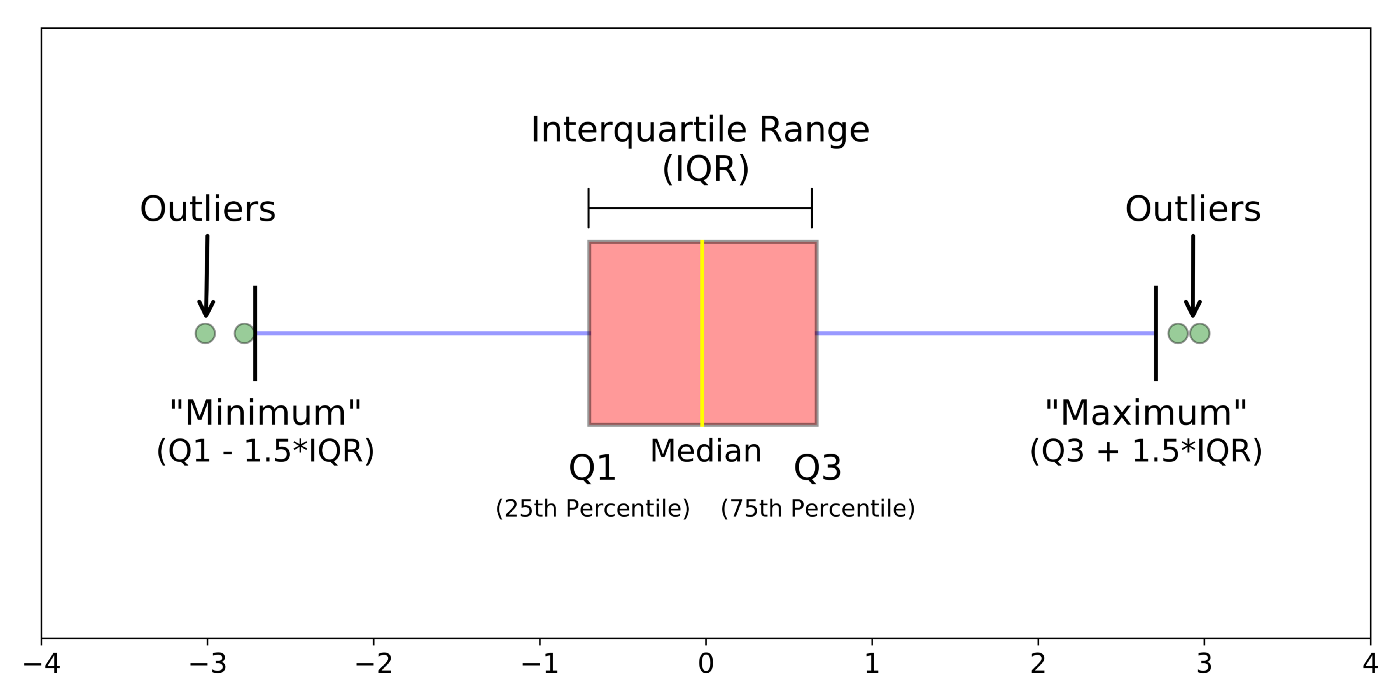

The box and whiskers chart shows you how your data is spread out. Five pieces of information (the “five number summary“) are generally included in the chart:
* **Minimum Number**
* **First Quartile (Q1)**
* **Median**
* **Third Quartile (Q3)**
* **Maximum Number**

#### ***How BoxPlot detect outliers***
In the boxplot below, the length of the box is IQR, and the minimum and maximum values are represented by the whiskers. The whiskers are generally extended into 1.5*IQR distance on either side of the box. Therefore, all data points outside these 1.5*IQR values are flagged as outliers.

## ***Unsupervised Method***
## ***4. Outliers detection using DBSCAN Method***
DBSCAN is an unsupervised machine learning algorithms which uses minimun number of points within a radius to form a cluster. It uses a core point and border point to form a cluster. Data point which are neither a core point or a border point ia an outliers.

### ***How DBSCAN detect outliers?***
DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise or Outliers.

## ***5. Outliers detection using Local Outlier factor Method***
Local outlier factor (LOF) is an algorithm used for Unsupervised outlier detection. It produces an anomaly score that represents data points which are outliers in the data set. It does this by measuring the local density deviation of a given data point with respect to the data points near it.

### ***How Local Outliers Factor detect outliers?***
Local density is determined by estimating distances between data points that are neighbors (k-nearest neighbors). So for each data point, local density can be calculated. By comparing these we can check which data points have similar densities and which have a lesser density than its neighbors. The ones with the lesser densities are considered as the outliers.

In [37]:
# function for Elbow curve to identify the Optimal value of K
from sklearn.cluster import KMeans
def ElobwCurve(dataframe,n):
        distortions = {}
        K = range(1,n)
        for k in K:
            kmeanModel = KMeans(n_clusters=k)
            kmeanModel.fit(dataframe)
            distortions[k]=kmeanModel.inertia_
        
        plt.figure(figsize=(16,8))
        plt.plot(list(distortions.keys()), list(distortions.values()), 'bx-')
        plt.xlabel('k')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method showing the optimal k')
        plt.show()

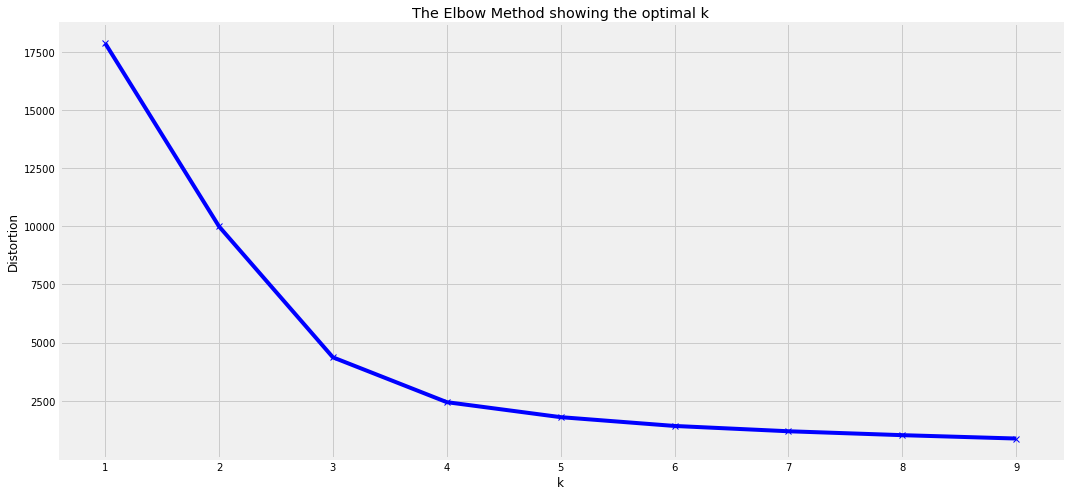

In [38]:
ElobwCurve(df_pca,10)

**Silhouette Coefficient or silhouette score** is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
The equation for calculating the silhouette coefﬁcient for a particular data point:
$$
s(i)=\frac{b(i)-a(i)}{max(a(i),b(i))}
$$
* **Where**:
    * a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
    * b(i) is the average distance from i to all clusters to which i does not belong.
<br>
* 1: Means clusters are well apart from each other and clearly distinguished.
* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* -1: Means clusters are assigned in the wrong way.

In [39]:
#function to find the optimal value of EPS and K
def OptimalValue(dataframe,method):
    from sklearn.cluster import DBSCAN,KMeans
    from sklearn.metrics import silhouette_score
    
    data=dataframe
    if(method=='dbscan'):
        # finding the number of clusters based on silhouette_score
        sc={}
        K=np.arange(0.1, 1, 0.01)
        for k in K:
            am=DBSCAN(eps=k,min_samples=5)
            l=am.fit_predict(data)
            sc[k]=silhouette_score(data,l)
        best_k=max(sc,key=sc.get)
        print('Best EPS value is {} and silhouette score is {}'.format(best_k,sc[best_k]))
        plt.figure(figsize=(16,6))
        plt.plot(list(sc.keys()), list(sc.values()), marker='o')
        plt.xlabel('EPS value')
        plt.ylabel('silhouette score')
        plt.show()
        
    else:
        sc={}
        K=np.arange(2,10)
        for k in K:
            am=KMeans(n_clusters=k)
            l=am.fit_predict(data)
            sc[k]=silhouette_score(data,l)
        best_k=max(sc,key=sc.get)
        print('Best K value is {} and silhouette score is {}'.format(best_k,sc[best_k]))
        
        plt.figure(figsize=(16,6))
        plt.plot(list(sc.keys()), list(sc.values()), marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('silhouette score')
        plt.show()
              
    return best_k

### Outlier Detection using DBScan and KNN

In [40]:
# function for outliers detection
def FindOutliersDBKNN(dataframe,method):
    if(method=='dbscan'):
        title='DBSCAN Outliers detection'
        print(f'{title}')
        from sklearn.cluster import DBSCAN,KMeans
        
        #Getting the Optimal value for EPS
        ep=OptimalValue(dataframe,'dbscan')
        data=dataframe
        db=DBSCAN(eps=ep,min_samples=5).fit(data)
        labels=db.labels_
        data['labels']=labels
        
    elif(method=='local'):
        title='LocalOutlierFactor Outliers detection'
        print(f'{title}')
        from sklearn.neighbors import LocalOutlierFactor
        data=dataframe
        lof = LocalOutlierFactor().fit_predict(data)
        labels=lof
        data['labels']=labels
        
        
    else:
        title='K-Means Outliers detection'
        print(f'{title}')
        from sklearn.cluster import DBSCAN,KMeans
        from sklearn.metrics import silhouette_score
        import warnings
        warnings.filterwarnings('ignore')
        data=dataframe
        
        # finding the number of clusters based on silhouette_score
        #Getting the Optimal value for EPS
        k=OptimalValue(dataframe,'')
        data=dataframe
        
        knn=KMeans(n_clusters=k).fit(data)
        labels=knn.labels_
        data['labels']=labels
        
    plt.figure(figsize=(14,7))
    
    values = data[data['labels']==-1] #outliers data
    clusters=len(data[data['labels']!=-1]['labels'].unique()) #count of clusters
    outliers=len(data[data['labels']==-1]) #count of outliers
    
    print(f'Identified Outliers: {outliers}')
    print('Identified Clusters: {}'.format(clusters))
    plt.scatter(data['PCA0'], data['PCA1'],c=data['labels'], cmap='RdYlBu',edgecolors='black',vmax=5) #plot of data
    plt.scatter(values['PCA0'], values['PCA1'], color='green') #plot of outlier data
    plt.title(title)
    return data

K-Means Outliers detection
Best K value is 2 and silhouette score is 0.6448818974590163


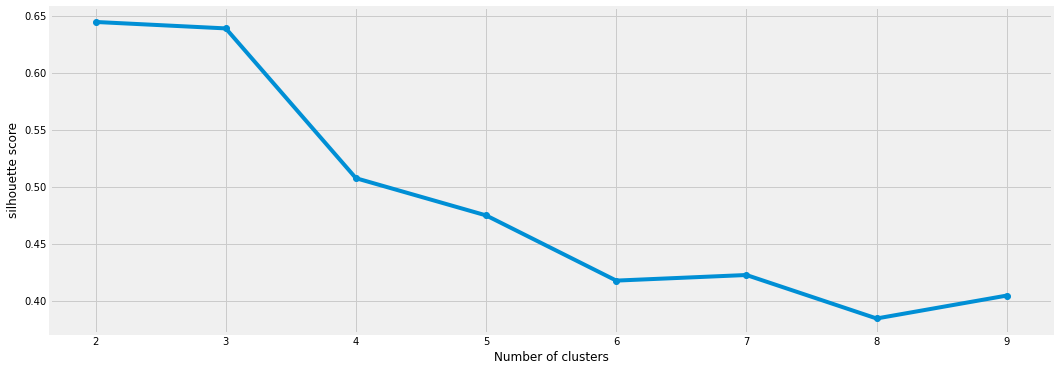

Identified Outliers: 0
Identified Clusters: 2


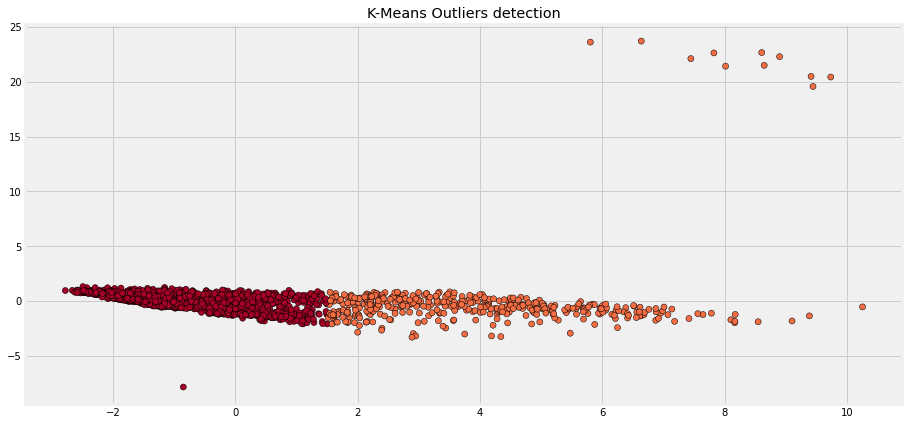

In [41]:
#outliers using dbscan
data=FindOutliersDBKNN(df_pca,"knn")

DBSCAN Outliers detection
Best EPS value is 0.9599999999999995 and silhouette score is 0.6524520836654605


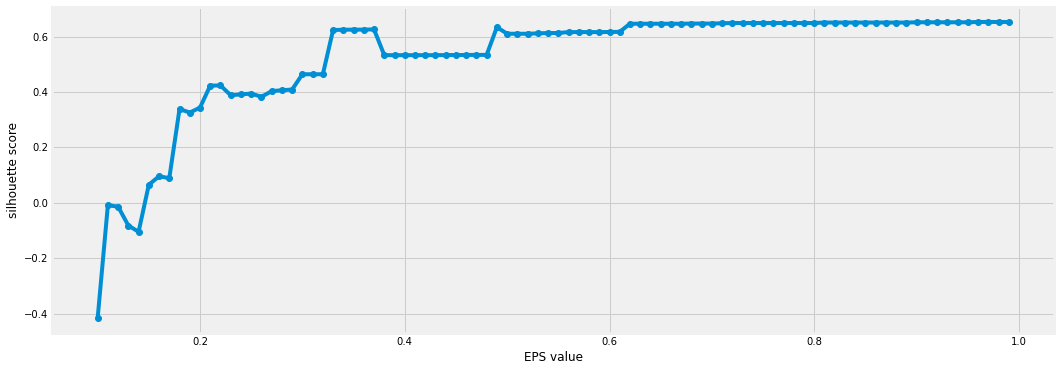

Identified Outliers: 13
Identified Clusters: 2


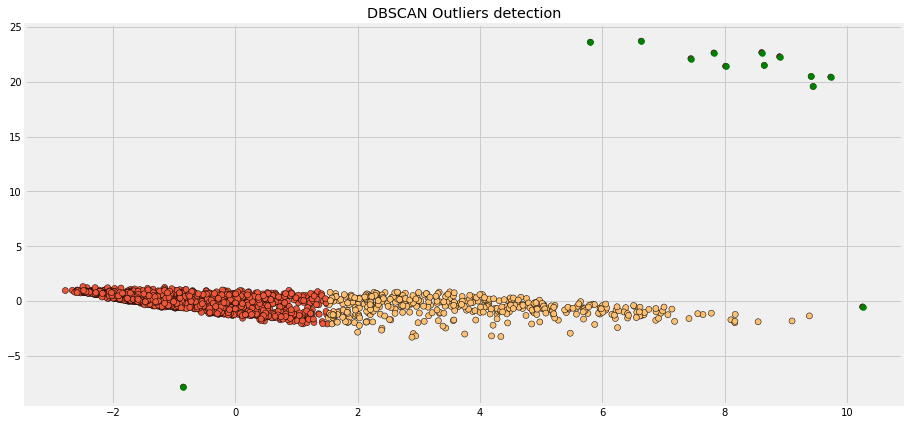

In [42]:
#outliers using knn
data=FindOutliersDBKNN(df_pca,"dbscan")

LocalOutlierFactor Outliers detection
Identified Outliers: 54
Identified Clusters: 1


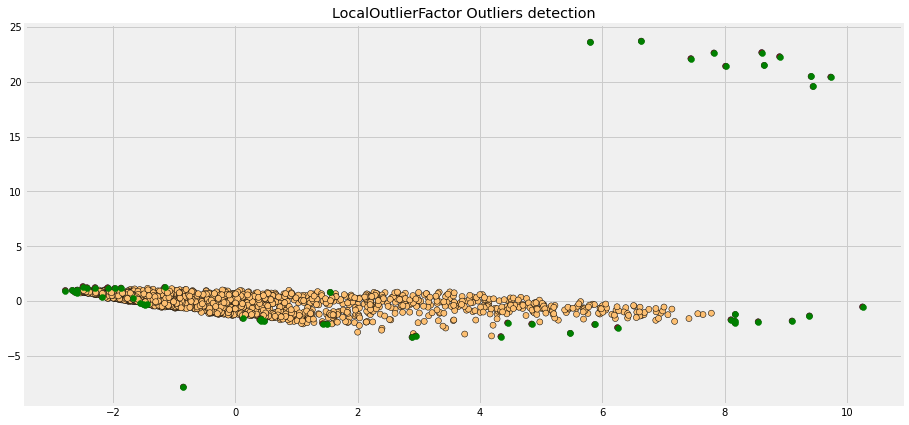

In [43]:
#outliers using Local
data=FindOutliersDBKNN(df_pca,"local")

* From figure 1 we can see that KNN did not detect any outliers because KNN tries to group each data point into a cluster and that is why it does not detect any outliers instead it created a seperate clusters.
* From figure 2 we can see that DBSCAN detected 13 outliers.
* From figure 3 we can see that Local Outlier factor detected the most number of outliers.

In [44]:
#function to detect outliers
def BoxPlotOutliers(dataframe,col):
    fig = plt.figure(figsize=(14,6))

    ax=plt.subplot(1,2, 1)
    sns.boxplot(x=dataframe[col],ax=ax)
    plt.xlabel(col)
    plt.title(f'Outlier in {col}',fontsize=12,fontweight='bold',y=1.1)
    #sns.boxplot(x=dataframe[i],hue=dataframe[target_column])

    ax=plt.subplot(1,2, 2)
    sns.distplot(x=dataframe[col],ax=ax,color='red')
    plt.xlabel(col)
    plt.title('Distribution before any outliers handling',fontsize=12,fontweight='bold',y=1.1)
    plt.subplots_adjust(right=1.2,wspace=0.5,hspace=0.8)
    plt.show()

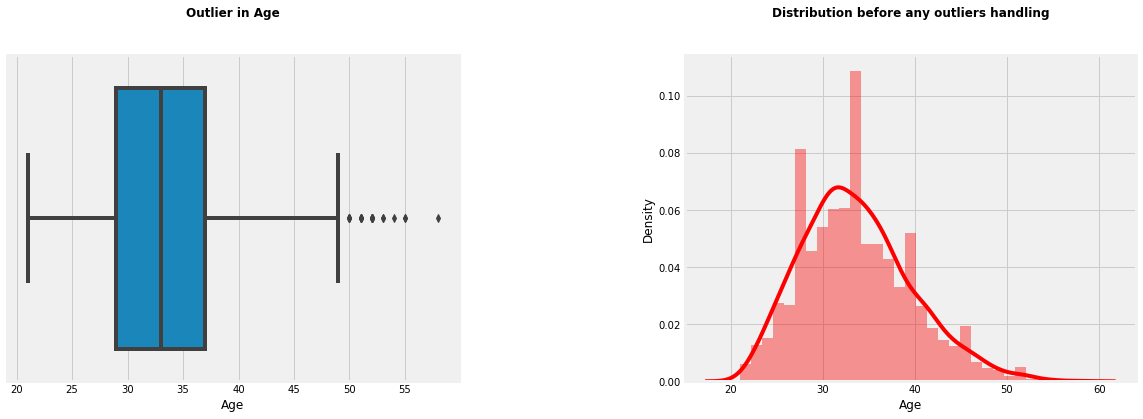

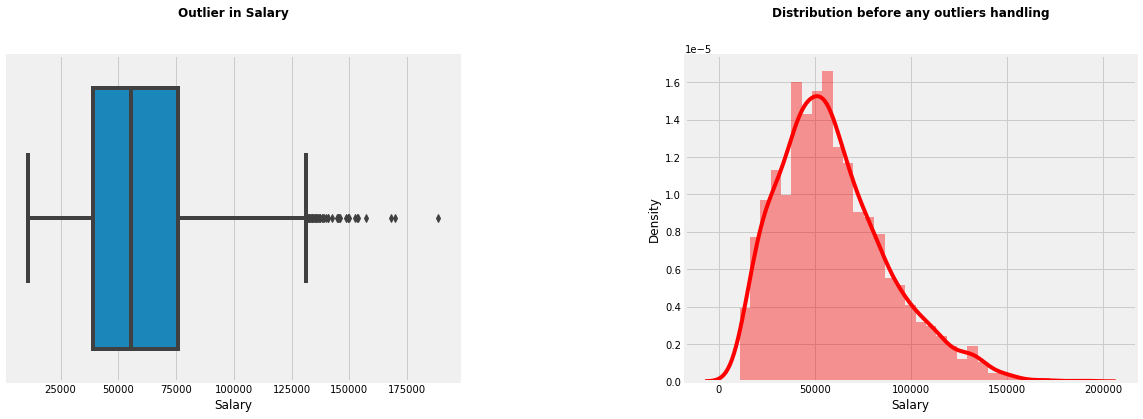

In [45]:
columns=['Age','Salary']
for c in columns:
    BoxPlotOutliers(pre_df,c)

## ***Remove Outliers***

In [46]:
# function for Outliers detection using Z-score
def ZScoreoutlies(dataframe,col):
    from scipy import stats
    z=np.abs(stats.zscore(dataframe[col]))
    idx_outliers=np.where(z>3,True,False)
    outliers=dataframe[col].loc[idx_outliers==True]
    
    print(col)
    print('Identified outliers: %d' % len(outliers))
    #filtering outliers
    dataframe=dataframe.loc[idx_outliers==False]
    dataframe=dataframe.reset_index(drop=True)
    print('Outliers removed..')
    print()
    
    return dataframe

In [47]:
df_zscore = ZScoreoutlies(df_pca,df_pca.columns)
df_zscore.head()

Index(['PCA0', 'PCA1', 'labels'], dtype='object')
Identified outliers: 109
Outliers removed..



PCA0      PCA1  labels
0 -1.606712  0.476796       1
1 -1.606712  0.476796       1
2 -1.606712  0.476796       1
3 -1.437315 -0.126691       1
4 -1.437315 -0.126691       1

In [48]:
#function to remove outliers
def RemoveOutLiers(dataframe,column,method):
    if(method=='z-score'):
        print('Outlier Using Z-Score')
        for c in columns:
            Filtered_dataframe=ZScoreoutlies(dataframe,c)
    else:
        print('Outliers using interquartile range..')
        for c in column:
            print(c)
            #Calculate Q1 and Q3
            Q1 = dataframe[c].quantile(0.25)
            Q3 = dataframe[c].quantile(0.75)
    
            #calculate interquartile range
            IQR=Q3-Q1
            cut_off=1.5*IQR
            print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (Q1, Q3, IQR))
            
            #Calculating Lower and Upper Boundry
            Lower=Q1-cut_off
            Upper=Q3+cut_off
            
            # if the value is less than the lower range or greater than the upper range then it is an outlier
            outliers = [x for x in dataframe[c] if x < Lower or x > Upper]
            print('Identified outliers: %d' % len(outliers))
            
            ## remove outliers based on Lower and Upper
            filter=(dataframe[c] >= Lower) & (dataframe[c] <=Upper)
            
            #filtering the dataframe
            Filtered_dataframe=dataframe.loc[filter]
            print('Outliers removed..')
            print()
        
    return Filtered_dataframe

In [49]:
columns=['Age','Salary']
df_test=RemoveOutLiers(df_test,columns,"")

Outliers using interquartile range..
Age
Percentiles: 25th=29.000, 75th=37.000, IQR=8.000
Identified outliers: 25
Outliers removed..

Salary
Percentiles: 25th=39104.000, 75th=75986.000, IQR=36882.000
Identified outliers: 48
Outliers removed..



### ***creating a validation dataset before making model***
Creating a seperate dataset for model validation. This dataset will not be invluded in model building.

In [50]:
# index=[]
# df=read_file('./','train.csv')
# validation_data=df.copy()
# validation_data['Resign']=np.where(validation_data['LastWorkingDate'].isnull()==True,0,1)

# #getting the 30 records
# df_1=validation_data[validation_data['Resign']==1].head(15)
# df_0=validation_data[validation_data['Resign']==0].head(15)

# #getting the index to drop those row from training dataset
# index_1=validation_data[validation_data['Resign']==1].head(15).index.tolist()
# index_0=validation_data[validation_data['Resign']==0].head(15).index.tolist()
# index.extend(index_1)
# index.extend(index_0)

# df_0_1=pd.concat([df_1,df_0],axis=0)
# df_0_1.to_csv("validation.csv",index=False)

# print(len(validation_data))
# validation_data.drop(index,axis=0,inplace=True)
# validation_data.drop('Resign',axis=1,inplace=True)
# print(len(validation_data))

# validation_data.to_csv('new_train.csv',index=False)

In [31]:
#Reading the new training file
train_df=Preprocess('./','new_train.csv')

File: new_train.csv
Loading CSV file...

Change in Value Column added..
Change in Value Column added..
Change in Value Column added..
Change in Value Column added..

Resign,Hike and Promotion column added,..
intervals in  Salary
: [(69970.667, 129194.333], (10569.329, 69970.667], (129194.333, 188418.0]]
Categories (3, interval[float64, right]): [(10569.329, 69970.667] < (69970.667, 129194.333] < (129194.333, 188418.0]]
BinnedSalary column added,..
intervals in  Age
: [(33.333, 45.667], (20.963, 33.333], (45.667, 58.0]]
Categories (3, interval[float64, right]): [(20.963, 33.333] < (33.333, 45.667] < (45.667, 58.0]]
BinnedAge column added,..



Before Removing the duplicates:19074
Removing the Duplicate
After Removing the duplicates:2376

No. of Cases where Date of Joining is later than Last Working Date: 60
No. of cases where employees have got more than 1 promotion per year:  40
Max no. of promotions per year:  33.333333333333336



### ***Feature Normalization Checking***
Most of the classification model assumes that the given data is normally distributed or has a Gaussian distribution. So it is very important to check each feature distribution.

In [52]:
# function to check the distribution of each column
def CheckDistribution(dataframe,column):
    import random
    from scipy.stats import skew
    colors =['red','green','blue','orange','yellow','Black','Magenta','Teal','Fuchsia','Purple','Cyan']
    c=random.choice(colors)
    original_skew=np.round(skew(dataframe[column]),4)
    plt.figure(figsize=(9,6))
    
    plt.title('Distribution of {}'.format(column),fontsize=12,fontweight='bold',y=1.1)
    plt.xlabel(column)
    sns.distplot(dataframe[column],color=c,label= f"Orginal Skew:{original_skew}")
    plt.legend()
    plt.show()

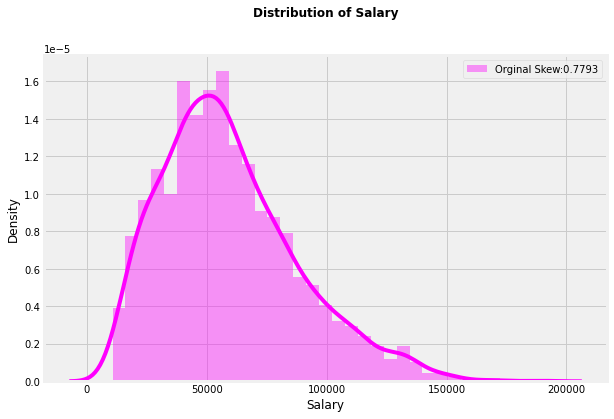

In [53]:
CheckDistribution(train_df,'Salary')

As we can se  data is not not normalized and it is slightly skewed. We can also confirm it with Skewness and Kurtosis value.

Skewness is a measure of asymmetry of a distribution.
In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero.

When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.

When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.

When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve

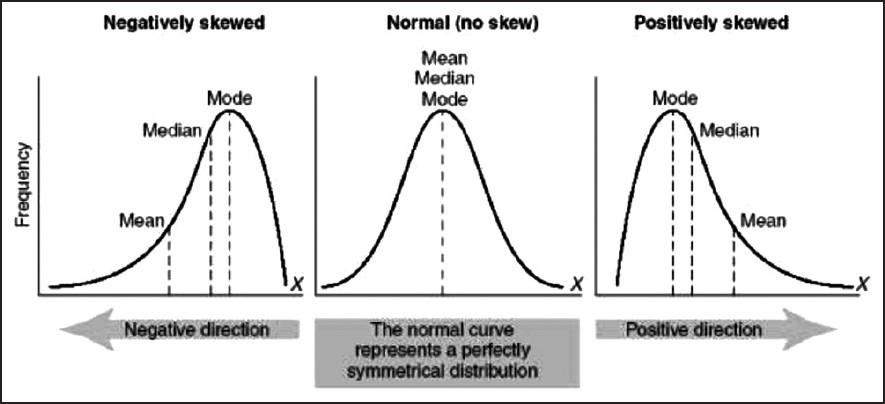

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed

There are multiple technique to normalize the data.
* Log Transformation
* Square-Root Transformation
* Reciprocal Transformation
* Box-Cox Transformation

Refrence: https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/

In [54]:
#skewness value
train_df['Salary'].skew()

0.7797599654278932

There are different types of technique to normalize the feature.
* Log Transformation
* Square Root Transformation
* Resiprocal Transformation
* Boxcox Transformation
* Yeojohnson Transformation

In [55]:
def DiffrentDistribution(dataframe,column):
    from scipy.stats import boxcox
    from scipy.stats import yeojohnson
    from scipy.stats import skew
    
    plt.figure(figsize=(14,10))
    
    ax=plt.subplot(321)
    original_skew=np.round(skew(dataframe[column]),4)
    sns.distplot(dataframe[column],ax=ax,color='red',label= "Orginal Skew:{0}".format(original_skew))
    plt.legend()
    plt.title('Distribution before any transformation ',fontsize=12,fontweight='bold',y=1.1)
    
    # Log transformation
    ax=plt.subplot(322)
    log_target = np.log1p(dataframe[column]) 
    transformed_skew=np.round(skew(log_target),4) #calculating skew
    sns.distplot(log_target,ax=ax,color='orange',label= "Transformed Skew:{0}".format(transformed_skew))
    plt.legend()
    plt.title('Distribution after log transformation',fontsize=12,fontweight='bold',y=1.1)
    
    #Reciprocal Transformation
    ax=plt.subplot(323)
    reci_target = 1/dataframe[column]
    transformed_skew=np.round(skew(reci_target),4)
    sns.distplot(reci_target,ax=ax,color='green',label= "Transformed Skew:{0}".format(transformed_skew))
    plt.legend()
    plt.title('Distribution after Reciprocal Transformation',fontsize=12,fontweight='bold',y=1.1,)
    
    #Square Root Transformation
    ax=plt.subplot(324)
    sqrt_target = np.sqrt(dataframe[column])
    transformed_skew=np.round(skew(sqrt_target),4)
    sns.distplot(sqrt_target,ax=ax,color='blue',label= "Transformed Skew:{0}".format(transformed_skew))
    plt.legend()
    plt.title('Distribution after Square Root Transformation',fontsize=12,fontweight='bold',y=1.1)
    
    #boxcox Transformation
    ax=plt.subplot(325)
    bcx_target, lam = boxcox(dataframe[column])
    transformed_skew=np.round(skew(bcx_target),4)
    sns.distplot(bcx_target,ax=ax,color='teal',label= "Transformed Skew:{0}".format(transformed_skew))
    plt.legend()
    plt.title('Distribution after boxcox Transformation',fontsize=12,fontweight='bold',y=1.1)
    
    #yeojohnson Transformation
    ax=plt.subplot(326)
    yf_target, lam = yeojohnson(dataframe[column])
    transformed_skew=np.round(skew(yf_target),4)
    sns.distplot(yf_target,ax=ax,color='Fuchsia',label= "Transformed Skew:{0}".format(transformed_skew))
    plt.legend()
    plt.title('Distribution after yeojohnson Transformation',fontsize=12,fontweight='bold',y=1.1)
    
    plt.subplots_adjust(right=1.2,wspace=0.4,hspace=0.8)
    plt.show()

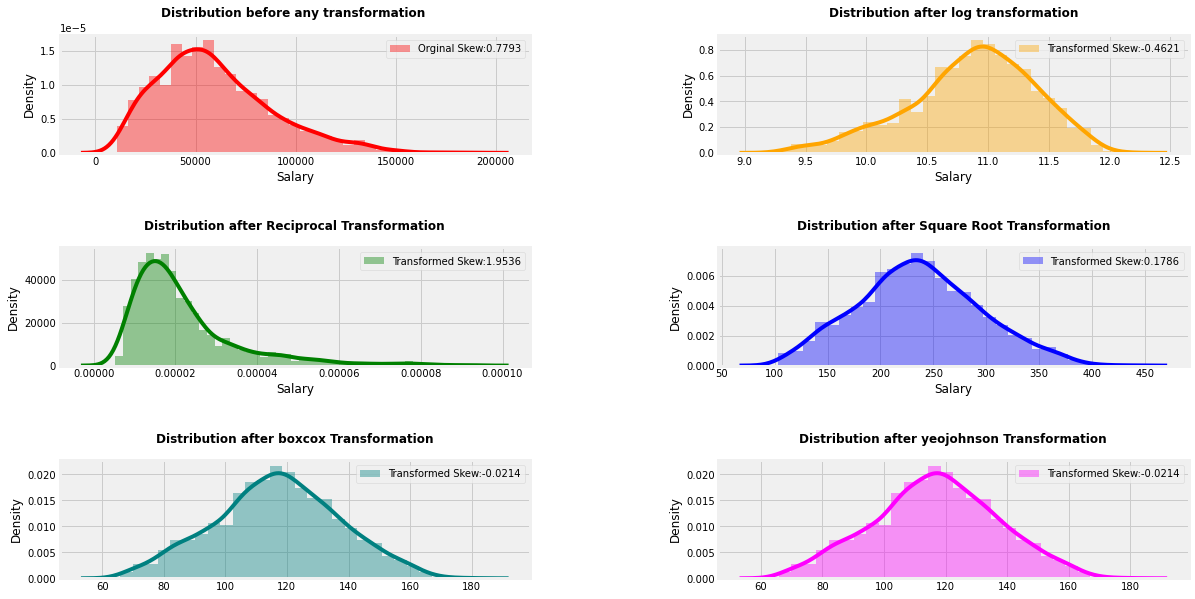

In [56]:
DiffrentDistribution(train_df,'Salary')

As we can see Square root,Boxcox and Yeojohnson are doing a better job to normalize the data as compared to Reciprocal and Log transformation.

In [57]:
# function to check before and after data Square root normalization 
def DistributionBeforeNAfter(dataframe,column):
    from scipy.stats import skew
    plt.figure(figsize=(14,10))
    column=column
    
    ax=plt.subplot(221)
    original_skew=np.round(skew(dataframe[column]),4) #calculating skew
    sns.distplot(dataframe[column],ax=ax,color='blue',label= "Original Skew:{0}".format(original_skew))
    plt.legend()
    plt.title('Box plot before Transformation',fontsize=12,fontweight='bold',y=1.1)
    
    ax=plt.subplot(223)
    sns.boxplot(dataframe[column],ax=ax)
    plt.title('Box plot before Transformation',fontsize=12,fontweight='bold',y=1.1)
    
    #dataframe[column]=np.sqrt(dataframe[column])
    ax=plt.subplot(222)
    sqrt_target = np.sqrt(dataframe[column]) #applying square root
    transformed_skew=np.round(skew(sqrt_target),4) #calculating skew
    sns.distplot(sqrt_target,ax=ax,label= "Transformed Skew:{0}".format(transformed_skew),color='Fuchsia')
    plt.legend()
    plt.title('Distribution after Square Root Transformation',fontsize=12,fontweight='bold',y=1.1)
    
    ax=plt.subplot(224)
    sns.boxplot(np.sqrt(dataframe[column]),ax=ax,color='red')
    plt.title('Box plot after Transformation',fontsize=12,fontweight='bold',y=1.1)
    
    plt.subplots_adjust(right=1.2,wspace=0.5,hspace=0.5)
    plt.show()

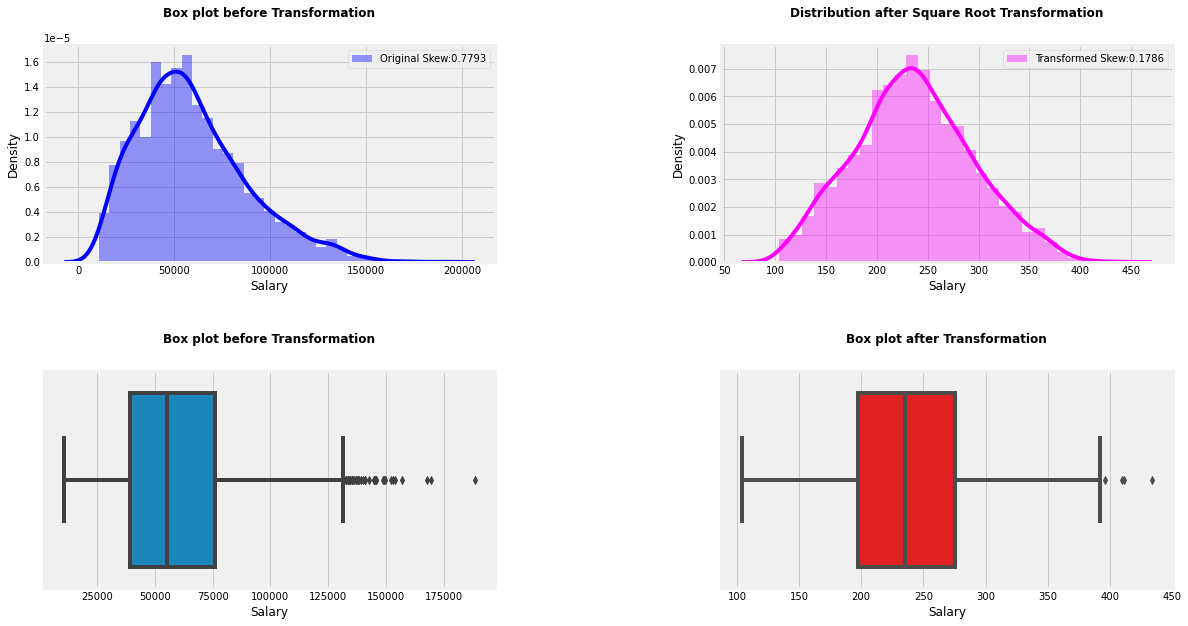

In [58]:
DistributionBeforeNAfter(train_df,'Salary')

### ***Imbalanced data checking***

In [19]:
# checking if our dataset is imbalanced or not
def CheckBalanceImbalance(dataframe):
    ratio=pd.DataFrame((dataframe['Resign'].value_counts()/df.shape[0])*100)
    
    def absolute_value(val):
        a  = str(np.round(val))+'%'
        return a
    
    # Pie plot
    plt.subplot(1, 2, 1)
    explode = (0, 0.1)
    labels = ['Left','Stay'] #labels
    colors = ['orange','teal'] #colors
    pie_plot=ratio['Resign'].plot(kind='pie',figsize=(12,7),
                                  startangle=90,
                                  autopct=absolute_value ,
                                  shadow=True,
                                  explode=explode,
                                 labels=labels,
                                 colors=colors)
    plt.title('Ratio of class Stay(0) vs Left(0) ',fontsize=12,fontweight='bold')
    plt.ylabel('')
    
    #count Plot
    plt.subplot(1, 2, 2)
    plots=sns.countplot(dataframe['Resign'])
    plt.title('Count of class 0 and 1',fontsize=12,fontweight='bold')
    old_ticks =plots.get_xticks().tolist()
    new_ticks = ['0:Stay','1:Left']
    
    #Add new ticks to x axis
    plt.xticks(range(len(old_ticks)), new_ticks)
    
    ncount=len(pre_df)
    #for displaying the numbers
    ncount=len(dataframe)
    for p in plots.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        plots.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    plt.subplots_adjust(right=1.2,wspace=0.5,hspace=0.5)
    plt.show()

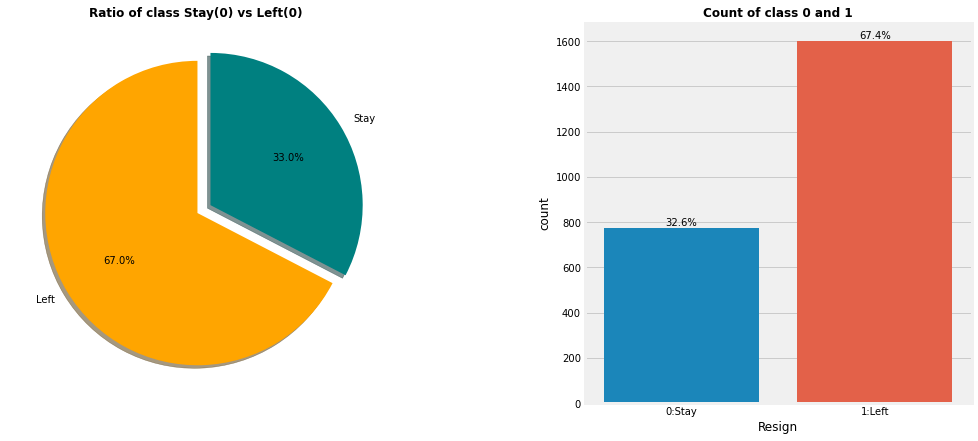

In [60]:
CheckBalanceImbalance(train_df)

As we can see our dataset is fairly balanced with 68% 'Left' Class and 32% 'Stay' class.So we need to balance the dataset before building the model. We can start building our model without balacing the dataset.

There are diffrent techinique to handle the highly imbalanced data set like Undersampling, oversampling and generating synthetic data.
* **`Undersampling`**:undersampling consists in sampling from the majority class in order to keep only a part of these points.
* **`Oversampling`**:oversampling consists in replicating some points from the minority class in order to increase its cardinality.
* **`Generating synthetic data`**:generating synthetic data consists in creating new synthetic points from the minority class (SMOTE method for example) to increase its cardinality.

In [15]:
# NearMiss technique require Traina dn Test data
def TrainTestSplit(dataframe,drop_columns,target_column,rand_state):
    from sklearn.model_selection import train_test_split
    
    X=dataframe.drop(drop_columns,axis=1)
    y=dataframe[target_column]
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=rand_state,stratify=y)
    # print('Train:{}'.format(X_train.shape))
    # print('Test:{}'.format(X_test.shape))
    return X_train,X_test,y_train,y_test

In [62]:
drop_columns=['MMM-YY', 'EmpID','DateofJoining', 'LastWorkingDate','Age','Salary','TotalBusinessValue','Resign','PromoPerYr']
target_column='Resign'
X_train,X_test,y_train,y_test=TrainTestSplit(train_df,drop_columns,target_column, 12)

## ***Imbalanced Data Handling Techniques***: 
There are mainly 2 mainly algorithms that are widely used for handling imbalanced class distribution.
* SMOTE
* Near Miss Algorithm

### ***SMOTE (Synthetic Minority Oversampling Technique) – Oversampling***
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.
More Deep Insights of how SMOTE Algorithm work !
* Step 1: Setting the minority class set A, for each $x \in A$, the k-nearest neighbors of x are obtained by calculating the Euclidean distance between x and every other sample in set A.
* Step 2: The sampling rate N is set according to the imbalanced proportion. For each $x \in A$, N examples (i.e x1, x2, …xn) are randomly selected from its k-nearest neighbors, and they construct the set $A_1$ .
* Step 3: For each example $x_k \in A_1$ (k=1, 2, 3…N), the following formula is used to generate a new example:
$x' = x + rand(0, 1) * \mid x - x_k \mid$
in which rand(0, 1) represents the random number between 0 and 1.

<hr>

### ***NearMiss Algorithm – Undersampling***

NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process.
To prevent problem of information loss in most under-sampling techniques, near-neighbor methods are widely used.
The basic intuition about the working of near-neighbor methods is as follows:
* Step 1: The method first finds the distances between all instances of the majority class and the instances of the minority class. Here, majority class is to be under-sampled.
* Step 2: Then, n instances of the majority class that have the smallest distances to those in the minority class are selected.
* Step 3: If there are k instances in the minority class, the nearest method will result in k*n instances of the majority class.

In [16]:
def ApplyNearMiss(dataframe, rand_state,drop_columns):
    from imblearn.under_sampling import NearMiss
    
    target_column='Resign'
    X_train,X_test,y_train,y_test=TrainTestSplit(dataframe,drop_columns,target_column, rand_state)
    
    
#     print('the shape of test_X: {}'.format(X_test.shape))
#     print('the shape of test_y: {} \n'.format(y_test.shape))
    
#     print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
#     print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
    nr = NearMiss()
    X_train_nm, y_train_nm = nr.fit_resample(X_train, y_train)

#     print('After Undersampling, the shape of train_X: {}'.format(X_train_nm.shape))
#     print('After Undersampling, the shape of train_y: {} \n'.format(y_train_nm.shape))

#     print("After Undersampling, counts of label '1': {}".format(sum(y_train_nm == 1)))
#     print("After Undersampling, counts of label '0': {}".format(sum(y_train_nm == 1)))
    
    return X_train_nm, y_train_nm, X_test, y_test

In [ ]:
drop_columns=['MMM-YY', 'EmpID','DateofJoining', 'LastWorkingDate','Age','Salary','Resign','PromoPerYr']
X_train_nm, y_train_nm, X_test, y_test=ApplyNearMiss(dataframe, rand_state,drop_columns)

### ***Under Sampling technique to balance the data***
It is same as NearMiss Algorithm here we are just removing the majority class manually.

In [17]:
def UnderSampling(dataframe):
    index=dataframe[dataframe['Resign']==1].index.tolist()
    dataframe=dataframe.drop(index[0:500],axis=0)
    return dataframe

In [263]:
balance_df=UnderSampling(train_df)
balance_df.head()

MMM-YY  EmpID  Age  Gender      City  EducationLevel  Salary  \
0 2017-10-01      8   34       1  0.750000               1   70656   
1 2017-12-01     11   28       0  0.541667               2   42172   
2 2016-11-01     12   35       1  0.739726               2   28116   
3 2017-10-01     13   30       1  0.541667               2  119227   
4 2017-12-01     14   39       0  0.698925               1   19734   

  DateofJoining LastWorkingDate JoiningDesignation  ...  \
0    2017-09-19             NaT                  3  ...   
1    2017-12-07             NaT                  1  ...   
2    2016-06-29             NaT                  1  ...   
3    2012-05-28             NaT                  1  ...   
4    2017-10-16             NaT                  3  ...   

  TotalBusinessValue_change  QuarterlyRating_change Resign  Hike%  Promotion  \
0                         0                       0      0    0.0          0   
1                         0                       0      0    0.0          0   
2                         0                       0      0    0.0          0   
3                         1                       0      0    0.0          1   
4                         0                       0      0    0.0          0   

   BinnedSalary  BinnedAge  Retention_years  PromoPerYr  YearsOfExperience  
0             2          2             0.03    0.000000                0.0  
1             1          1             0.00         NaN                0.0  
2             1          2             0.34    0.000000                0.0  
3             2          1             5.34    0.561798                5.0  
4             1          2             0.13    0.000000                0.0  

[5 rows x 25 columns]

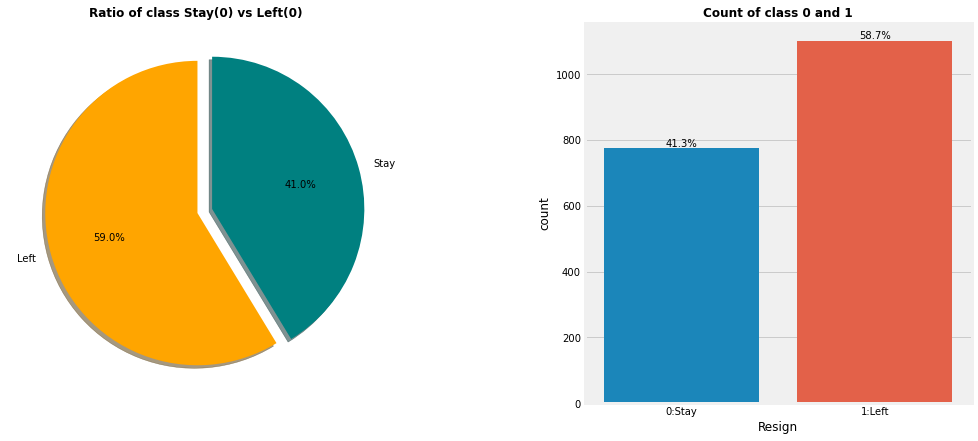

In [264]:
CheckBalanceImbalance(balance_df)

Now our dataset is balanced.

## ***Data Normalization***

* **Min-Max Normalization**: This technique re-scales a feature or observation value with distribution value between 0 and 1.
$$    X_{\text {new }}=\frac{X_{i}-\min (X)}{\max (x)-\min (X)}$$
* **Standardization**: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and standard deviation (variance) equals to 1.
    $$X_{\text {new }}=\frac{X_{i}-X_{\text {mean }}}{\text { Standard Deviation }}$$
Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

* **MaxAbsScaler**: In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value. Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1]. It take the maximum value of a column than devide each value by the maximum value.
$$ MaxAbs(X)=\frac{X}{Max(X)}$$

* **Robust Scaler**: MinMax scaller, Standard Scaller and MaxAbsScaler all are sensitive to outliers because they are using mean, maximum and minimum values of the columns. If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

* Removes the median from the data
* Scales the data by the InterQuartile Range(IQR)

$$ Scaled = \frac{(x – Q1)}{(Q3 – Q1)}$$

* **Power Transformer Scaler**: Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal).

* **Refrence**: https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [18]:
def MinMaxScalling(data):
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    for c in data.columns.tolist():
        if(c!='Resign'):
            data[c]=scaler.fit_transform(data[[c]])
        else:
            pass
    return data

In [19]:
def StandardScalling(data):
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    for c in data.columns.tolist():
        if(c!='Resign'):
            data[c]=scaler.fit_transform(data[[c]])
        else:
            pass
    return data

In [20]:
def RobustScalling(data):
    from sklearn.preprocessing import RobustScaler
    scaler=RobustScaler()
    for c in data.columns.tolist():
        if(c!='Resign'):
            data[c]=scaler.fit_transform(data[[c]])
        else:
            pass
    return data

In [21]:
def PowerScalling(data):
    from sklearn.preprocessing import PowerTransformer
    scaler=PowerTransformer()
    for c in data.columns.tolist():
        if(c!='Resign'):
            data[c]=scaler.fit_transform(data[[c]])
        else:
            pass
    return data

# ***Feature Selection***
While developing the machine learning model, only a few variables in the dataset are useful for building the model, and the rest features are either redundant or irrelevant. If we input the dataset with all these redundant and irrelevant features, it may negatively impact and reduce the overall performance and accuracy of the model. Hence it is very important to identify and select the most appropriate features from the data and remove the irrelevant or less important features, which is done with the help of feature selection in machine learning.

There are mainly two types of Feature Selection techniques, which are:
* **Supervised Feature Selection technique**: Supervised Feature selection techniques consider the target variable and can be used for the labelled dataset.
* **Unsupervised Feature Selection technique**: Unsupervised Feature selection techniques ignore the target variable and can be used for the unlabelled dataset.
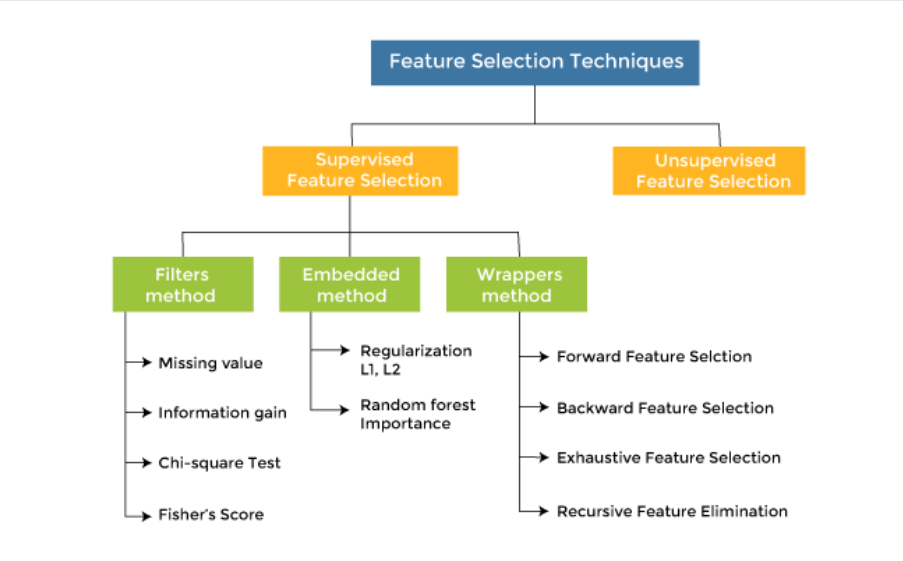

There are mainly three techniques under supervised feature Selection:
* **Filter methods**
* **Wrapper methods**
* **Embedded methods**

### ***1. Filter Methods***:

These methods are generally used while doing the pre-processing step. These methods select features from the dataset irrespective of the use of any machine learning algorithm. In terms of computation, they are very fast and inexpensive and are very good for removing duplicated, correlated, redundant features but these methods do not remove multicollinearity. Selection of feature is evaluated individually which can sometimes help when features are in isolation (don’t have a dependency on other features) but will lag when a combination of features can lead to increase in the overall performance of the model.
<hr>

#### ***Some techniques used are***:  
* **Information Gain**– It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values. Information gain of each attribute is calculated considering the target values for feature selection.
Information Gain can be calculated be:-
$$IG=Entropy\;of\;dataset(Traget\;variable)-Entropy\;of\;each\;features$$

**Entropy**:- It is a metric to measure the impurity in a given datset. It specify the randomness in a data. Higher the entropy the harder it is to draw any conclusion from that information.
Entropy can be calculated as:-
$$ Entropy=\sum\limits_{i=1}^{n}-p_i*log_2(p_i)$$

Where
* n- number of class
* $p_i$- Probability of $i^th$ class

**Features with high information gain would be selected**
<hr>

* **Chi-square test** — Chi-square method (X2) is generally used to test the relationship between categorical variables. It compares the observed values from different attributes of the dataset to its expected value.
$$X^2=\sum\frac{(Ovserved\;value-Expected\;value)^2}{Expected\;value}$$
Features with low chi-square value would be selected becasue if the diffrence between observed and expected value is zero that mean observed and expected are same.
<hr>

* **Fisher’s Score** – Fisher’s Score selects each feature independently according to their scores under Fisher criterion leading to a suboptimal set of features. The larger the Fisher’s score is, the better is the selected feature.
<hr>

* **Correlation Coefficient** – Pearson’s Correlation Coefficient is a measure of quantifying the association between the two continuous variables and the direction of the relationship with its values ranging from -1 to 1.
<hr>

* **Variance Threshold** – It is an approach where all features are removed whose variance doesn’t meet the specific threshold. By default, this method removes features having zero variance. The assumption made using this method is higher variance features are likely to contain more information.
<hr>

* **Mean Absolute Difference (MAD)** – This method is similar to variance threshold method but the difference is there is no square in MAD. This method calculates the mean absolute difference from the mean value.
<hr>

* **Dispersion Ratio** – Dispersion ratio is defined as the ratio of the Arithmetic mean (AM) to that of Geometric mean (GM) for a given feature. Its value ranges from +1 to ∞ as AM ≥ GM for a given feature. Higher dispersion ratio implies a more relevant feature.
<hr>

* **Mutual Dependence** – This method measures if two variables are mutually dependent, and thus provides the amount of information obtained for one variable on observing the other variable. Depending on the presence/absence of a feature, it measures the amount of information that feature contributes to making the target prediction.
<hr>

* **Relief** – This method measures the quality of attributes by randomly sampling an instance from the dataset and updating each feature and distinguishing between instances that are near to each other based on the difference between the selected instance and two nearest instances of same and opposite classes.

## ***2. Wrapper methods***:
In wrapper method feature selection is done in an iterative method where algortihm select the subset of features ,train the model and based on the performance it add or subtract the features.
The main advantage of wrapper methods over the filter methods is that they provide an optimal set of features for training the model, thus resulting in better accuracy than the filter methods but are computationally more expensive.
<hr>

* Some techniques used are:
    * **Forward selection** – This method is an iterative approach where we initially start with an empty set of features and keep adding a feature which best improves our model after each iteration. The stopping criterion is till the addition of a new variable does not improve the performance of the model.
    * **Backward elimination** – This method is also an iterative approach where we initially start with all features and after each iteration, we remove the least significant feature. The stopping criterion is till no improvement in the performance of the model is observed after the feature is removed.
    * **Bi-directional elimination** – This method uses both forward selection and backward elimination technique simultaneously to reach to one unique solution.
    * **Exhaustive selection** – This technique is considered as the brute force approach for the evaluation of feature subsets. It creates all possible subsets and builds a learning algorithm for each subset and selects the subset whose model’s performance is best.
    * **Recursive elimination** – This greedy optimization method selects features by recursively considering the smaller and smaller set of features. The estimator is trained on an initial set of features and their importance is obtained using feature_importance_attribute. The least important features are then removed from the current set of features till we are left with the required number of features.

## ***3. Embedded Methods***
Embedded methods combined the advantages of both filter and wrapper methods by considering the interaction of features along with low computational cost. These are fast processing methods similar to the filter method but more accurate than the filter method.
<hr>

* Some techniques used are:

    * **Regularization** – This method adds a penalty to different parameters of the machine learning model to avoid over-fitting of the model. This approach of feature selection uses Lasso (L1 regularization) and Elastic nets (L1 and L2 regularization). The penalty is applied over the coefficients, thus bringing down some coefficients to zero. The features having zero coefficient can be removed from the dataset.
    * **Tree-based methods** – These methods such as Random Forest, Gradient Boosting provides us feature importance as a way to select features as well. Feature importance tells us which features are more important in making an impact on the target feature.

## ***Univariate Feature Selection with SelectKBest***:

Univariate Feature Selection is a feature selection method based on the univariate statistical test, e,g: chi2, Pearson-correlation, and many more.

The premise with SelectKBest is combining the univariate statistical test with selecting the K-number of features based on the statistical result between the X and y.

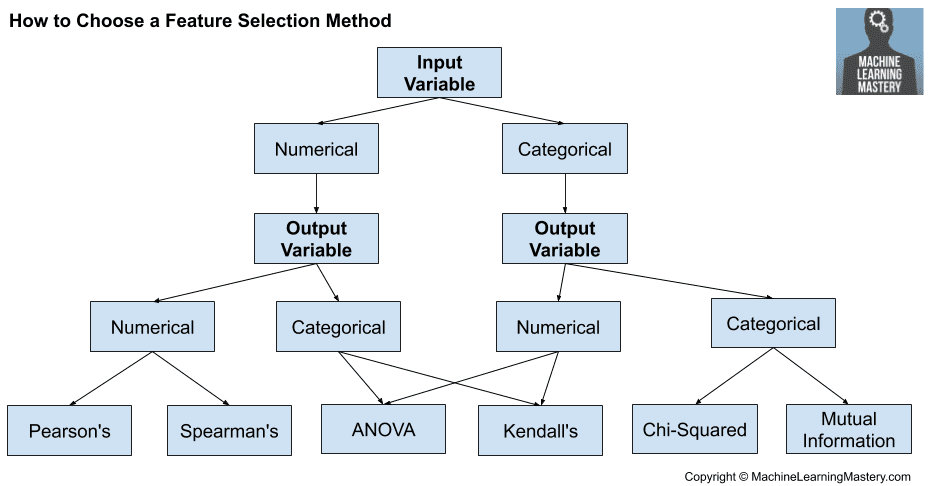

* **Numerical Input, Numerical Output**:
This is a regression predictive modeling problem with numerical input variables. The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation,or rank-based methods for a nonlinear correlation.
* Pearson’s correlation coefficient (linear).
* Spearman’s rank coefficient (nonlinear).
* Mutual Information.
<hr>
* **Numerical Input, Categorical Output**:
This is a classification predictive modeling problem with numerical input variables. This might be the most common example of a classification problem, Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.
* ANOVA correlation coefficient (linear).
* Kendall’s rank coefficient (nonlinear).
* Mutual Information.
<hr>
* **Categorical Input, Numerical Output**:
This is a regression predictive modeling problem with categorical input variables. This is a strange example of a regression problem (e.g. you would not encounter it often). Nevertheless, you can use the same Numerical Input, Categorical Output methods (described above), but in
reverse.
<hr>
* **Categorical Input, Categorical Output**:
This is a classification predictive modeling problem with categorical input variables. The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.
* Chi-Squared test (contingency tables).
* Mutual Information.
<hr>

Since our feature are mostly categorical we can use ANOVA and Chi-Squared or Mutual Information for selecting the best features. Chi-Square will not work since it require non-negative value.

In [47]:
# defining the function to get the best features
# feature selection
def SelectTopNFeatures(algo,X_train, y_train, X_test,topFeatures):
    from sklearn.feature_selection import mutual_info_classif,f_classif,SelectKBest,chi2,SelectPercentile,chi2
    
    #calculating the score
    best_features = SelectKBest(score_func=algo, k='all')
    #best_features = SelectPercentile(score_func=algo,percentile=75)
    fit = best_features.fit(X_train,y_train)
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(X_train.columns)
    
    # concatenate dataframes
    feature_scores = pd.concat([df_columns, df_scores],axis=1)
    feature_scores.columns = ['Feature_Name','Score']  # name output columns
    
    #selectig N top features
    features_df_new= feature_scores.nlargest(topFeatures,'Score')
    features_df_new.index=features_df_new['Feature_Name']
    features_df_new.drop('Feature_Name',axis=1,inplace=True)
    
    #plot the top feature with their score
    # print(f'-------Top {topFeatures} features----------')
    # print(features_df_new)
    # plt.figure(figsize=(18,8))
    # sns.barplot(x=features_df_new.index,y=features_df_new['Score'])
    # plt.xticks(rotation=90)
    # plt.show()
    # print()
    
    #save the features in a file
    features_variables=features_df_new.index.tolist()
    f = open("features_variables.txt", "w")
    f.write(str(features_variables))
    f.close()
    
    #print('Features have been saved!!')
    return features_df_new

Algorithm mutual_info_classif
-------Top 10 features----------
                              Score
Feature_Name                       
QuarterlyRating            0.131658
TotalBusinessValue_change  0.111237
Retention_years            0.091515
TotalBusinessValue         0.081558
YearsOfExperience          0.050401
Designation                0.026603
JoiningDesignation         0.024331
Designation_change         0.022897
QuarterlyRating_change     0.022339
BinnedSalary               0.016967


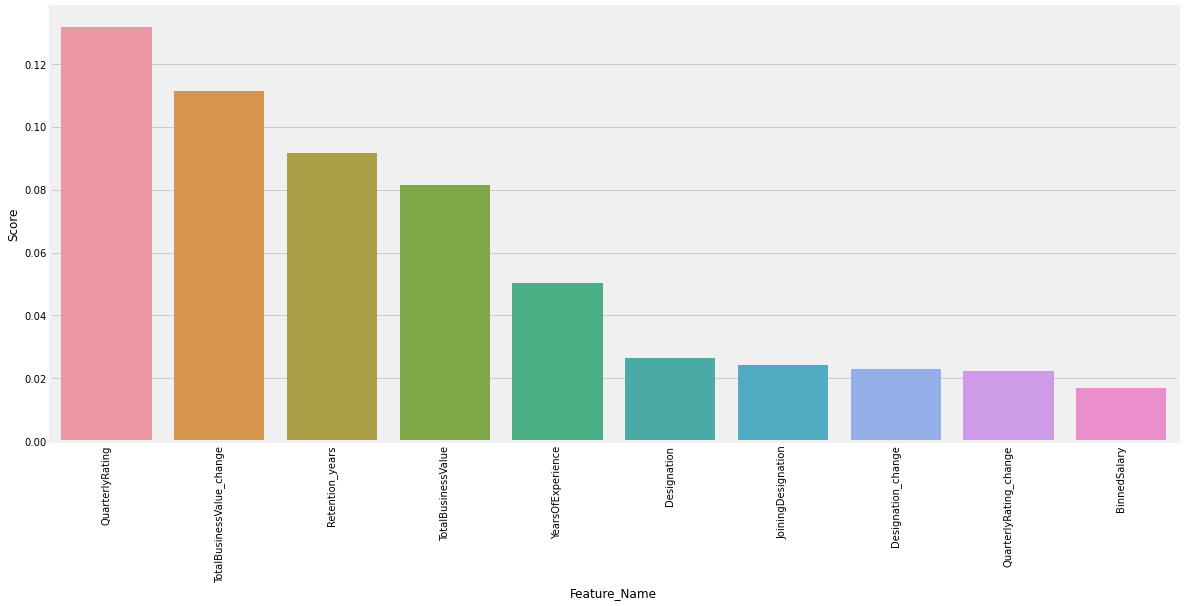


Algorithm f_classif
-------Top 10 features----------
                                Score
Feature_Name                         
QuarterlyRating            538.902359
TotalBusinessValue         254.123971
TotalBusinessValue_change  180.975144
Designation                 90.408826
BinnedSalary                60.845766
Retention_years             53.223743
YearsOfExperience           47.468124
City                        37.921850
JoiningDesignation          30.469091
QuarterlyRating_change      25.059242


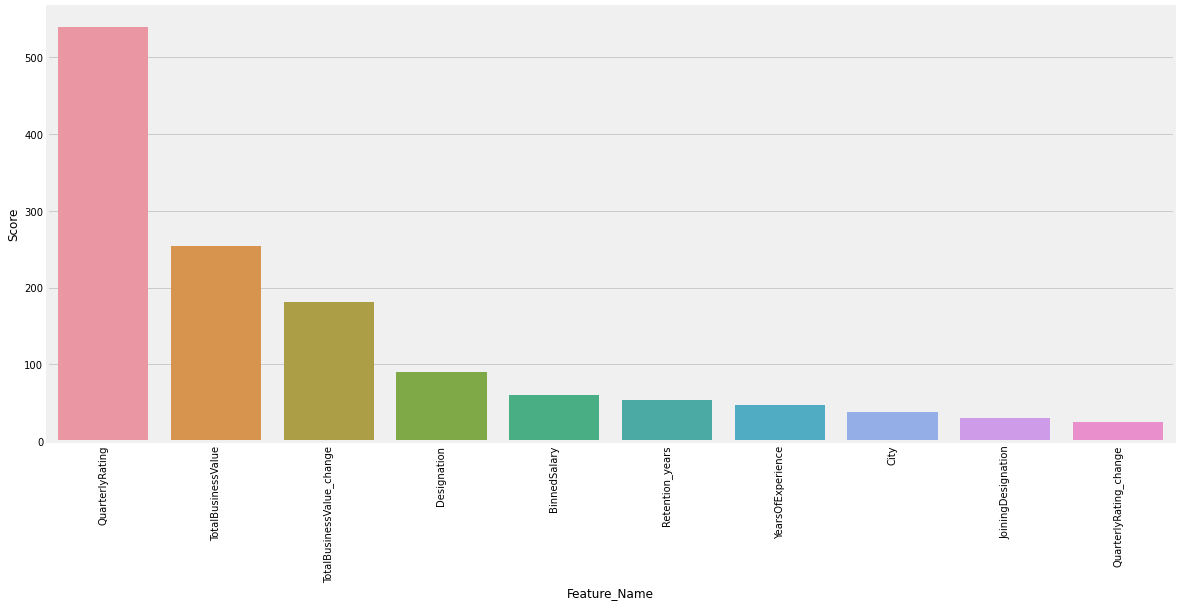

In [50]:
#First we will use F-test
from sklearn.feature_selection import mutual_info_classif,f_classif,SelectKBest,chi2

#First converting the string data to numerical data
columns=['Gender', 'EducationLevel','Promotion']
train_df=convertToNumerical(train_df,columns,'label')
train_df=convertToNumerical(train_df,['City'],'target')

# drop the columns
drop_columns=['MMM-YY', 'EmpID','DateofJoining', 'LastWorkingDate','Age','Salary','Resign','PromoPerYr']
target_column='Resign'
X_train,X_test,y_train,y_test=TrainTestSplit(train_df,drop_columns,target_column, 12)

#finding the best features
algos=[]
algos.append(('mutual_info_classif', mutual_info_classif))
algos.append(('f_classif', f_classif))

for name,a in algos:
    print(f'Algorithm {name}')
    features_df_new=SelectTopNFeatures(a,X_train,y_train,X_test,10)

Both mutual info and f class info giving QuarterlyRating,TotalBusinessValue,TotalBusinessValue_Change,Retention_years and Desination columns.

In [23]:
# Recursive Feature Elimination
def RFE(model, train_X,test_X,train_y,test_y):
    from sklearn.feature_selection import RFE
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import StratifiedKFold
       
    
    #Recursive Feature Elimination
    accuracy=[]
    for f in range(1,len(train_X.columns.tolist())):
        rfe = RFE(model, n_features_to_select=f)
        rfe.fit(train_X, train_y)
        if(f<2):
            print(rfe.ranking_)
        
        #getting prediction and appending it to list
        predictions = rfe.predict(test_X)
        acc=round(accuracy_score(test_y, predictions),2)
        accuracy.append(acc)
        
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,6))
    plt.xlabel('Number of features selected')
    plt.ylabel('Accuracy')
    plt.plot(range(1,len(train_X.columns.tolist())),accuracy)
    plt.show()

Recursive feature elimination require a model to get the best features so we can use DecisionTreeClassifier model since most of the column are categorical.

[ 8  5  9  7 16  3  1 15 17  4  6 14 12 13 11  2 10]


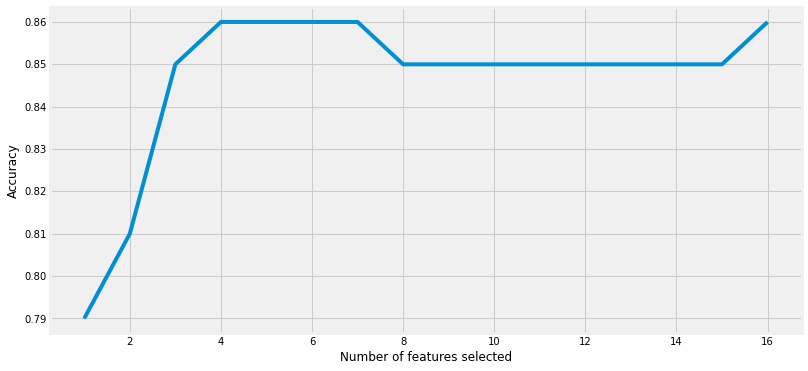

In [35]:
#RFE w/o class balancing
from sklearn.tree import DecisionTreeClassifier

columns=['Gender', 'EducationLevel','Promotion']
train_df=convertToNumerical(train_df,columns,'label')
train_df=convertToNumerical(train_df,['City'],'target')

drop_columns=['MMM-YY', 'EmpID','DateofJoining', 'LastWorkingDate','Age','Salary','Resign','PromoPerYr']
target_column='Resign'
train_X,test_X,train_y,test_y=TrainTestSplit(train_df,drop_columns,target_column, 42)

model=DecisionTreeClassifier(criterion='gini',max_depth=5)
RFE(model,train_X,test_X,train_y,test_y)

[17  5 16 15  7  4  1 14 13  3  6 12 11 10  9  2  8]


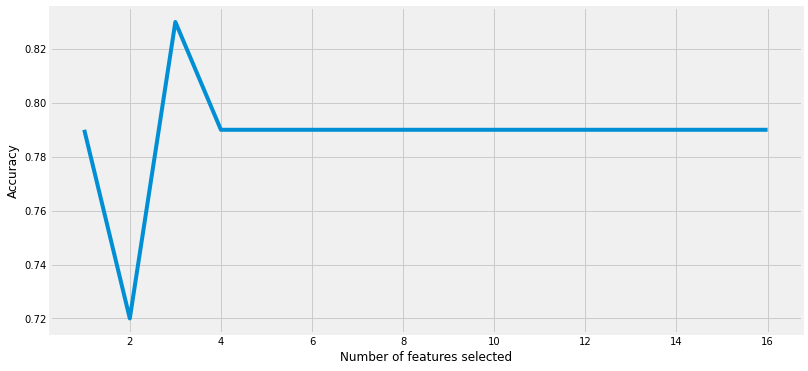

In [75]:
# Near Miss
model=DecisionTreeClassifier(criterion='gini',max_depth=5)

X_train_nm, y_train_nm, X_test_nm, y_test_nm = ApplyNearMiss(train_df, 42)
RFE(model, X_train_nm, X_test_nm, y_train_nm, y_test_nm)

In [24]:
# Recursive feature elimination with cross-validation
def RFECV_(dataframe,model, rand_state,n_feature,drop_columns):
    from sklearn.feature_selection import RFE,RFECV
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import classification_report
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    

    target_column='Resign'

    X_train,X_test,y_train,y_test=TrainTestSplit(dataframe,drop_columns,target_column, rand_state)

    rfe = RFECV(model, step=1, cv=5,min_features_to_select=n_feature,scoring='accuracy')
    rfe.fit_transform(X_train, y_train)
    
    #selected features
    # for f in rfe.get_feature_names_out().tolist():
    #     print(f)
   # use the model to predict 
    predictions = rfe.predict(X_test)
    # print('-----')
    # print('Accuracy:{}'.format(round(accuracy_score(y_test, predictions),2)))
    # print('Recall:{}'.format(round(recall_score(y_test, predictions),2)))
    #print(classification_report(y_test, predictions))
    
    features_df_new = pd.DataFrame(rfe.ranking_,index=X_train.columns,columns=['Rank'])
    features_df_new=features_df_new[features_df_new['Rank']==1]
    return features_df_new,rfe

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

drop_columns=['MMM-YY', 'EmpID','DateofJoining', 'LastWorkingDate','Age','Salary','Resign','PromoPerYr']
n_feature=7
model=DecisionTreeClassifier(random_state=41)
features_df_new,rfe=RFECV_(train_df,model, 41,n_feature,drop_columns)

Optimal number of features : 7


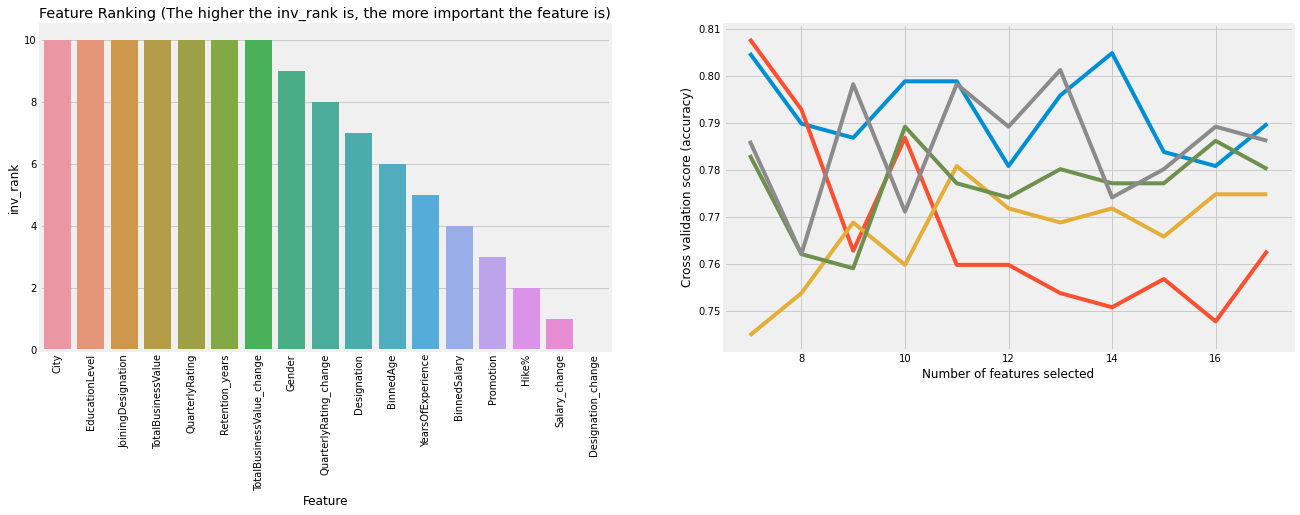

In [83]:
features = rfe.feature_names_in_.tolist()
ranking = rfe.ranking_.tolist()

feature_df = pd.DataFrame({'feature':features, 'rank': ranking})
feature_df = feature_df.sort_values(by = 'rank')
feature_df['inv_rank'] = feature_df['rank'].max() - feature_df['rank']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Feature Ranking (The higher the inv_rank is, the more important the feature is)')
sns.barplot(x=feature_df['feature'],y=feature_df['inv_rank'])
plt.xlabel('Feature')
plt.xticks(rotation=90)

print("Optimal number of features : %d" % rfe.n_features_)
# Plot number of features VS. cross-validation scores
plt.subplot(1,2,2)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(n_feature, len(rfe.grid_scores_) + n_feature),rfe.grid_scores_,)
plt.show()
#sort the graph

City, EducationLevel,JoiningDesination,TotalBusinessValue,QuarterlyRating,Retention_year and TotalBusinessValue_change are importent features.

## ***Spliting the data into train and test***

In [25]:
# function to split the data based on final features
def FinalFeaturesSelection(dataframe,features_df,target_variable):
    
    #get the index(columns) from feature selection dataframe returned by SelectTopNFeatures function
    Features_variable=features_df.index.tolist()
    X=dataframe[Features_variable]
    y=dataframe[target_variable]
    
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,stratify=y)
    #print('Train:{}'.format(X_train.shape))
    #print('Test:{}'.format(X_test.shape))
    return X_train,X_test,y_train,y_test,X,y

In [80]:
X_train,X_test,y_train,y_test,X,y=FinalFeaturesSelection(train_df,features_df_new,'Resign')

## ***Model Training***

In [10]:
#import lightgbm as lgb

In [26]:
# importing all the models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

In [27]:
# read the file
testing_df=Preprocess('./','new_train.csv')

File: new_train.csv
Loading CSV file...

Change in Value Column added..
Change in Value Column added..
Change in Value Column added..
Change in Value Column added..

Resign,Hike and Promotion column added,..
intervals in  Salary
: [(69970.667, 129194.333], (10569.329, 69970.667], (129194.333, 188418.0]]
Categories (3, interval[float64, right]): [(10569.329, 69970.667] < (69970.667, 129194.333] < (129194.333, 188418.0]]
BinnedSalary column added,..
intervals in  Age
: [(33.333, 45.667], (20.963, 33.333], (45.667, 58.0]]
Categories (3, interval[float64, right]): [(20.963, 33.333] < (33.333, 45.667] < (45.667, 58.0]]
BinnedAge column added,..



Before Removing the duplicates:19074
Removing the Duplicate
After Removing the duplicates:2376

No. of Cases where Date of Joining is later than Last Working Date: 60
No. of cases where employees have got more than 1 promotion per year:  40
Max no. of promotions per year:  33.333333333333336



Creating some base models without scalling and normalizing the data based on original feature(without binned features) and with binned features.

In [28]:
#Dataframe with original columns
original_columns=df.columns.tolist()
original_columns.append('Resign')

columns=['Gender','EducationLevel','Promotion']
Original_df=convertToNumerical(testing_df,columns,'label')
Original_df=convertToNumerical(testing_df,['City'],'target')
Original_df=Original_df[original_columns]
Original_df.drop(['MMM-YY', 'EmpID','LastWorkingDate','DateofJoining'],axis=1,inplace=True)

#Binned column dataframe
from sklearn.model_selection import train_test_split
columns=['Gender','EducationLevel','Promotion']
binnedDF=convertToNumerical(testing_df,columns,'label')
binnedDF=convertToNumerical(testing_df,['City'],'target')
binnedDF.drop(['MMM-YY', 'EmpID','LastWorkingDate','DateofJoining','Age','Salary','PromoPerYr'],axis=1,inplace=True)

#raw data
from sklearn.model_selection import train_test_split
columns=['Gender','EducationLevel','Promotion']
rawDF=convertToNumerical(testing_df,columns,'label')
rawDF=convertToNumerical(testing_df,['City'],'target')
rawDF.drop(['MMM-YY', 'EmpID','LastWorkingDate','DateofJoining','BinnedAge','BinnedSalary','PromoPerYr'],axis=1,inplace=True)

In [29]:
# making a list of all classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from catboost import  CatBoostClassifier
from xgboost import XGBClassifier


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
# models.append(('XGBClassifier', XGBClassifier(verbosity = 0)))

In [30]:
# base models on dataset without binned column
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split
raw_acc_results = []
raw_auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean','Accuracy Mean','Dataset']
raw_df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
# target and features
data=rawDF
data_name='rawDF'
X=data.drop('Resign',axis=1)
y=data['Resign']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=43)

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=12,shuffle=True)  # 10-fold cross-validation
    
    # cross validation for Accuracy and ROC
    cv_acc_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring='accuracy')#accuracu
    cv_auc_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc') #ROC
    
    #appending the result
    raw_acc_results.append(cv_acc_results)
    raw_auc_results.append(cv_auc_results)
    names.append(name)
    raw_df_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_acc_results.mean()*100, 2),data_name]

    i += 1
raw_df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Algorithm  ROC AUC Mean  Accuracy Mean Dataset
8  GradientBoostingClassifier         91.27          86.89   rawDF
7          AdaBoostClassifier         90.44          85.58   rawDF
6      RandomForestClassifier         89.72          85.95   rawDF
3    Decision Tree Classifier         77.58          79.53   rawDF
5                 BernoulliNB         74.12          79.79   rawDF
4                 Gaussian NB         70.42          74.79   rawDF
2                         KNN         67.12          70.53   rawDF
1                         SVM         65.43          75.00   rawDF
0         Logistic Regression         62.24          74.32   rawDF

All the ensemble models are giving the good accuracy followed by Decision Tree with original features.

In [31]:
# base models on dataset with binned column
# base models on dataset without binned column
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split
binned_acc_results = []
binned_auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean','Accuracy Mean','Dataset']
binned_df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
# target and features
data=binnedDF
data_name='binnedDF'
X=data.drop('Resign',axis=1)
y=data['Resign']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=43)

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=12,shuffle=True)  # 10-fold cross-validation
    
    # cross validation for Accuracy and ROC
    cv_acc_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring='accuracy')#accuracu
    cv_auc_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc') #ROC
    
    #appending the result
    binned_acc_results.append(cv_acc_results)
    binned_auc_results.append(cv_auc_results)
    names.append(name)
    binned_df_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_acc_results.mean()*100, 2),data_name]

    i += 1
binned_df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Algorithm  ROC AUC Mean  Accuracy Mean   Dataset
8  GradientBoostingClassifier         91.48          87.53  binnedDF
7          AdaBoostClassifier         90.88          86.58  binnedDF
6      RandomForestClassifier         88.75          84.89  binnedDF
3    Decision Tree Classifier         76.90          78.63  binnedDF
5                 BernoulliNB         74.12          79.79  binnedDF
2                         KNN         70.15          70.68  binnedDF
0         Logistic Regression         67.65          49.37  binnedDF
1                         SVM         66.66          75.00  binnedDF
4                 Gaussian NB         66.19          75.21  binnedDF

Here also all the ensemble models are giving the good accuracy followed by Decision Tree for binned dataset.

In [32]:
# base models on original dataset
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split
org_acc_results = []
org_auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean','Accuracy Mean','Dataset']
org_df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
# target and features
data=Original_df
data_name='Original_df'
X=data.drop('Resign',axis=1)
y=data['Resign']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=43)

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=12,shuffle=True)  # 10-fold cross-validation
    
    # cross validation for Accuracy and ROC
    cv_acc_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring='accuracy')#accuracu
    cv_auc_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc') #ROC
    
    #appending the result
    org_acc_results.append(cv_acc_results)
    org_auc_results.append(cv_auc_results)
    names.append(name)
    org_df_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_acc_results.mean()*100, 2),data_name]

    i += 1
org_df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Algorithm  ROC AUC Mean  Accuracy Mean      Dataset
8  GradientBoostingClassifier         82.67          79.79  Original_df
7          AdaBoostClassifier         82.04          79.68  Original_df
6      RandomForestClassifier         80.50          79.37  Original_df
4                 Gaussian NB         70.42          74.79  Original_df
2                         KNN         67.12          70.53  Original_df
3    Decision Tree Classifier         66.71          70.21  Original_df
1                         SVM         65.72          75.00  Original_df
0         Logistic Regression         62.21          74.32  Original_df
5                 BernoulliNB         57.82          67.37  Original_df

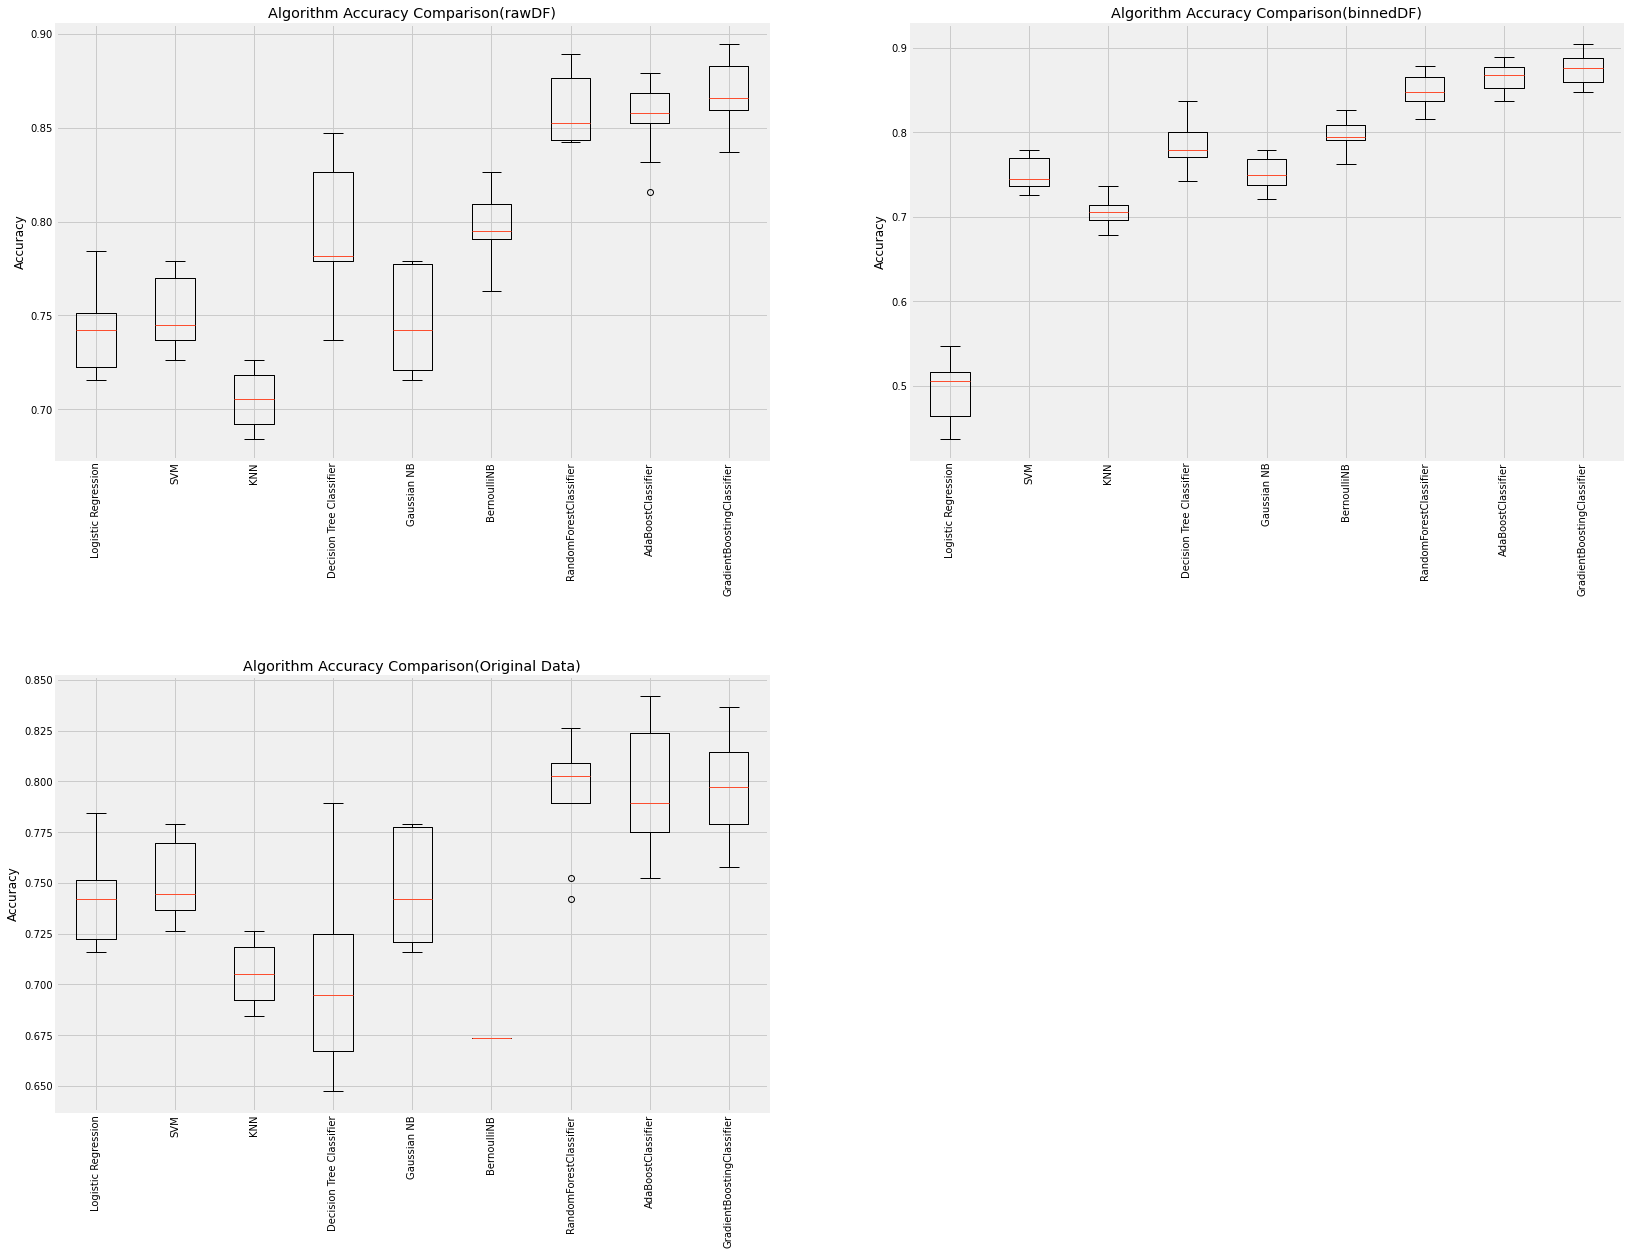

In [33]:
# Box plot graph of Accuracy of all base model
plt.figure(figsize=(25, 20))

ax=plt.subplot(2,2,1)
plt.boxplot(raw_acc_results)
ax.set_xticklabels(names,rotation=90)
plt.title('Algorithm Accuracy Comparison(rawDF)')
plt.ylabel('Accuracy')


ax=plt.subplot(2,2,2)
plt.boxplot(binned_acc_results)
ax.set_xticklabels(names,rotation=90)
plt.title('Algorithm Accuracy Comparison(binnedDF)')
plt.ylabel('Accuracy')

ax=plt.subplot(2,2,3)
plt.boxplot(org_acc_results)
ax.set_xticklabels(names,rotation=90)
plt.title('Algorithm Accuracy Comparison(Original Data)')
plt.ylabel('Accuracy')
plt.subplots_adjust(hspace=0.5)
plt.show()

Area under ROC Curve (AUC) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

Except the logistic regression accuracy for all the model increased for the binned dataset.

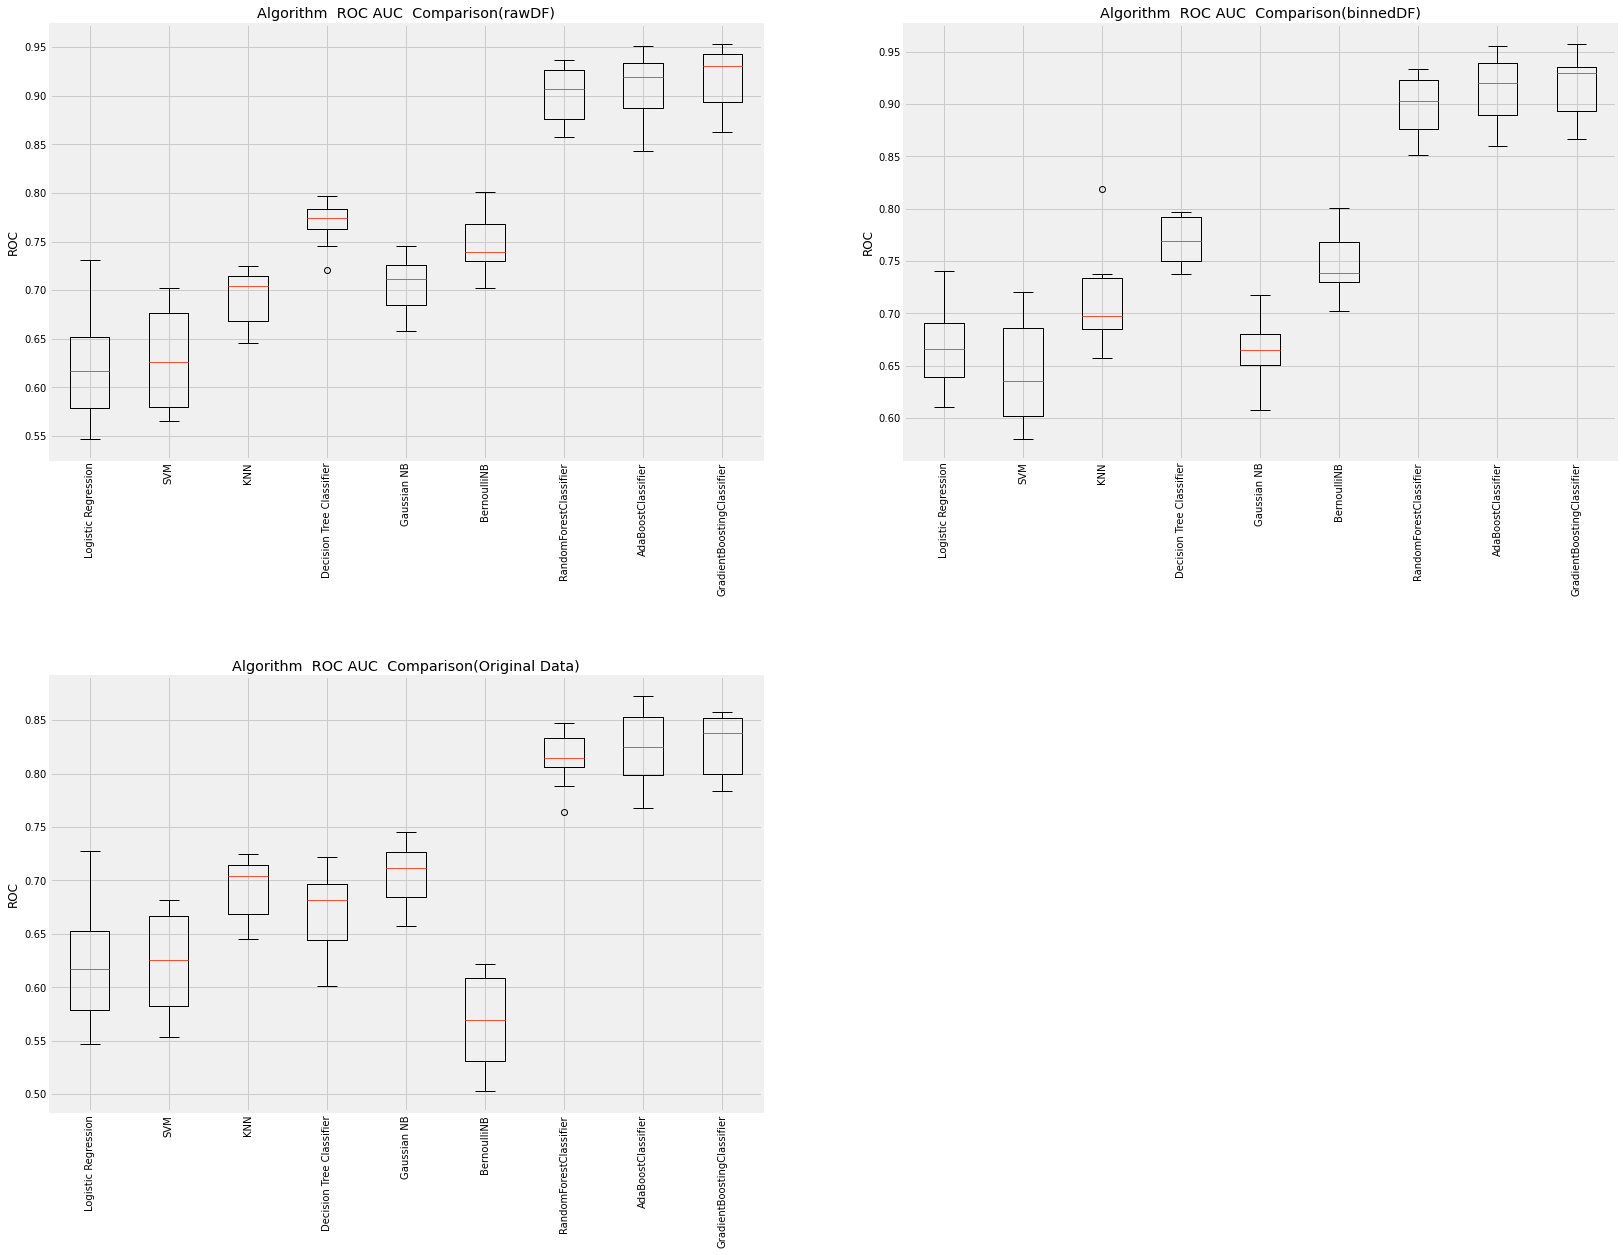

In [134]:
# Box plot graph of Accuracy of all base model
plt.figure(figsize=(25, 20))

ax=plt.subplot(2,2,1)
plt.boxplot(raw_auc_results)
ax.set_xticklabels(names,rotation=90)
plt.title('Algorithm  ROC AUC  Comparison(rawDF)')
plt.ylabel('ROC')


ax=plt.subplot(2,2,2)
plt.boxplot(binned_auc_results)
ax.set_xticklabels(names,rotation=90)
plt.title('Algorithm  ROC AUC  Comparison(binnedDF)')
plt.ylabel('ROC')

ax=plt.subplot(2,2,3)
plt.boxplot(org_auc_results)
ax.set_xticklabels(names,rotation=90)
plt.title('Algorithm  ROC AUC  Comparison(Original Data)')
plt.ylabel('ROC')
plt.subplots_adjust(hspace=0.5)
plt.show()

Based on our ROC AUC comparison analysis,RandomForest,AdaBoost and GradientBoosting show the highest mean AUC scores.

### ***Base Models on PCA***

In [234]:
def ModelOnPCA(dataframe,n_components):
    # making a list of all classification algorithms
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB,BernoulliNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
    from catboost import  CatBoostClassifier
    from xgboost import XGBClassifier
    
    from sklearn.decomposition import PCA
    from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
    from sklearn.model_selection import train_test_split
    
    
    models = []
    models.append(('Logistic Regression', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
    models.append(('Gaussian NB', GaussianNB()))
    models.append(('BernoulliNB', BernoulliNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('AdaBoostClassifier', AdaBoostClassifier()))
    models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
    
    #train test split
    data=dataframe
    X=data.drop('Resign',axis=1)
    y=data['Resign']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=41)
    
    accuracy=[]
    precision=[]
    recall=[]
    model_name=[]
    for name,m in models:
        pca = PCA(n_components=n_components)
        pca.fit(X_train)
        x_train = pca.transform(X_train)
        x_test = pca.transform(X_test)
    
        model = m
        model.fit(x_train, y_train)
    
        y_pr=model.predict(x_test)
        cm=confusion_matrix(y_test,y_pr)
        acc=round(accuracy_score(y_test, y_pr),2)
        prec=round(precision_score(y_test,y_pr),2)
        rec=round(recall_score(y_test,y_pr),2)
        
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        model_name.append(name)
        
    result_df=pd.concat([pd.DataFrame(model_name),pd.DataFrame(accuracy),pd.DataFrame(precision),pd.DataFrame(recall)],axis=1)
    result_df.columns=['Algorithm','Accuracy','Precision','Recall']
    result_df['N_Components']=n_components
    return result_df

In [235]:
result_df=ModelOnPCA(rawDF,4)
result_df

Algorithm  Accuracy  Precision  Recall  N_Components
0         Logistic Regression      0.72       0.77    0.84             4
1                         SVM      0.76       0.76    0.95             4
2                         KNN      0.69       0.75    0.81             4
3    Decision Tree Classifier      0.75       0.80    0.83             4
4                 Gaussian NB      0.76       0.76    0.95             4
5                 BernoulliNB      0.73       0.75    0.89             4
6      RandomForestClassifier      0.77       0.80    0.88             4
7          AdaBoostClassifier      0.77       0.78    0.93             4
8  GradientBoostingClassifier      0.79       0.81    0.91             4

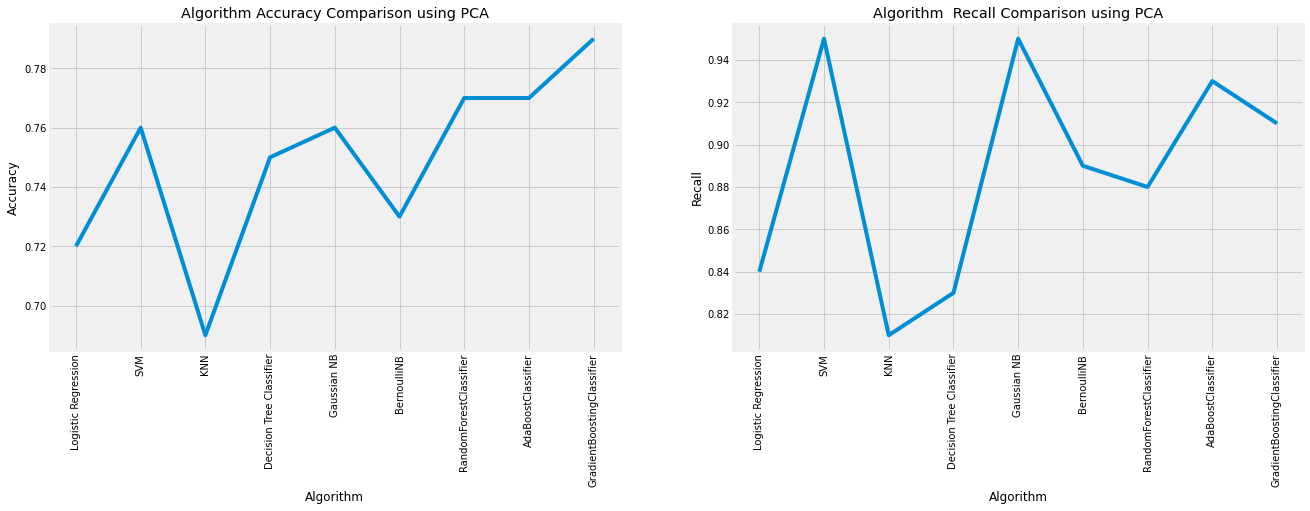

In [236]:
# Accuracy and Recall comparison for each model
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.lineplot(x=result_df['Algorithm'],y=result_df['Accuracy'])
plt.xticks(rotation=90)
plt.title('Algorithm Accuracy Comparison using PCA')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
sns.lineplot(x=result_df['Algorithm'],y=result_df['Recall'])
plt.title('Algorithm  Recall Comparison using PCA')
plt.xticks(rotation=90)
plt.ylabel('Recall')
plt.show()

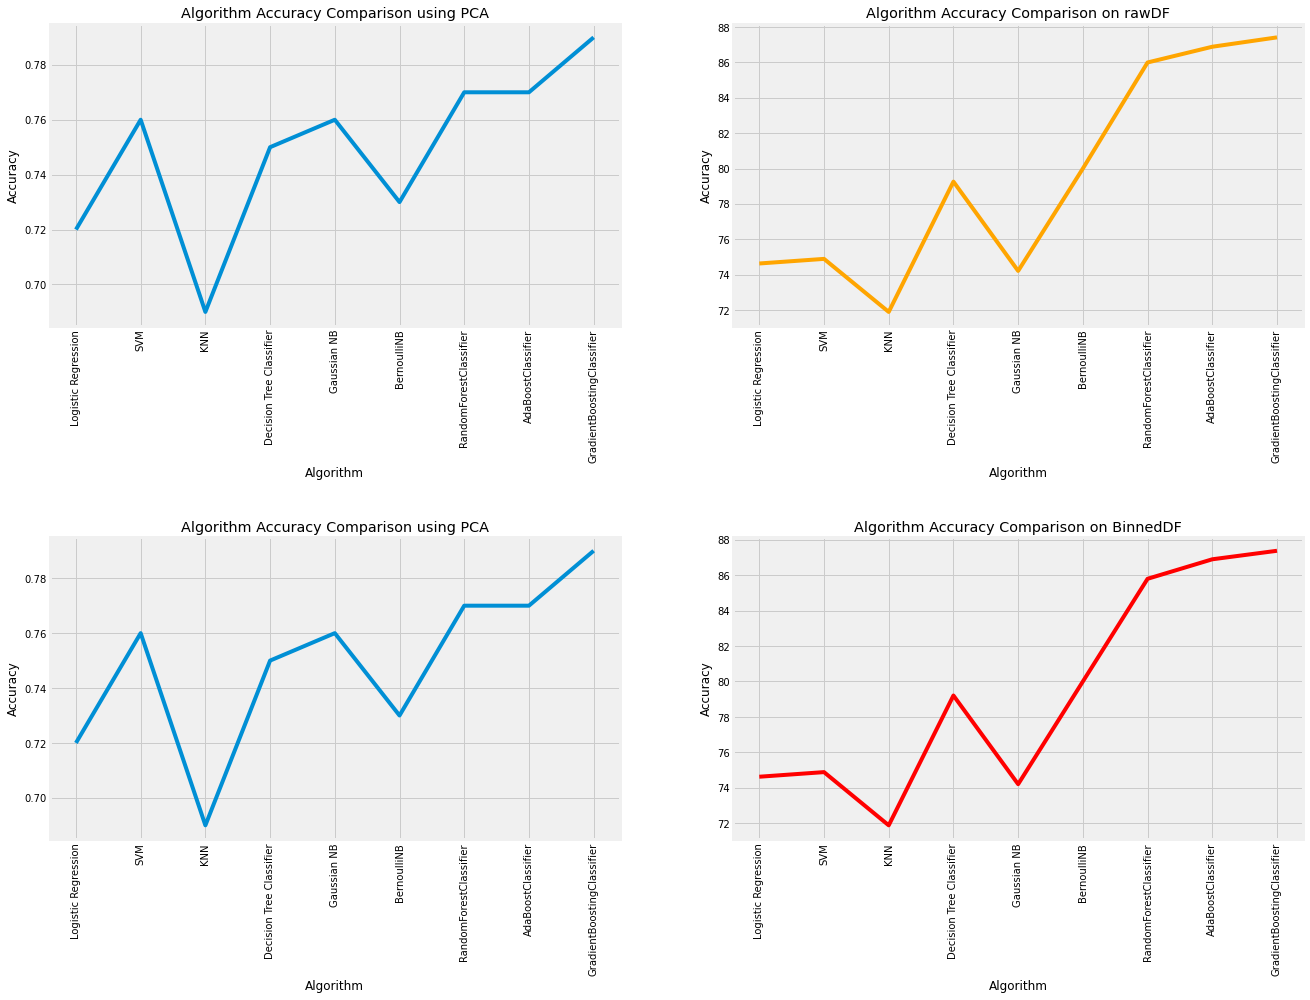

In [237]:
#comparison between PCA and non PCA models

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.lineplot(x=result_df['Algorithm'],y=result_df['Accuracy'])
plt.xticks(rotation=90)
plt.title('Algorithm Accuracy Comparison using PCA')
plt.ylabel('Accuracy')

plt.subplot(2,2,2)
sns.lineplot(x=raw_df_results['Algorithm'],y=raw_df_results['Accuracy Mean'],color='orange')
plt.xticks(rotation=90)
plt.title('Algorithm Accuracy Comparison on rawDF')
plt.ylabel('Accuracy')

plt.subplot(2,2,3)
sns.lineplot(x=result_df['Algorithm'],y=result_df['Accuracy'])
plt.xticks(rotation=90)
plt.title('Algorithm Accuracy Comparison using PCA')
plt.ylabel('Accuracy')

plt.subplot(2,2,4)
sns.lineplot(x=binned_df_results['Algorithm'],y=binned_df_results['Accuracy Mean'],color='red')
plt.xticks(rotation=90)
plt.title('Algorithm Accuracy Comparison on BinnedDF')
plt.ylabel('Accuracy')

plt.subplots_adjust(hspace=0.7)
plt.show()

Accuracy and recall value are good for NON-PCA models.

In [34]:
# feature selection pipeline
def FeatureSelectionPipeline(dataframe,encoding,scalling,imb_tec,f_selection,n_features,drop_columns,model):
    from sklearn.feature_selection import mutual_info_classif,f_classif,SelectKBest,chi2
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    df_copy=dataframe.copy()
    
    model_decision=DecisionTreeClassifier(random_state=12)
    # Encoding
    columns=['Gender', 'EducationLevel','Promotion']
    df_copy=convertToNumerical(df_copy,columns,encoding)
    
    df_copy=convertToNumerical(df_copy,['City'],'target')
    
    
    # scalling the data
    if(scalling=='minmax'):
       # print('MinMax Scalling done..')
        df_copy=MinMaxScalling(df_copy)
    elif(scalling=='robust'):
        #print('Robust Scalling done..')
        df_copy=RobustScalling(df_copy)
    elif(scalling=='power'):
        #print('Power Transform done..')
        df_copy=RobustScalling(df_copy)
    else:
        #print('Standard Scalling done..')
        df_copy=StandardScalling(df_copy)
    
    # handling imbalanced class
    if(imb_tec=='nearmiss'):
        #print('NearMiss..')
        X_train_nm, y_train_nm, X_test_nm, y_test_nm=ApplyNearMiss(df_copy,12,drop_columns)
        # getting the top 15 features
       # print('Final Features..\n')
        if(f_selection=='rfcv'):
            #print('RFCV..')
            try:
                features_df_new,rfe=RFECV_(df_copy,model, 41,n_features,drop_columns)
            except Exception as e:
                features_df_new,rfe=RFECV_(df_copy,model_decision, 41,n_features,drop_columns)
        else:
            features_df_new= SelectTopNFeatures(f_classif,X_train_nm, y_train_nm, X_test_nm,n_features)
    elif(imb_tec=='under'):
        #print('Under Sampling..')
        df_copy=UnderSampling(df_copy)
           
        #train test split for feature selection
        target_column='Resign'
        X_train,X_test,y_train,y_test=TrainTestSplit(df_copy,drop_columns,target_column,12)
        #print('Final Features..\n')
        if(f_selection=='rfcv'):
            #print('RFCV..')
            try:
                features_df_new,rfe=RFECV_(df_copy,model, 41,n_features,drop_columns)
            except Exception as e:
                features_df_new,rfe=RFECV_(df_copy,model_decision, 41,n_features,drop_columns)
        else:
            features_df_new= SelectTopNFeatures(f_classif,X_train, y_train, X_test,n_features)
    else:
        #train test split for feature selection
        target_column='Resign'
        X_train,X_test,y_train,y_test=TrainTestSplit(df_copy,drop_columns,target_column,12)        
       # print('Final Features..\n')
        if(f_selection=='rfcv'):
            #print('RFCV..')
            try:
                features_df_new,rfe=RFECV_(df_copy,model, 41,n_features,drop_columns)
            except Exception as e:
                features_df_new,rfe=RFECV_(df_copy,model_decision, 41,n_features,drop_columns)
        else:
            features_df_new= SelectTopNFeatures(f_classif,X_train, y_train, X_test,n_features)
    
    # spliting the data based on final features
    #print('Train,Test split done..')
    X_train,X_test,y_train,y_test,X,y=FinalFeaturesSelection(df_copy,features_df_new,'Resign')
    return X_train,X_test,y_train,y_test,X,y,features_df_new,df_copy

In [136]:
drop_columns=['MMM-YY','EmpID','DateofJoining','LastWorkingDate','Age','Salary','Resign','PromoPerYr']
model=KNeighborsClassifier(n_neighbors=16)
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','standard','under','rfcv',10,drop_columns,model)

In [65]:
#function for RocAuc plot
def RocAucPlot(model,X_test,y_test):
    from sklearn.metrics import roc_auc_score,roc_curve
    # roc curve for classes
    y_prob= model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    thresh ={}
    
    n_class = len(y_train.unique().tolist())
    
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
        
    # plotting 
    plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Class 0')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best') 
    plt.show()

In [36]:
#function to extract precicion and recall value for each class
def classification_report_csv(report):
    report_data = []
    lines_ = report.split('\n')
    precision_=[0,0]
    recall_=[0,0]
    f1_score=[0,0]
    support_=[0,0]
    k=0
    for line in lines_[2:4]:
        line_ = line.split('      ')
        precision_[k] = line_[2].lstrip()
        recall_[k] = line_[3].lstrip()
        f1_score[k] = line_[4].lstrip()
        support_[k] = line_[5].lstrip()
        k=k+1
    # print("Precision:")
    # print(precision_)
    # print("Recall:")
    # print(recall_)
    # print("F1 Score:")
    # print(f1_score)
    # print("Support:")
    # print(support_)
    return precision_,recall_

In [95]:
#precision_,recall_=classification_report_csv(report)

In [80]:
# function for plotting learning curves
def LearningCurve_(model, X_train, y_train):
    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(16,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [81]:
# function for plotting y - count vs x - probability intervals for both classes
def PlotProbIntervals(y_pred_prob,model):
    y_pred_prob = model.predict_proba(X_test)
    df = pd.DataFrame(data = y_pred_prob, 
                      columns = ['0', '1'])
    df['bins_1'] = pd.cut(df['1'],[0,0.2, 0.5, 0.7, 1])
    df['bins_0'] = pd.cut(df['0'],[0,0.2, 0.5, 0.7, 1])
    df_new1 = pd.DataFrame(df[['1', 'bins_1']].groupby(by = 'bins_1').count())
    df_new0 = pd.DataFrame(df[['0', 'bins_0']].groupby(by = 'bins_0').count())

    x = np.arange(4)
    y1 = np.array(df_new0['0'])
    y2 = np.array(df_new1['1'])
    width = 0.2

    # plot data in grouped manner of bar type
    plt.figure(figsize=(16,7))
    plt.bar(x-0.2, y1, width)
    plt.bar(x, y2, width)
    plt.xticks(x, ['(0,0.2]', '(0.2,0.5]', '(0.5,0.7]', '(0.7,1]'])
    plt.xlabel("Prob Interval")
    plt.ylabel("Count")
    plt.legend(["Class 0", "Class 1"])
    plt.show()

In [37]:
testing_df=Preprocess('./','new_train.csv')

File: new_train.csv
Loading CSV file...

Change in Value Column added..
Change in Value Column added..
Change in Value Column added..
Change in Value Column added..

Resign,Hike and Promotion column added,..
intervals in  Salary
: [(69970.667, 129194.333], (10569.329, 69970.667], (129194.333, 188418.0]]
Categories (3, interval[float64, right]): [(10569.329, 69970.667] < (69970.667, 129194.333] < (129194.333, 188418.0]]
BinnedSalary column added,..
intervals in  Age
: [(33.333, 45.667], (20.963, 33.333], (45.667, 58.0]]
Categories (3, interval[float64, right]): [(20.963, 33.333] < (33.333, 45.667] < (45.667, 58.0]]
BinnedAge column added,..



Before Removing the duplicates:19074
Removing the Duplicate
After Removing the duplicates:2376

No. of Cases where Date of Joining is later than Last Working Date: 60
No. of cases where employees have got more than 1 promotion per year:  40
Max no. of promotions per year:  33.333333333333336



In [43]:
testing_df.drop(['MMM-YY', 
                'EmpID',
                'DateofJoining', 
                'LastWorkingDate','Salary_change',
                'Designation_change', 
                'TotalBusinessValue_change',
                 'QuarterlyRating_change',
                'Hike%',
                'Promotion',
                'BinnedSalary',
                'BinnedAge',
                'Retention_years',
                'PromoPerYr',
                'YearsOfExperience'],axis=1)

Age  Gender City EducationLevel  Salary JoiningDesignation Designation  \
0      34    Male   C2        College   70656                  3           3   
1      28  Female  C19         Master   42172                  1           1   
2      35    Male  C23         Master   28116                  1           1   
3      30    Male  C19         Master  119227                  1           4   
4      39  Female  C26        College   19734                  3           3   
...   ...     ...  ...            ...     ...                ...         ...   
2371   34    Male  C24        College   82815                  2           3   
2372   34  Female   C9        College   12105                  1           1   
2373   45    Male  C19        College   35370                  2           2   
2374   28  Female  C20         Master   69498                  1           1   
2375   30    Male  C27         Master   70254                  2           2   

      TotalBusinessValue QuarterlyRating Resign  
0                      0               1      0  
1                      0               1      0  
2                2607180               1      0  
3               10213040               1      0  
4                      0               1      0  
...                  ...             ...    ...  
2371            21748820               4      0  
2372                   0               1      1  
2373             2815090               1      1  
2374              977830               1      1  
2375             2298240               2      0  

[2376 rows x 10 columns]

## ***Base Models based on diffrent datasets***

In [49]:
# saving our final models
import pickle
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,roc_curve
from xgboost import XGBClassifier

models = []
estimators=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=16)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('CatBoostClassifier', CatBoostClassifier(verbose=0)))
models.append(('BernoulliNB', BernoulliNB()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('XGBClassifier', XGBClassifier(verbosity = 0)))

accuracy=[]
training_accuracy=[]
precision=[]
recall=[]
model_names=[]
f1score=[]
precision_0_1=[]
recall_0_1=[]
features=[]
precision_0=[]
precision_1=[]
rocauc_curve=[]

recall_1=[]
recall_0=[]
trained_model_name=[]
parms_list=[]
drop_columns_list=[]


drop=[]
drop.append((('binnedDF'),['MMM-YY', 'EmpID','LastWorkingDate','DateofJoining','Age','Salary','PromoPerYr','Resign'])),
drop.append((('rawDF'),['MMM-YY', 'EmpID','LastWorkingDate','DateofJoining','BinnedAge','BinnedSalary','PromoPerYr','Resign']))
# drop.append((('original_df'),
#              ['MMM-YY', 
#                 'EmpID',
#                 'DateofJoining', 
#                 'LastWorkingDate',
#                 'Salary_change',
#                 'Designation_change', 
#                 'TotalBusinessValue_change',
#                 'QuarterlyRating_change',
#                 'Hike%',
#                 'Promotion',
#                 'BinnedSalary',
#                 'BinnedAge',
#                 'Retention_years',
#                 'PromoPerYr',
#                 'YearsOfExperience',
#                 'Resign']))

dataset_type=[]
# train the each model on various preprocessing combination
for name,m in models:
    print(f'Model:{name} training...')
    encoding=['label','one-hot']
    scalling=['standard','power','minmax','robust']
    imbalanced=['under','']
    feature_selection=['rfcv','']
    for data_type,drop_columns in drop:
        for en in encoding:
            for sc in scalling:
                for imb in imbalanced:
                    for f in feature_selection:
                        X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,
                                                                                                             en,sc,imb,f,7,drop_columns,m)
                        #print(f'----------------{en},{sc},{imb},{f}------------------')
                        #train the model
                        ml_model=m
                        model=ml_model.fit(X_train,y_train)
                        
                        y_pr=model.predict(X_test)
                        y_train_pr=model.predict(X_train)
                        
                        
                        #calculating Accuracy, f1,precision,and recall
                        acc=np.round(accuracy_score(y_test, y_pr),2)
                        train_acc=np.round(accuracy_score(y_train, y_train_pr),2)
                        prc=np.round(precision_score(y_test, y_pr),2)
                        rec=np.round(recall_score(y_test, y_pr),2)
                        f1=np.round(f1_score(y_test, y_pr),2)
                        fet=[features_df_new.index.tolist()]
                        
                        report=classification_report(y_test,y_pr)
                        precision_,recall_=classification_report_csv(report)
                        
                        precision0_1=[precision_]
                        precision0=precision_[0]
                        precision1=precision_[1]
                        
                        recall0_1=[recall_]
                        recall0=recall_[0]
                        recall1=recall_[1]
                        
                        comb=["'"+en+"'"+","+"'"+sc+"'"+","+"'"+imb+"'"+","+"'"+f+"'"]
        
                        
                        accuracy.append(acc)
                        training_accuracy.append(train_acc)
                        precision.append(prc)
                        recall.append(rec)
                        model_names.append(name)
                        f1score.append(f1)
                        features.append(fet)
                        
                        precision_0_1.append(precision0_1)
                        precision_0.append(precision0)
                        precision_1.append(precision1)
                        
                        recall_0_1.append(recall0_1)
                        recall_0.append(recall0)
                        recall_1.append(recall1)
                        
                        parms_list.append(comb)
                        dataset_type.append(data_type)
                        drop_columns_list.append([drop_columns])
                        
                        
                        # save the model to disk
                        modelname=name+'_Acc_'+str(acc)+'_f1_'+str(f1)
                        trained_model_name.append(modelname)
                        filename = f'./basic_models/{modelname}.sav'
                        pickle.dump(model, open(filename, 'wb'))
    
basic_model_score=pd.concat([pd.DataFrame(model_names),
                             pd.DataFrame(dataset_type),
                          pd.DataFrame(accuracy),
                           pd.DataFrame(training_accuracy),
                          pd.DataFrame(precision),
                          pd.DataFrame(recall),
                          pd.DataFrame(precision_0_1),
                          pd.DataFrame(precision_0),
                          pd.DataFrame(precision_1),
                          pd.DataFrame(recall_0_1),
                          pd.DataFrame(recall_0),
                          pd.DataFrame(recall_1),
                          pd.DataFrame(f1score),
                          pd.DataFrame(features),
                          pd.DataFrame(parms_list),
                          pd.DataFrame(trained_model_name),
                          pd.DataFrame(drop_columns_list),
                        ],
                         axis=1)
basic_model_score.columns=['Model',
                           'Dataset',
                           'Test Accuracy',
                           'Training Accuracy',
                           'Precision',
                           'Recall',
                           '0/1 Precision',
                           '0 Precision',
                           '1 Precision',
                           '0/1 Recall',
                           '0 Recall',
                           '1 Recall',
                           'F1-Score','Features','Dataset Variation','Trained Model','Drop Columns']
basic_model_score.sort_values(by=['Test Accuracy'], ascending=False)
basic_model_score.head()

Model:Logistic Regression training...
Model:DecisionTreeClassifier training...
Model:KNeighborsClassifier training...
Model:GradientBoostingClassifier training...
Model:AdaBoostClassifier training...
Model:RandomForestClassifier training...
Model:CatBoostClassifier training...
Model:BernoulliNB training...
Model:GaussianNB training...
Model:SVC training...
Model:XGBClassifier training...


Model   Dataset  Test Accuracy  Training Accuracy  Precision  \
0  Logistic Regression  binnedDF           0.79               0.79       0.78   
1  Logistic Regression  binnedDF           0.80               0.78       0.79   
2  Logistic Regression  binnedDF           0.83               0.80       0.83   
3  Logistic Regression  binnedDF           0.83               0.79       0.82   
4  Logistic Regression  binnedDF           0.79               0.79       0.78   

   Recall 0/1 Precision 0 Precision 1 Precision    0/1 Recall 0 Recall  \
0    0.90  [0.82, 0.78]        0.82        0.78  [0.63, 0.90]     0.63   
1    0.90  [0.83, 0.79]        0.83        0.79  [0.65, 0.90]     0.65   
2    0.95  [0.86, 0.83]        0.86        0.83  [0.59, 0.95]     0.59   
3    0.95  [0.85, 0.82]        0.85        0.82  [0.56, 0.95]     0.56   
4    0.89  [0.81, 0.78]        0.81        0.78  [0.65, 0.89]     0.65   

  1 Recall  F1-Score                                           Features  \
0     0.90      0.83  [JoiningDesignation, TotalBusinessValue, Quart...   
1     0.90      0.84  [QuarterlyRating, TotalBusinessValue, TotalBus...   
2     0.95      0.89  [City, JoiningDesignation, TotalBusinessValue,...   
3     0.95      0.88  [QuarterlyRating, TotalBusinessValue, TotalBus...   
4     0.89      0.83  [City, JoiningDesignation, TotalBusinessValue,...   

                   Dataset Variation                         Trained Model  \
0  'label','standard','under','rfcv'  Logistic Regression_Acc_0.79_f1_0.83   
1      'label','standard','under',''   Logistic Regression_Acc_0.8_f1_0.84   
2       'label','standard','','rfcv'  Logistic Regression_Acc_0.83_f1_0.89   
3           'label','standard','',''  Logistic Regression_Acc_0.83_f1_0.88   
4     'label','power','under','rfcv'  Logistic Regression_Acc_0.79_f1_0.83   

                                        Drop Columns  
0  [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
1  [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
2  [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
3  [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
4  [MMM-YY, EmpID, LastWorkingDate, DateofJoining...

In [50]:
#function to get the best model and feature and datset
def GetModel(model_name):
    recall_max=basic_model_score[basic_model_score['Model']==model_name]['0 Recall'].max()
    result=basic_model_score[(basic_model_score['Model']==model_name)&(basic_model_score['0 Recall']==recall_max)]
    return result

In [51]:
Model=[]
dataset_params=[]
recall0=[]
recall1=[]
features_list=[]
Dataset_list=[]
DropColumns_List=[]

for m in basic_model_score['Model'].unique().tolist():
    max_model=GetModel(m)
    Model.append(max_model.head(1)['Model'].tolist())
    recall0.append(max_model.head(1)['0 Recall'].tolist())
    recall1.append(max_model.head(1)['1 Recall'].tolist())
    features_list.append(max_model.head(1)['Features'].tolist())
    dataset_params.append(max_model.head(1)['Dataset Variation'].tolist())
    Dataset_list.append(max_model.head(1)['Dataset'].tolist())
    DropColumns_List.append(max_model.head(1)['Drop Columns'].tolist())

BestModelDatasetDF=pd.concat([pd.DataFrame(Model),
                          pd.DataFrame(recall0),
                          pd.DataFrame(recall1),
                          pd.DataFrame(features_list),
                          pd.DataFrame(dataset_params),
                          pd.DataFrame(Dataset_list),
                          pd.DataFrame(DropColumns_List)],
                         axis=1)
BestModelDatasetDF.columns=['Model','0 Recall','1 Recall','Features','Dataset Variation','Dataset','Drop Columns']
BestModelDatasetDF.sort_values(by=['0 Recall'], ascending=False)
BestModelDatasetDF

Model 0 Recall 1 Recall  \
0          Logistic Regression     0.66     0.90   
1       DecisionTreeClassifier     0.83     0.82   
2         KNeighborsClassifier     0.77     0.94   
3   GradientBoostingClassifier     0.83     0.87   
4           AdaBoostClassifier     0.82     0.86   
5       RandomForestClassifier     0.84     0.85   
6           CatBoostClassifier     0.84     0.87   
7                  BernoulliNB     0.70     0.81   
8                   GaussianNB     0.61     0.86   
9                          SVC     0.70     0.86   
10               XGBClassifier     0.84     0.87   

                                             Features  \
0   [QuarterlyRating, TotalBusinessValue, TotalBus...   
1   [Gender, City, EducationLevel, JoiningDesignat...   
2   [QuarterlyRating, TotalBusinessValue, TotalBus...   
3   [City, JoiningDesignation, Designation, TotalB...   
4   [City, Designation, TotalBusinessValue, Quarte...   
5   [Gender, City, EducationLevel, JoiningDesignat...   
6   [City, JoiningDesignation, Designation, TotalB...   
7   [Gender, QuarterlyRating, Salary_change, Desig...   
8   [Age, City, EducationLevel, Salary, JoiningDes...   
9   [QuarterlyRating, TotalBusinessValue, TotalBus...   
10  [JoiningDesignation, TotalBusinessValue, Quart...   

                      Dataset Variation   Dataset  \
0            'label','power','under',''  binnedDF   
1        'label','power','under','rfcv'  binnedDF   
2                 'label','power','',''  binnedDF   
3   'one-hot','standard','under','rfcv'  binnedDF   
4     'label','standard','under','rfcv'  binnedDF   
5       'label','minmax','under','rfcv'  binnedDF   
6   'one-hot','standard','under','rfcv'  binnedDF   
7        'label','power','under','rfcv'  binnedDF   
8     'label','standard','under','rfcv'     rawDF   
9           'label','minmax','under',''  binnedDF   
10  'one-hot','standard','under','rfcv'     rawDF   

                                         Drop Columns  
0   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
1   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
2   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
3   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
4   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
5   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
6   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
7   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
8   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
9   [MMM-YY, EmpID, LastWorkingDate, DateofJoining...  
10  [MMM-YY, EmpID, LastWorkingDate, DateofJoining...

Now we can start building our final models based above tables.

## ***Model 1. Logistic Regression***

In [124]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='Logistic Regression']
LR_DF['Dataset Variation']

0    'label','power','under',''
Name: Dataset Variation, dtype: object

In [157]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
m=LogisticRegression()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'level','power','under','',7,DROP_COLUMN,m)

In [158]:
features_df_new

Score
Feature_Name                         
QuarterlyRating            409.300973
TotalBusinessValue         206.230780
TotalBusinessValue_change  151.661133
Designation                 76.506786
BinnedSalary                58.541903
Retention_years             34.316988
City                        31.397284

#### ***Logistic Regression Hyperperameter using Grid Search CV***

In [126]:
# Gridsearch CV for Logistic Regression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
lr_cv = LogisticRegression(random_state=12)

solver=['lbfgs', 'liblinear', 'sag', 'saga']
c = list(np.arange(1e-03, 2, 0.01))
penalty = ['l1','l2']
#max_iter =list(range(1,100))

param_grid = dict(
                 solver=solver,
                 C=c,
                 penalty=penalty,
                 #max_iter=max_iter
                 )

# instantiate the grid
grid = GridSearchCV(lr_cv, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
grid.fit(X_train, y_train)


print('Best Solver:', grid.best_estimator_.get_params()['solver'])
print('Best C:', grid.best_estimator_.get_params()['C'])
print('Best penalty:', grid.best_estimator_.get_params()['penalty'])
#print('Best max_iter:', grid.best_estimator_.get_params()['max_iter'])
print('Best Accuracy Score:',grid.best_score_)
print()
lr_gridparams=grid.best_estimator_.get_params()
print(lr_gridparams)

Best Solver: lbfgs
Best C: 0.020999999999999998
Best penalty: l2
Best Accuracy Score: 0.7957894736842105

{'C': 0.020999999999999998, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 12, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [54]:
lr_gridparams={'C': 0.39099999999999996, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 12, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

In [127]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
lr_rm = LogisticRegression(random_state=12)

solver=['lbfgs', 'liblinear', 'sag', 'saga']
c = list(np.arange(1e-03, 2, 0.01))
penalty = ['l1','l2']
tol=list(np.arange(1e-03, 2, 0.01))
max_iter =list(range(1,1000))

param_grid = dict(
                 solver=solver,
                 C=c,
                 penalty=penalty,
                 max_iter=max_iter,
                 tol=tol
                 )

# instantiate the grid
random = RandomizedSearchCV(lr_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
random.fit(X_train, y_train)


print('Best Solver:', random.best_estimator_.get_params()['solver'])
print('Best C:', random.best_estimator_.get_params()['C'])
print('Best penalty:', random.best_estimator_.get_params()['penalty'])
print('Best max_iter:', random.best_estimator_.get_params()['max_iter'])
print('Best tol:', random.best_estimator_.get_params()['tol'])
print('Best Accuracy Score:',random.best_score_)
print()
lr_rand_params=random.best_estimator_.get_params()
print(lr_rand_params)

Best Solver: saga
Best C: 0.13099999999999998
Best penalty: l1
Best max_iter: 929
Best tol: 1.4709999999999996
Best Accuracy Score: 0.7957894736842105

{'C': 0.13099999999999998, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 929, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 12, 'solver': 'saga', 'tol': 1.4709999999999996, 'verbose': 0, 'warm_start': False}


In [55]:
lr_rand_params={'C': 1.7509999999999997, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 552, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 12, 'solver': 'sag', 'tol': 1.3809999999999998, 'verbose': 0, 'warm_start': False}

newton-cg|0.8031914893617021
lbfgs|0.8031914893617021
liblinear|0.8031914893617021
sag|0.8031914893617021
saga|0.8031914893617021


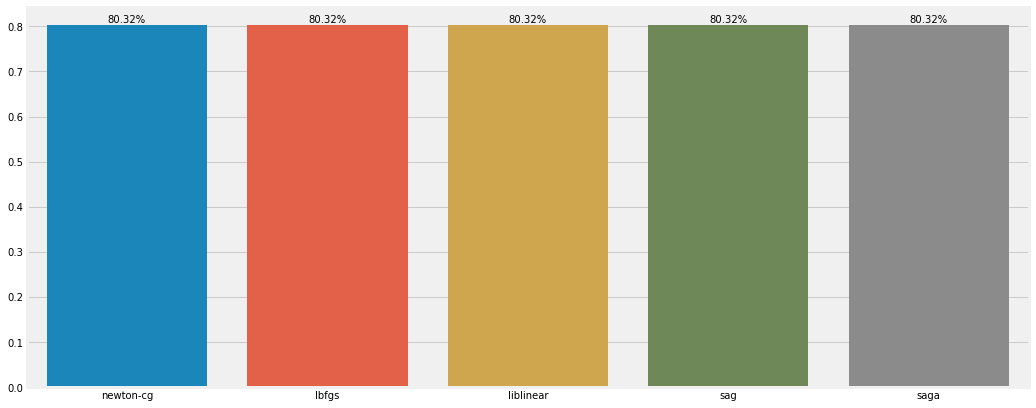

In [323]:
# Let's find the best solver value for our model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solver_accuracy=[]
for s in solver:
    lr=LogisticRegression(solver=s)
    model=lr.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    solver_accuracy.append(acc)
    print(f'{s}|{acc}')


plt.figure(figsize=(16,7))
plot=sns.barplot(x=solver,y=solver_accuracy)
for p in plot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    plot.annotate('{:.2f}%'.format(100*y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

### ***Logistic Regression Model***

In [84]:
def LogisticRegressionModel(X_train,y_train,X_test,y_test,parm):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,roc_curve
    from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score
    model= LogisticRegression(**parm)
    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    
    cm=confusion_matrix(y_test,y_pr)


    print(classification_report(y_test, y_pr))
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr))
    print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.heatmap(cm,annot=True,fmt='d')
    
    # plot ROC AUC curve
    plt.subplot(1,2,2)
    RocAucPlot(model,X_test,y_test)

    return model

              precision    recall  f1-score   support

           0       0.85      0.56      0.68       155
           1       0.82      0.95      0.88       321

    accuracy                           0.83       476
   macro avg       0.84      0.76      0.78       476
weighted avg       0.83      0.83      0.81       476

Accuracy:0.83
Precision:0.82
Recall:0.83
F1-Score:0.81


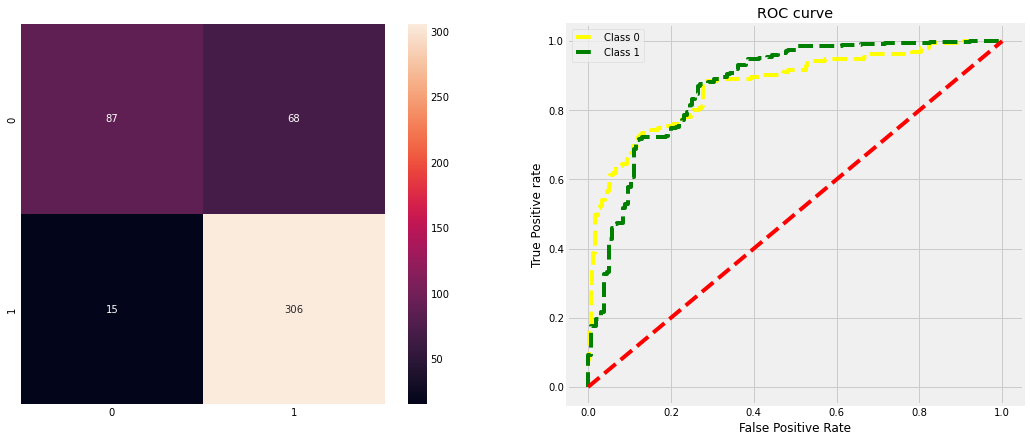

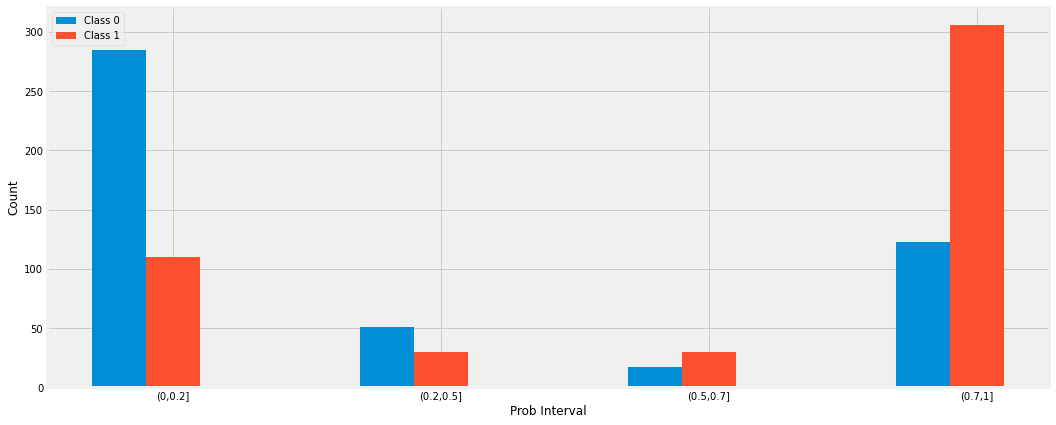

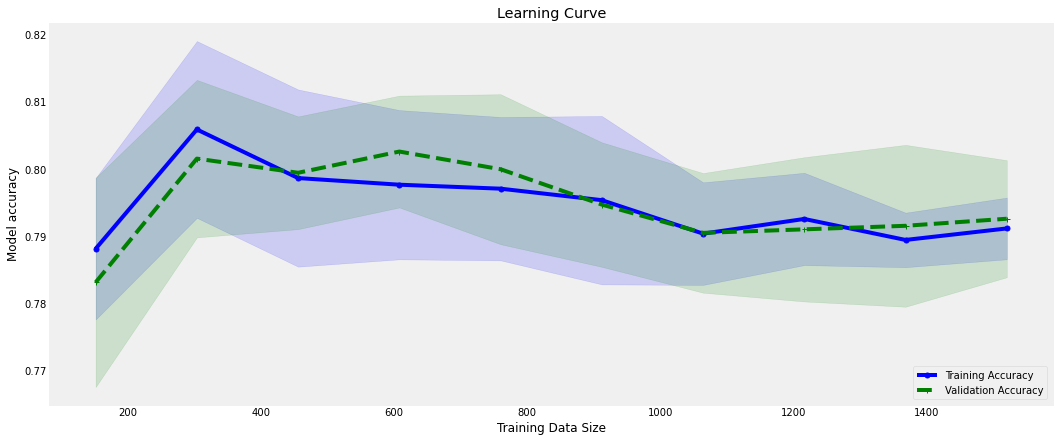

In [83]:
#Logistic Regression with Grid Seacr perameters
import pickle
lr_model=LogisticRegressionModel(X_train,y_train,X_test,y_test,lr_gridparams)
y_pred_prob = lr_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,model)
LearningCurve_(lr_model, X_train, y_train)
# save the model to disk
filename = './models/LogisticRegressionModel_grid.sav'
pickle.dump(model, open(filename, 'wb'))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63       155
           1       0.80      0.97      0.87       321

    accuracy                           0.81       476
   macro avg       0.84      0.73      0.75       476
weighted avg       0.83      0.81      0.80       476

Accuracy:0.81
Precision:0.80
Recall:0.81
F1-Score:0.80


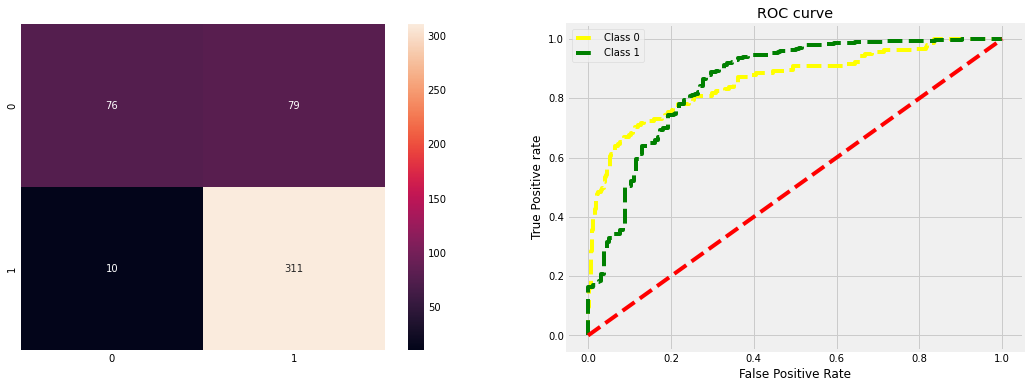

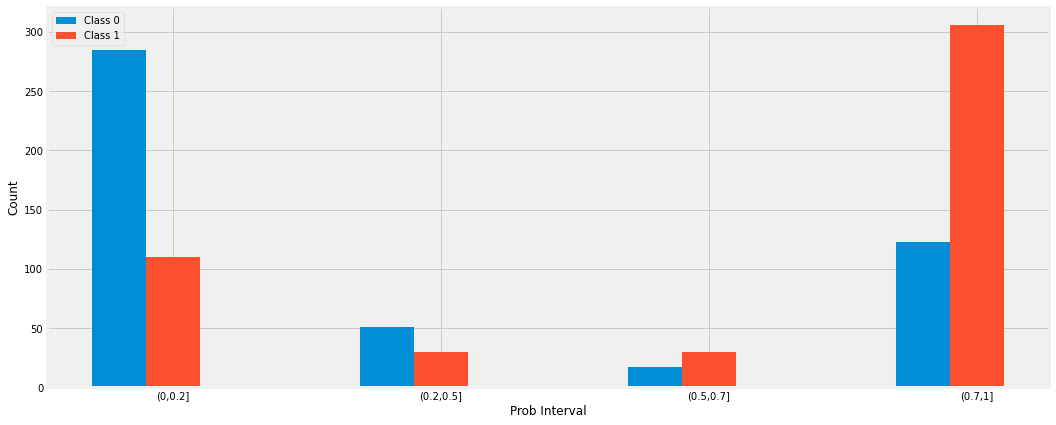

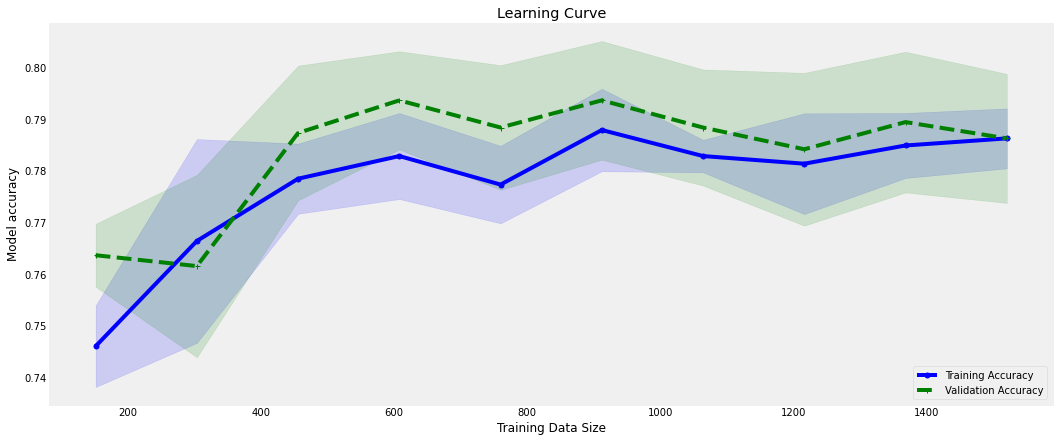

In [85]:
#Logistic Regression with Randmized search perameters
import pickle
lr_model=LogisticRegressionModel(X_train,y_train,X_test,y_test,lr_rand_params)

PlotProbIntervals(y_pred_prob,model)
LearningCurve_(lr_model, X_train, y_train)
# save the model to disk
filename = './models/LogisticRegressionModel_rfcv.sav'
pickle.dump(model, open(filename, 'wb'))

In [86]:
#function for cross validaion score
def CrossValScore(model):
    # cross validation score for Decision Tree
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    skfold = StratifiedKFold(n_splits=10, random_state=12,shuffle=True)
    results_skfold = cross_val_score(model, X_train, y_train, cv=skfold)
    print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

In [87]:
CrossValScore(lr_model)

Accuracy: 79.16%


## ***Model 2. Decision Tree***

In [99]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='DecisionTreeClassifier']
LR_DF['Dataset Variation']

1    'label','power','under','rfcv'
Name: Dataset Variation, dtype: object

In [100]:
LR_DF

Model 0 Recall 1 Recall  \
1  DecisionTreeClassifier     0.83     0.82   

                                            Features  \
1  [Gender, City, EducationLevel, JoiningDesignat...   

                Dataset Variation   Dataset  \
1  'label','power','under','rfcv'  binnedDF   

                                        Drop Columns  
1  [MMM-YY, EmpID, LastWorkingDate, DateofJoining...

In [104]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
m=DecisionTreeClassifier()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','power','under','rfcv',7,DROP_COLUMN,m)

In [105]:
features_df_new

Rank
Gender                        1
City                          1
EducationLevel                1
JoiningDesignation            1
Designation                   1
TotalBusinessValue            1
QuarterlyRating               1
TotalBusinessValue_change     1
QuarterlyRating_change        1
Promotion                     1
BinnedSalary                  1
BinnedAge                     1
Retention_years               1
YearsOfExperience             1

#### ***Decision Tree Hyperperameter using Grid Search CV***

In [186]:
# Gridsearch CV for Decision Tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
dt_cv = DecisionTreeClassifier(random_state=12)

criterion=["gini", "entropy"]
max_features=["auto", "sqrt", "log2"]
max_depth=list(range(1,20))
# spliter
# max_leaf_node
param_grid = dict(
                 criterion=criterion,
                 max_depth=max_depth,
                 max_features=max_features
                 )

# instantiate the grid
grid = GridSearchCV(dt_cv, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
grid.fit(X_train, y_train)


print('Best criterion:', grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid.best_estimator_.get_params()['max_depth'])
print('Best max_features:', grid.best_estimator_.get_params()['max_features'])
#print('Best max_iter:', grid.best_estimator_.get_params()['max_iter'])
print('Best Accuracy Score:',grid.best_score_)
print()
dt_grid_param=grid.best_estimator_.get_params()
print(dt_grid_param)

Best criterion: entropy
Best max_depth: 5
Best max_features: log2
Best Accuracy Score: 0.8253333333333334

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12, 'splitter': 'best'}


In [106]:
dt_grid_param={'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12, 'splitter': 'best'}

In [187]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
dt_rm = DecisionTreeClassifier(random_state=12)

criterion=["gini", "entropy"]
max_features=["auto", "sqrt", "log2"]
max_depth=list(range(1,20))
splitter=["best", "random"]
min_samples_leaf=list(range(1,20))
max_leaf_nodes=list(range(1,20))
ccp_alpha=list(np.arange(1e-03, 2, 0.01))
param_grid = dict(
                 criterion=criterion,
                 max_depth=max_depth,
                 max_features=max_features,
                 splitter=splitter,
                 min_samples_leaf=min_samples_leaf,
                 max_leaf_nodes=max_leaf_nodes,
                 ccp_alpha=ccp_alpha
                 )

# instantiate the grid
random_dt = RandomizedSearchCV(dt_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
random_dt.fit(X_train, y_train)

print('Best criterion:', random_dt.best_estimator_.get_params()['criterion'])
print('Best max_depth:', random_dt.best_estimator_.get_params()['max_depth'])
print('Best max_features:', random_dt.best_estimator_.get_params()['max_features'])
print('Best splitter:', random_dt.best_estimator_.get_params()['splitter'])
print('Best min_samples_leaf:', random_dt.best_estimator_.get_params()['min_samples_leaf'])
print('Best random_state:', random_dt.best_estimator_.get_params()['random_state'])
print('Best max_leaf_nodes:', random_dt.best_estimator_.get_params()['max_leaf_nodes'])
print('Best Accuracy Score:',random_dt.best_score_)
print()
dt_rand_params=random_dt.best_estimator_.get_params()
print(dt_rand_params)

Best criterion: entropy
Best max_depth: 14
Best max_features: log2
Best splitter: best
Best min_samples_leaf: 14
Best random_state: 12
Best max_leaf_nodes: 16
Best Accuracy Score: 0.7766666666666666

{'ccp_alpha': 0.08099999999999999, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2', 'max_leaf_nodes': 16, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 14, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12, 'splitter': 'best'}


In [107]:
dt_rand_params={'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 13, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12, 'splitter': 'random'}

#### ***Max Depth Value for Decision tree***

Best max_depth value is 5 and recall score is 0.848404255319149


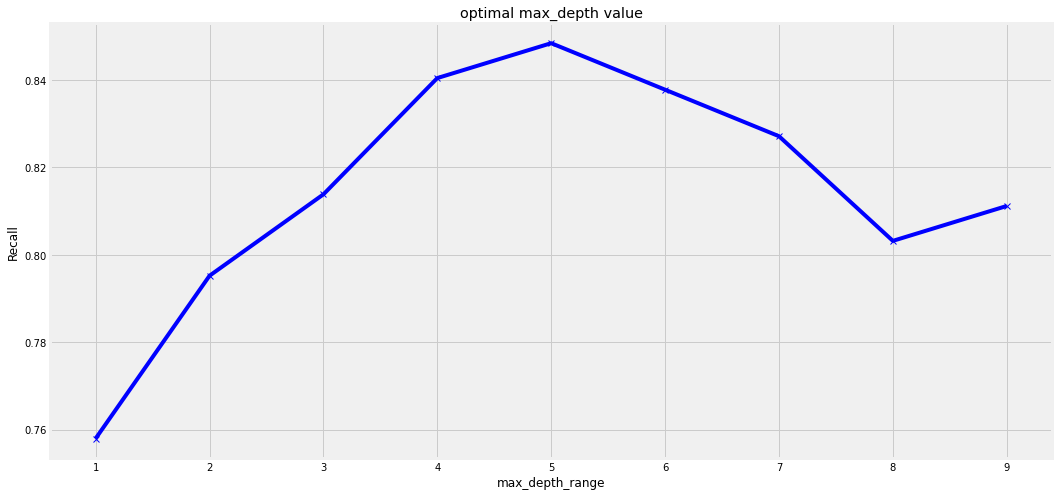

In [188]:
# #pruning the decision tree
# # List of values to try for max_depth:
max_depth_range = list(range(1, 10))# List to store the accuracy for each value of max_depth:
accuracy_dict ={}
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 12)
    clf.fit(X_train, y_train)
    
    #Calculating accuracy
    y_pr=clf.predict(X_test)
    score = recall_score(y_test, y_pr,average='weighted')
    accuracy_dict[depth]=score
best_max=max(accuracy_dict,key=accuracy_dict.get)
accuracy=[acc for acc in accuracy_dict.values()]
print('Best max_depth value is {} and recall score is {}'.format(best_max,accuracy_dict[best_max]))
plt.figure(figsize=(16,8))
plt.plot(max_depth_range,accuracy , 'bx-')
plt.xlabel('max_depth_range')
plt.ylabel('Recall')
plt.title('optimal max_depth value')
plt.show()

#### ***Best Criterion for Decision Tree***

gini|0.848404255319149
entropy|0.8404255319148937


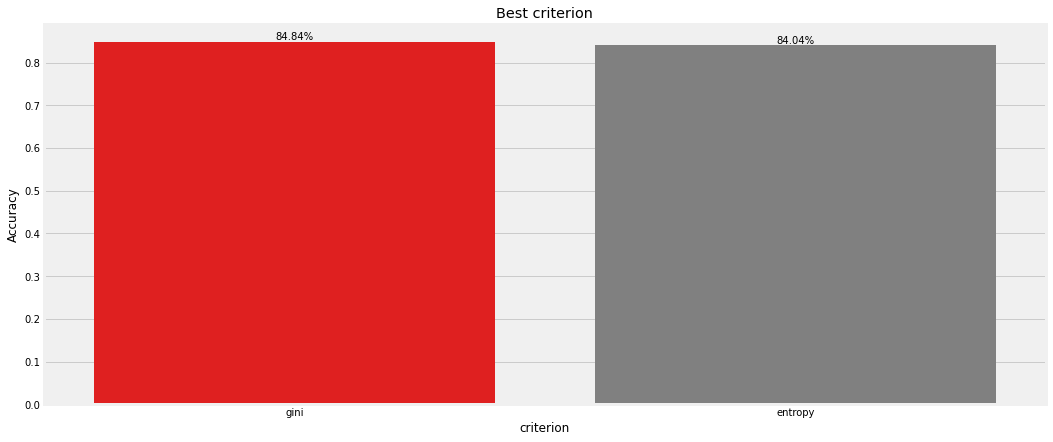

In [189]:
# best criterion value for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
criterion=["gini", "entropy"]
criterion_accuracy=[]
for s in criterion:
    lr=DecisionTreeClassifier(criterion=s,max_depth=5,random_state =12)
    model=lr.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    criterion_accuracy.append(acc)
    print(f'{s}|{acc}')
clrs = ['grey' if (x < max(criterion_accuracy)) else 'red' for x in criterion_accuracy ] 
plt.figure(figsize=(16,7))
plot=sns.barplot(x=criterion,y=criterion_accuracy,palette=clrs)
plt.xlabel('criterion')
plt.ylabel('Accuracy')
plt.title('Best criterion')

for p in plot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    plot.annotate('{:.2f}%'.format(100*y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

### ***DecisionTreeClassifier***

In [190]:
#dt_grid_param
#dt_rand_params

In [92]:
# DecisionTree
def DecisionTreeModel(X_train,y_train,X_test, y_test,parms):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score,roc_curve
    from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score

    #Modelling
    d_tree=DecisionTreeClassifier(**parms)
    #d_tree=DecisionTreeClassifier(**dt_rand_params)
    model=d_tree.fit(X_train,y_train)
    print('Training done..')
    print()
    
    #Calculating accuracy
    y_pr=model.predict(X_test)
    print('Calculating Accuracy..')
    cm=confusion_matrix(y_test,y_pr)
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr))
    print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
    report=classification_report(y_test,y_pr)
    print(report)
    
    plt.figure(figsize=(16,6))
    #plotting heatmap
    plt.subplot(1,2,1)
    sns.heatmap(cm,annot=True,fmt='d')
    
    # plot ROC AUC curve
    plt.subplot(1,2,2)
    RocAucPlot(model,X_test,y_test)
    
    
    return model

Training done..

Calculating Accuracy..
Accuracy:0.82
Precision:0.84
Recall:0.82
F1-Score:0.82
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       155
           1       0.84      0.86      0.85       221

    accuracy                           0.82       376
   macro avg       0.82      0.82      0.82       376
weighted avg       0.82      0.82      0.82       376



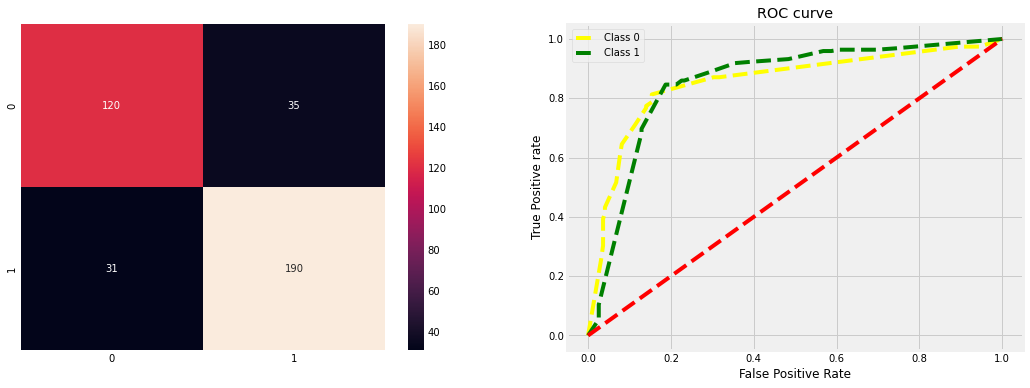

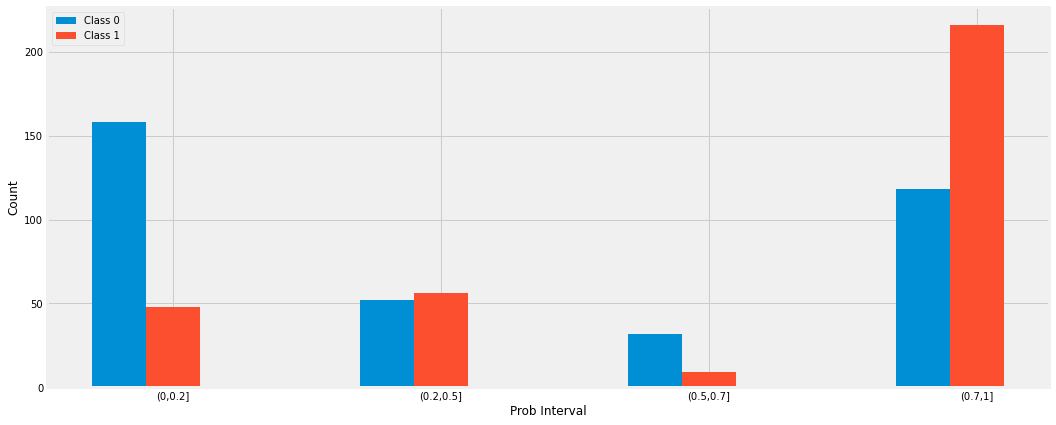

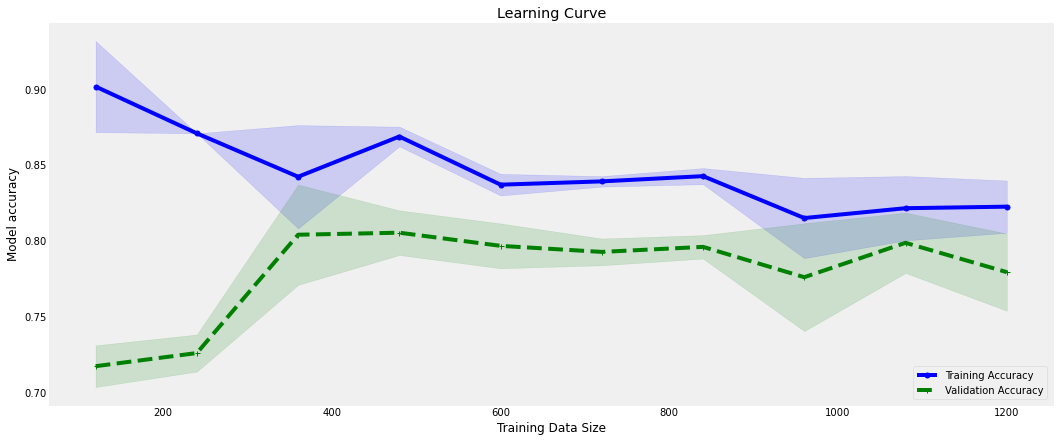

In [109]:
# Decision tree with Grid Perameters
dt_model=DecisionTreeModel(X_train,y_train,X_test, y_test,dt_grid_param)
y_pred_prob = dt_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,dt_model)
LearningCurve_(dt_model, X_train, y_train)
#save the model to disk
filename = './models/DecisionTreewithout_grid.sav'
pickle.dump(dt_model, open(filename, 'wb'))

Training done..

Calculating Accuracy..
Accuracy:0.72
Precision:0.77
Recall:0.72
F1-Score:0.72
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       155
           1       0.77      0.76      0.76       221

    accuracy                           0.72       376
   macro avg       0.71      0.71      0.71       376
weighted avg       0.72      0.72      0.72       376



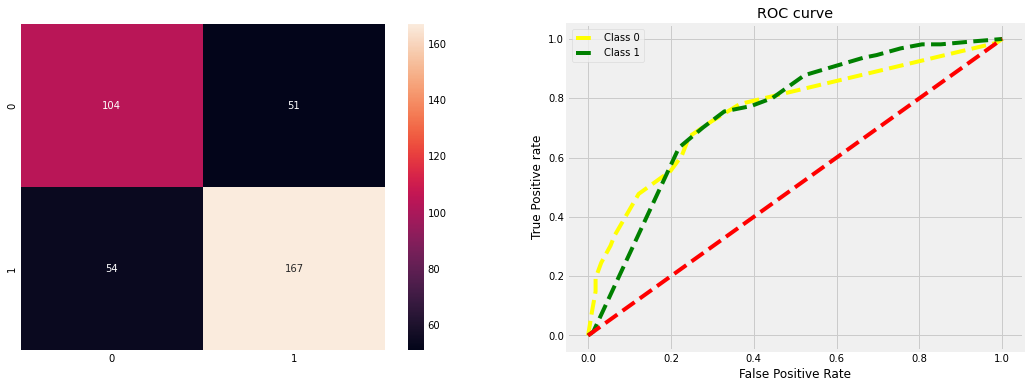

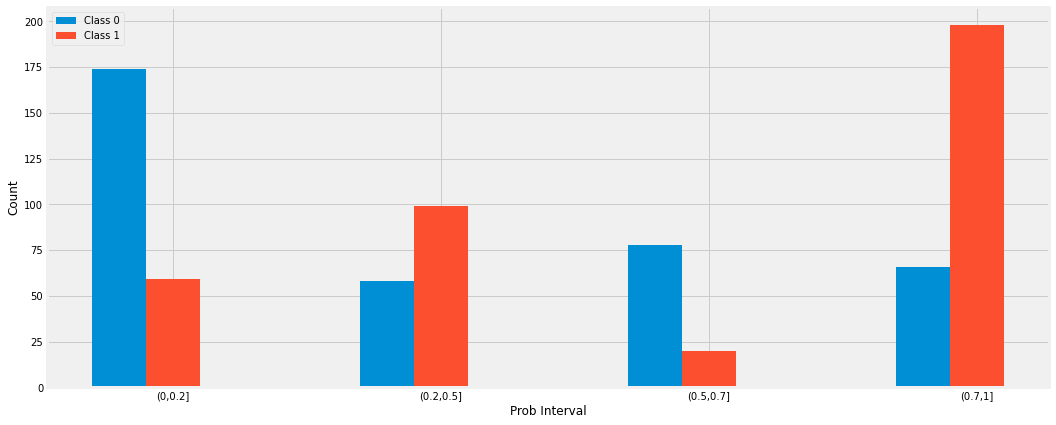

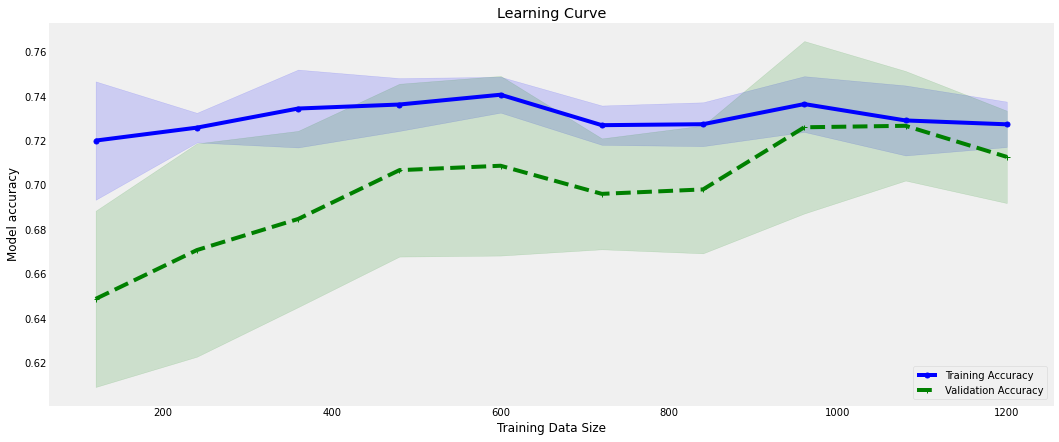

In [110]:
# Decision tree with Grid Perameters
dt_model=DecisionTreeModel(X_train,y_train,X_test, y_test,dt_rand_params)
y_pred_prob = dt_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,dt_model)
LearningCurve_(dt_model, X_train, y_train)

#save the model to disk
filename = './models/DecisionTree_randomized.sav'
pickle.dump(dt_model, open(filename, 'wb'))

Training done..

Calculating Accuracy..
Accuracy:0.85
Precision:0.88
Recall:0.85
F1-Score:0.85
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       155
           1       0.88      0.86      0.87       221

    accuracy                           0.85       376
   macro avg       0.84      0.85      0.84       376
weighted avg       0.85      0.85      0.85       376



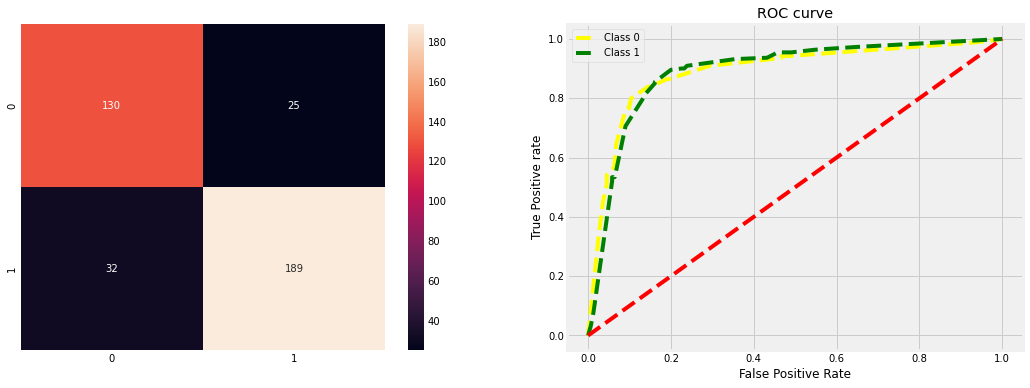

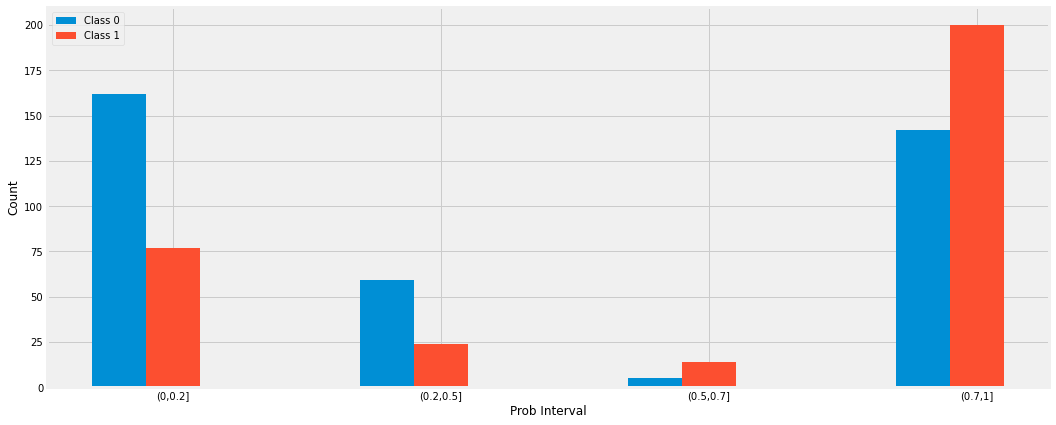

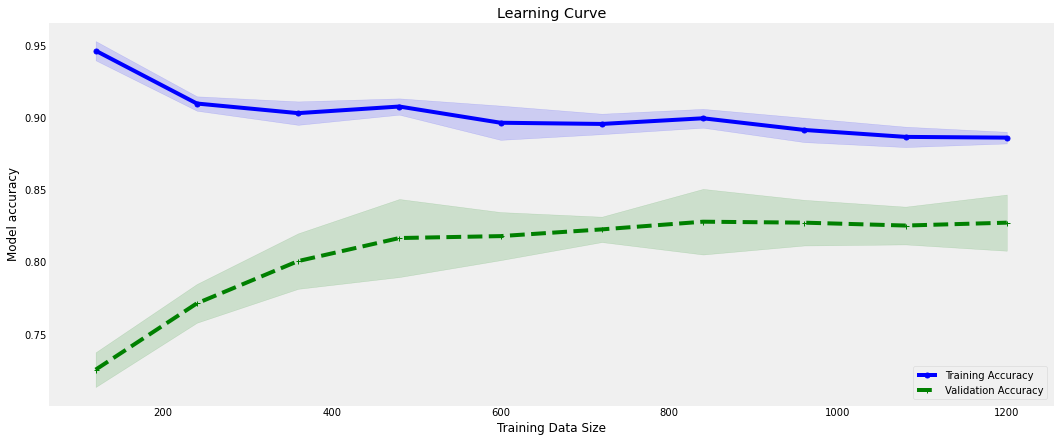

In [111]:
# Decision tree with Hyper perameters
dt_hyper={'criterion':'gini','max_depth':6,'random_state':12}
dt_model=DecisionTreeModel(X_train,y_train,X_test, y_test,dt_hyper)
y_pred_prob = dt_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,dt_model)
LearningCurve_(dt_model, X_train, y_train)
#save the model to disk
filename = './models/DecisionTree_hyper.sav'
pickle.dump(dt_model, open(filename, 'wb'))

In [116]:

def plot_feature_importance(model,importance,names,test_data,model_type):
        
    from sklearn.datasets import make_classification
    import matplotlib.pyplot as plt
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,1,1)
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    

    
#     prediction=model.predict_proba(test_data)[:,1]
#     plt.subplot(1,2,2)
#     plt.hist(prediction[y==0], bins=50, label='Stay')
#     plt.hist(prediction[y==1], bins=50, label='Left', alpha=0.7,color='red')
#     plt.xlabel('Probability of being Stay Class', fontsize=15)
#     plt.ylabel('Number of records in each bucket', fontsize=15)
#     plt.legend(fontsize=15)
#     plt.tick_params(axis='both', labelsize=15, pad=5)
#     plt.show() 

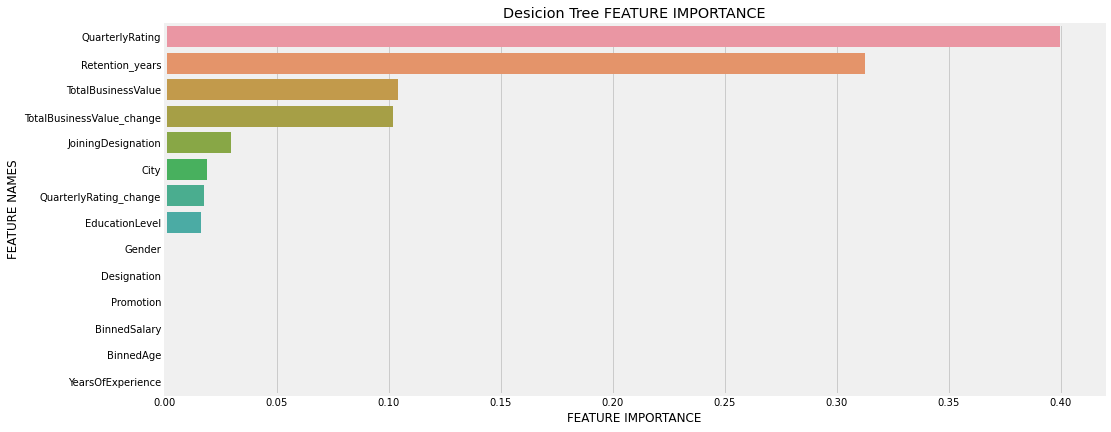

In [113]:
plot_feature_importance(dt_model,dt_model.feature_importances_,X_train.columns,X_test,'Desicion Tree') 

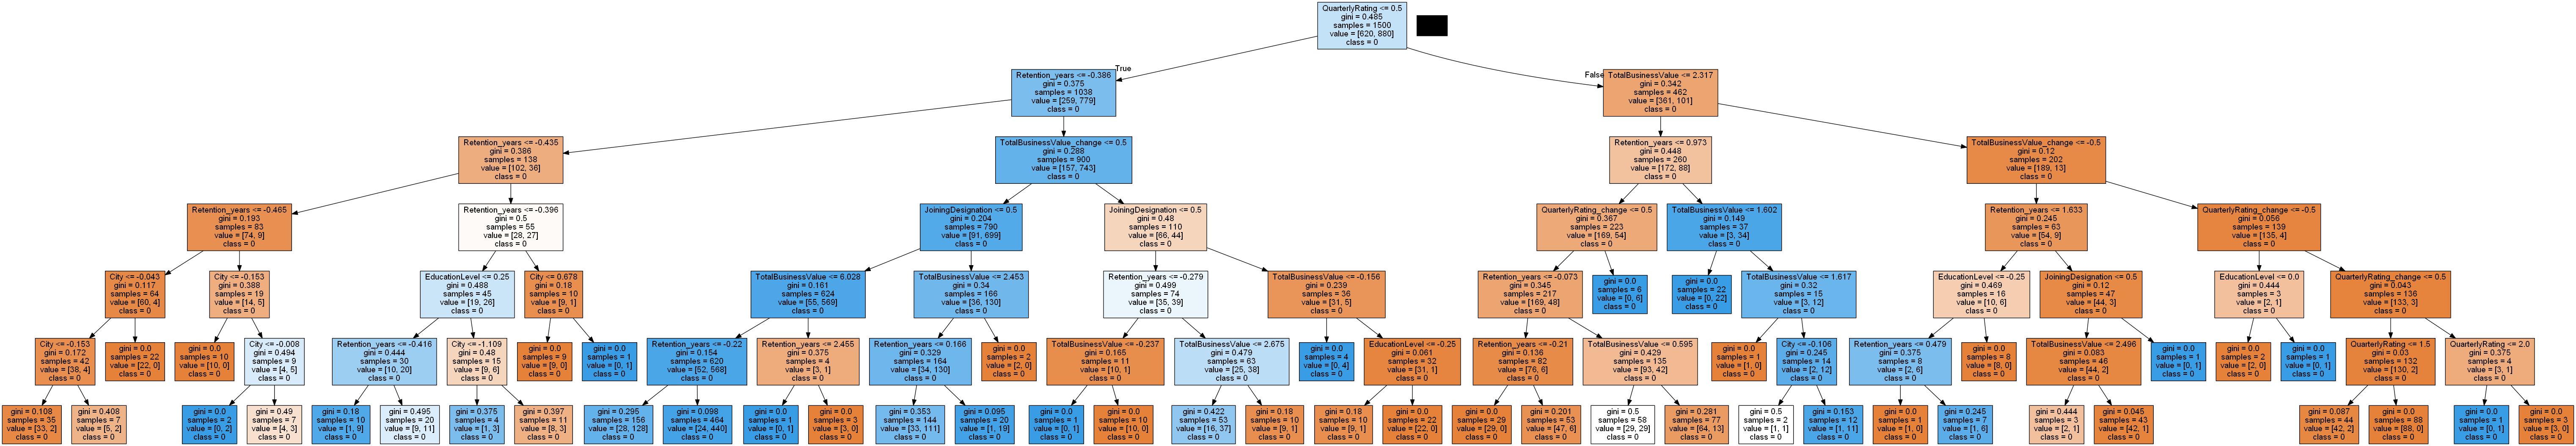

In [114]:
# Decision Tree graph
import pydotplus
from sklearn import tree
from IPython.display import Image

feature_names=X_train.columns.tolist()
class_names=[str(x) for x in finalData['Resign']]
#create dot
dot_data=tree.export_graphviz(dt_model,
                             out_file=None,
                             feature_names=feature_names,
                             class_names=class_names,
                             filled=True)

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [115]:
#cross validation for Decision tree
CrossValScore(dt_model)

Accuracy: 83.00%


## ***Model 3. KNeighborsClassifier***

In [155]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='KNeighborsClassifier']
LR_DF['Dataset Variation']

2    'label','power','',''
Name: Dataset Variation, dtype: object

In [156]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=KNeighborsClassifier(n_neighbors=15)
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','power','','',7,DROP_COLUMN,model)

In [157]:
features_df_new

Score
Feature_Name                         
QuarterlyRating            538.902359
TotalBusinessValue         254.123971
TotalBusinessValue_change  180.975144
Designation                 90.408826
BinnedSalary                60.845766
Retention_years             53.223743
YearsOfExperience           47.468124

#### ***Hyperperameters for KNeighborsClassifier***

In [376]:
# Gridsearch CV for KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
knn_cv = KNeighborsClassifier()

weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
n_neighbors=list(range(1,20))
metric=['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis']
param_grid = dict(
                 weights=weights,
                 n_neighbors=n_neighbors,
                 algorithm=algorithm,
                 metric=metric
                 )

# instantiate the grid
grid = GridSearchCV(knn_cv, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
grid.fit(X_train, y_train)

print('Best weights:', grid.best_estimator_.get_params()['weights'])
print('Best n_neighbors:', grid.best_estimator_.get_params()['n_neighbors'])
print('Best algorithm:', grid.best_estimator_.get_params()['algorithm'])
print('Best metric:', grid.best_estimator_.get_params()['metric'])
print('Best Accuracy Score:',grid.best_score_)
print()
knn_grid_params=grid.best_estimator_.get_params()
print(knn_grid_params)

Best weights: distance
Best n_neighbors: 10
Best algorithm: auto
Best metric: manhattan
Best Accuracy Score: 0.8233333333333333

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


In [121]:
knn_grid_params={'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 18, 'p': 2, 'weights': 'distance'}

In [377]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
knn_rm = KNeighborsClassifier()


n_neighbors=list(range(1,50))
weights=['uniform', 'distance']
metric=['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis']
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
p=list(range(1,50))
leaf_size=list(range(1,20))
param_grid = dict(
                 n_neighbors=n_neighbors,
                 weights=weights,
                 metric=metric,
                 algorithm=algorithm,
                 p=p
                 )

# instantiate the grid
random_knn = RandomizedSearchCV(knn_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
random_knn.fit(X_train, y_train)

print('Best n_neighbors:', random_knn.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', random_knn.best_estimator_.get_params()['weights'])
print('Best metric:', random_knn.best_estimator_.get_params()['metric'])
print('Best algorithm:', random_knn.best_estimator_.get_params()['algorithm'])
print('Best p:', random_knn.best_estimator_.get_params()['p'])
print('Best Accuracy Score:',random_knn.best_score_)
print()
knn_rand_params=random_knn.best_estimator_.get_params()
print(knn_rand_params)

Best n_neighbors: 38
Best weights: distance
Best metric: manhattan
Best algorithm: ball_tree
Best p: 42
Best Accuracy Score: 0.8233333333333335

{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 38, 'p': 42, 'weights': 'distance'}


In [122]:
knn_rand_params={'algorithm': 'brute', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 18, 'p': 20, 'weights': 'distance'}

auto|0.7898936170212766
ball_tree|0.7898936170212766
kd_tree|0.7898936170212766
brute|0.7845744680851063


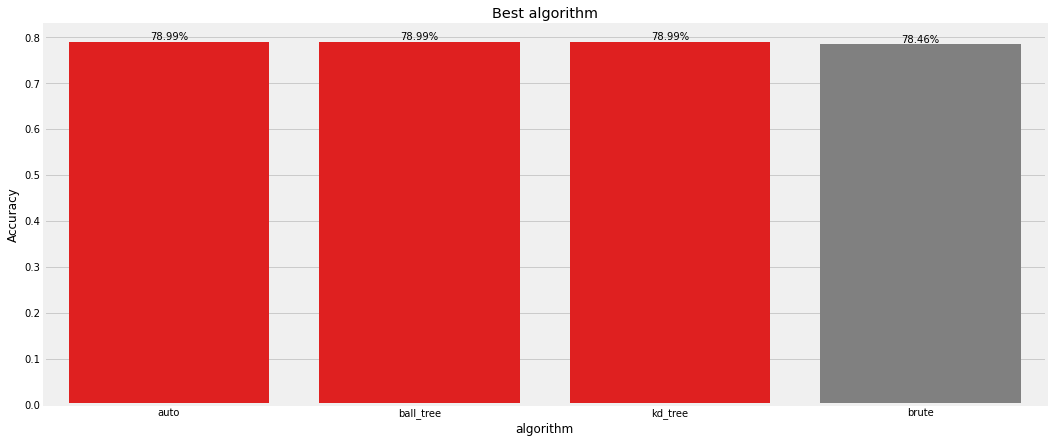

In [379]:
# best algorithm value for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
algorithm_accuracy=[]
for s in algorithm:
    lr=KNeighborsClassifier(algorithm=s)
    model=lr.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    algorithm_accuracy.append(acc)
    print(f'{s}|{acc}')
clrs = ['grey' if (x < max(algorithm_accuracy)) else 'red' for x in algorithm_accuracy ] 
plt.figure(figsize=(16,7))
plot=sns.barplot(x=algorithm,y=algorithm_accuracy,palette=clrs)
plt.xlabel('algorithm')
plt.ylabel('Accuracy')
plt.title('Best algorithm')
for p in plot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    plot.annotate('{:.2f}%'.format(100*y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

euclidean|0.7898936170212766
manhattan|0.800531914893617
chebyshev|0.7872340425531915
minkowski|0.7898936170212766


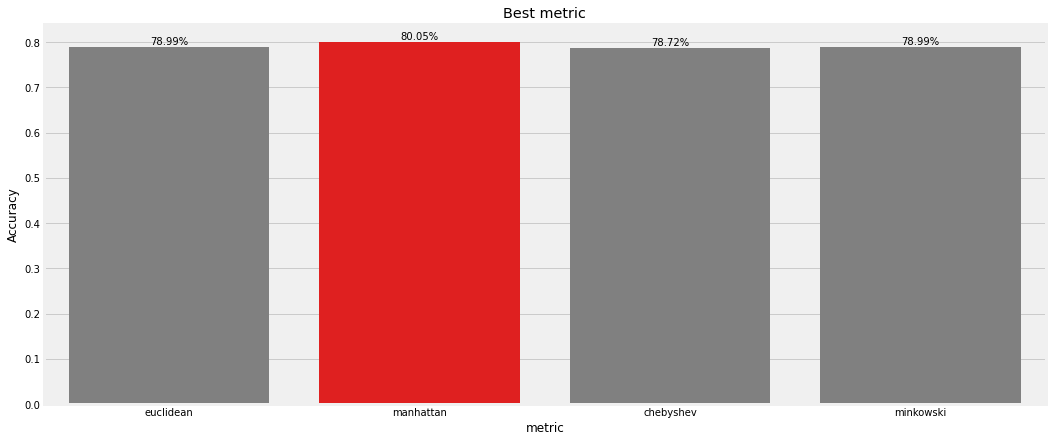

In [380]:
# best metric for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
metric=['euclidean','manhattan','chebyshev','minkowski']
metric_accuracy=[]
for s in metric:
    lr=KNeighborsClassifier(algorithm='auto',metric=s)
    model=lr.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    metric_accuracy.append(acc)
    print(f'{s}|{acc}')

clrs = ['grey' if (x < max(metric_accuracy)) else 'red' for x in metric_accuracy ]    
plt.figure(figsize=(16,7))
plot=sns.barplot(x=metric,y=metric_accuracy,palette=clrs)
plt.xlabel('metric')
plt.ylabel('Accuracy')
plt.title('Best metric')
for p in plot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    plot.annotate('{:.2f}%'.format(100*y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

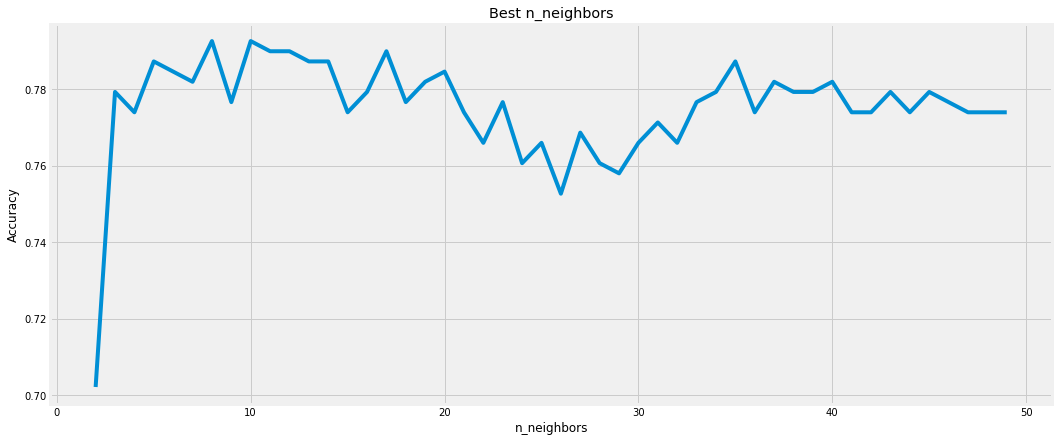

In [381]:
# best neighbors value for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
n_neighbors=list(np.arange(2,50))
n_accuracy=[]
for s in n_neighbors:
    lr=KNeighborsClassifier(algorithm='auto',metric='chebyshev',n_neighbors=s)
    model=lr.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    n_accuracy.append(acc)
clrs = ['grey' if (x < max(n_accuracy)) else 'red' for x in n_accuracy ] 
plt.figure(figsize=(16,7))
sns.lineplot(x=n_neighbors,y=n_accuracy,palette=clrs)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Best n_neighbors')
plt.show()

### ***KNeighborsClassifier***

In [124]:
#knn_grid_params
#knn_rand_params
knn_hyper={'algorithm':'brute','metric':'manhattan','n_neighbors':10}

In [125]:
# KNN after hyperperameters
def KNeighborsModel(X_train,y_train,X_test,y_test,params):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix
    # Training  KNeighborsClassifier
    gm=KNeighborsClassifier(**params)
    model=gm.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pr)
    
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr))
    print('Recall:%.2f'%recall_score(y_test, y_pr))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr))
    report=classification_report(y_test,y_pr)
    print(report)
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.heatmap(cm,annot=True,fmt='d')
    
    # plot ROC AUC curve
    plt.subplot(1,2,2)
    RocAucPlot(model,X_test,y_test)
    return model

Accuracy:0.86
Precision:0.89
Recall:0.91
F1-Score:0.90
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       155
           1       0.89      0.91      0.90       321

    accuracy                           0.86       476
   macro avg       0.85      0.84      0.84       476
weighted avg       0.86      0.86      0.86       476



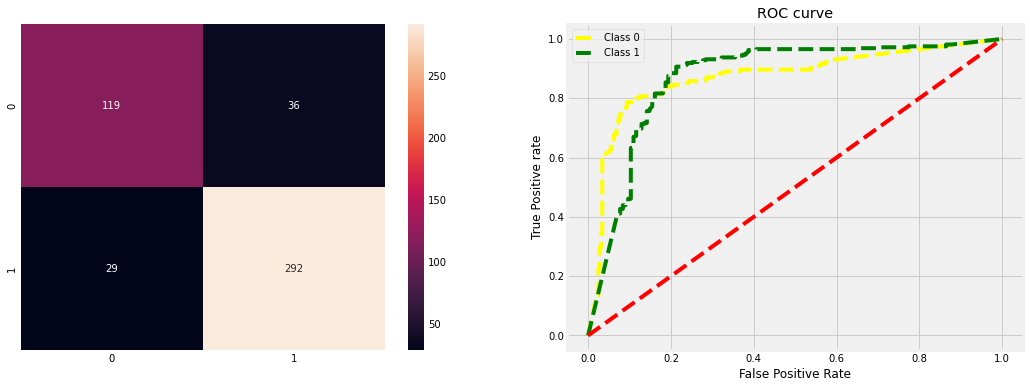

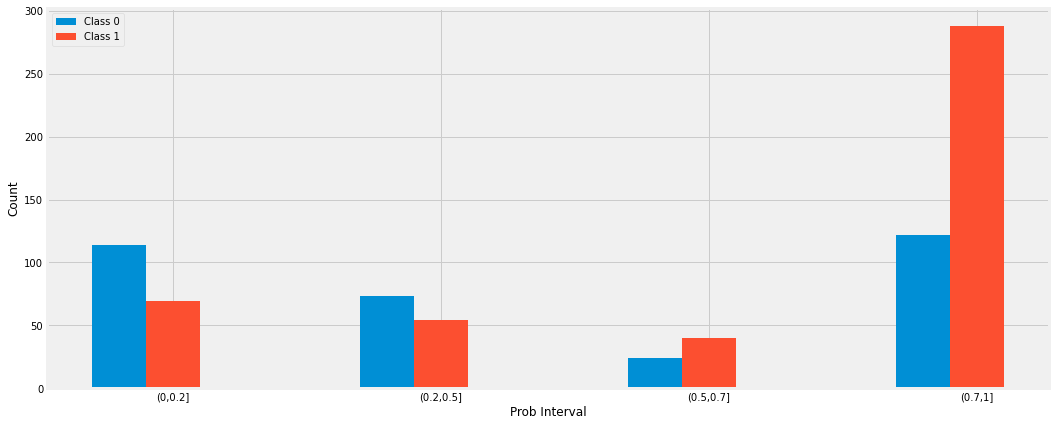

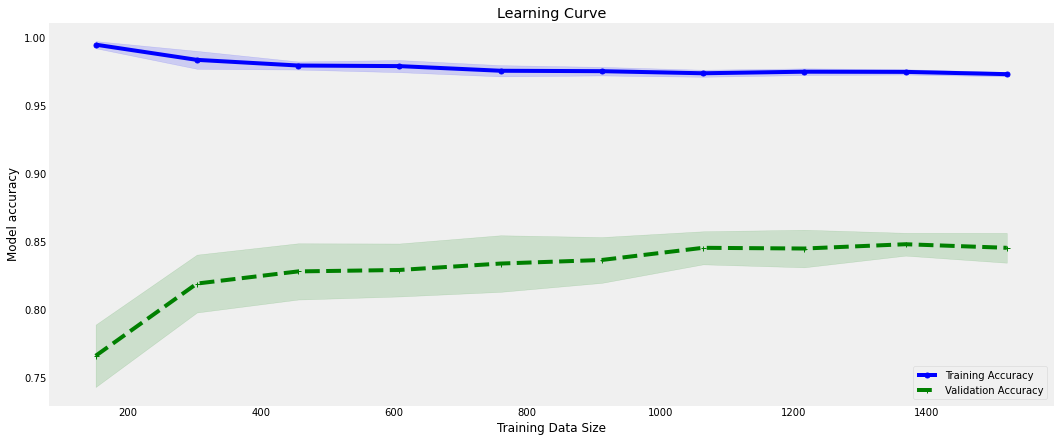

In [131]:
#KNN with grid perameters
knn_model_grid=KNeighborsModel(X_train,y_train,X_test,y_test,knn_grid_params)
y_pred_prob = knn_model_grid.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,knn_model_grid)
LearningCurve_(knn_model_grid, X_train, y_train)
#save the model to disk
filename = './models/KNeighborsClassifiert_grid.sav'
pickle.dump(knn_model_hyper, open(filename, 'wb'))

Accuracy:0.86
Precision:0.89
Recall:0.91
F1-Score:0.90
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       155
           1       0.89      0.91      0.90       321

    accuracy                           0.86       476
   macro avg       0.85      0.84      0.84       476
weighted avg       0.86      0.86      0.86       476



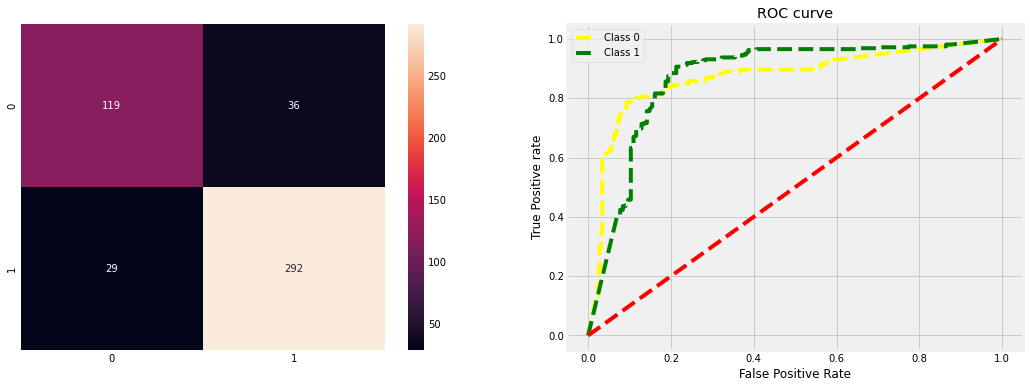

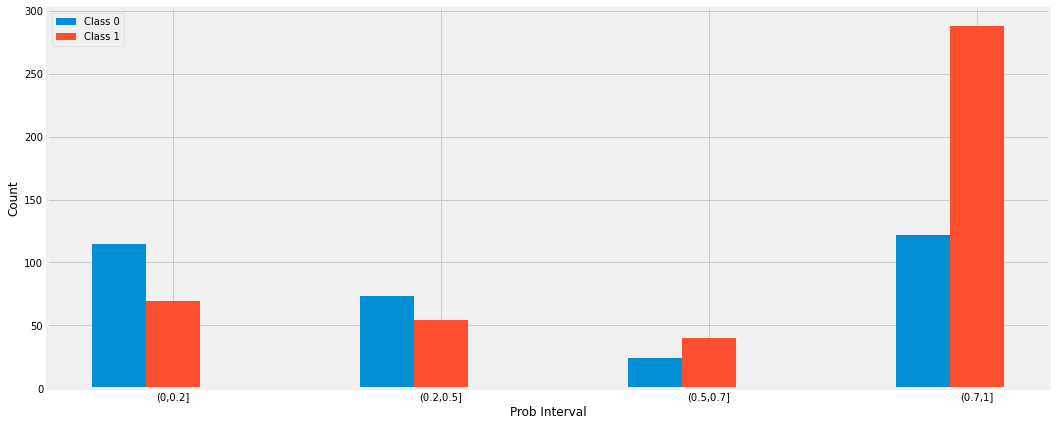

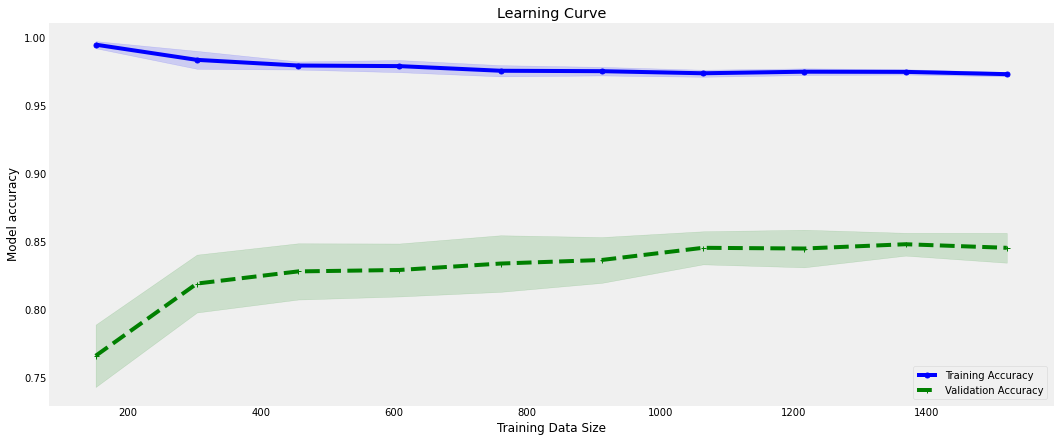

In [132]:
#KNN with randomized perameters
knn_model_rand=KNeighborsModel(X_train,y_train,X_test,y_test,knn_rand_params)
y_pred_prob = knn_model_rand.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,knn_model_rand)
LearningCurve_(knn_model_rand, X_train, y_train)
#save the model to disk
filename = './models/KNeighborsClassifiert_rand.sav'
pickle.dump(knn_model_hyper, open(filename, 'wb'))

Accuracy:0.88
Precision:0.90
Recall:0.92
F1-Score:0.91
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       155
           1       0.90      0.92      0.91       321

    accuracy                           0.88       476
   macro avg       0.86      0.85      0.86       476
weighted avg       0.88      0.88      0.88       476



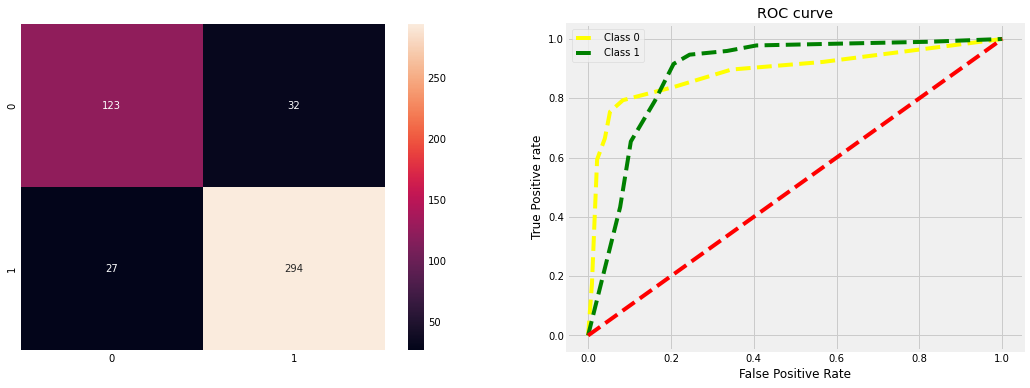

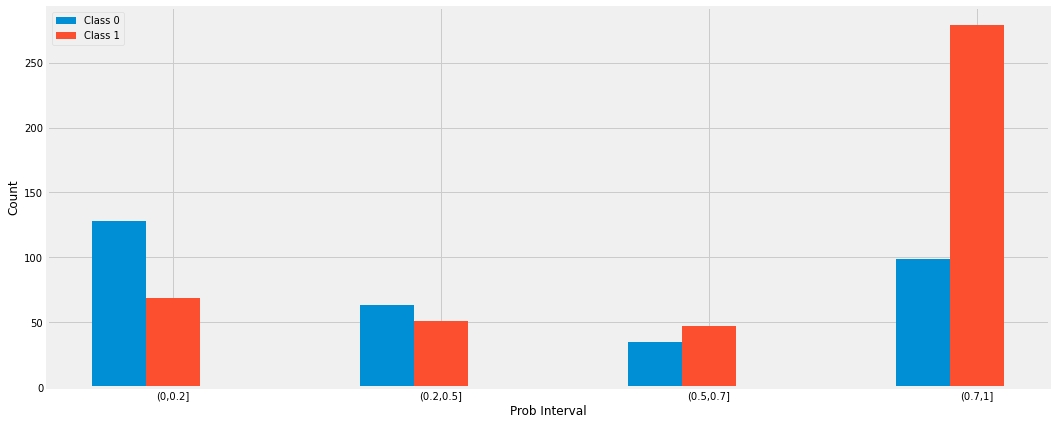

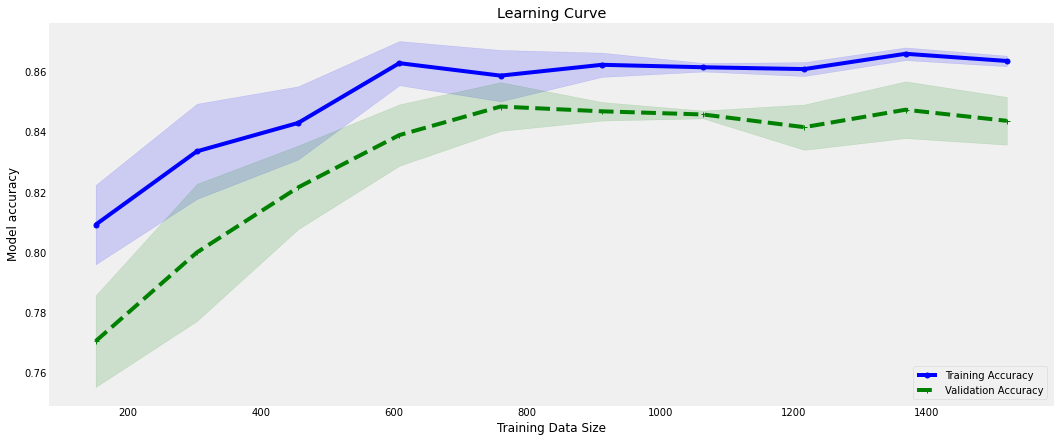

In [133]:
#KNN with hyper perameters
knn_model_hyper=KNeighborsModel(X_train,y_train,X_test,y_test,knn_hyper)
y_pred_prob = knn_model_hyper.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,knn_model_hyper)
LearningCurve_(knn_model_hyper, X_train, y_train)
#save the model to disk
filename = './models/KNeighborsClassifiert_hyper.sav'
pickle.dump(knn_model_hyper, open(filename, 'wb'))

In [134]:
# Cross validation score for KNN
CrossValScore(knn_model)

Accuracy: 84.68%


## ***Model 4. BernoulliNB***

In [135]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='BernoulliNB']
LR_DF['Dataset Variation']

7    'label','power','under','rfcv'
Name: Dataset Variation, dtype: object

In [136]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=BernoulliNB()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','power','under','rfcv',7,DROP_COLUMN,model)

#### ***Grid Seacrh for BernoulliNB***

In [390]:
# Gridsearch CV for Logistic Regression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.pipeline import Pipeline
ber = BernoulliNB()

parameters = {'alpha':list(np.arange(1e-03,0.1,1)),
             'fit_prior':(True,False)}

# instantiate the grid
grid_ber = GridSearchCV(ber, parameters,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
grid_ber.fit(X_train, y_train)
print('Best Accuracy Score:',grid_ber.best_score_)
print()
ber_gridparams=grid_ber.best_estimator_.get_params()
print(ber_gridparams)

Best Accuracy Score: 0.7873333333333334

{'alpha': 0.001, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


In [137]:
ber_gridparams={'alpha': 0.001, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [392]:
# Gridsearch CV for Logistic Regression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.pipeline import Pipeline
ber = BernoulliNB()

parameters = {'alpha':list(np.arange(1e-03,0.1,1)),
             'fit_prior':(True,False)}

# instantiate the grid
grid_ber = RandomizedSearchCV(ber, parameters,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
grid_ber.fit(X_train, y_train)
print('Best Accuracy Score:',grid_ber.best_score_)
print()
ber_ran_params=grid_ber.best_estimator_.get_params()
print(ber_ran_params)

Best Accuracy Score: 0.7873333333333334

{'alpha': 0.001, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


In [138]:
ber_ran_params={'alpha': 0.001, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [139]:
def BernoulliNBModel(X_train,y_train,X_test,y_test,params):
    from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
    from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix
    # Training Bernoulli Naive Bayes Model
    model=BernoulliNB(**params)
    ber_model=model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pr)
    
    
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr))
    print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
    report=classification_report(y_test,y_pr)
    print(report)
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.heatmap(cm,annot=True,fmt='d')
    
      # plot ROC AUC curve
    plt.subplot(1,2,2)
    RocAucPlot(model,X_test,y_test)
    
    return ber_model

Accuracy:0.77
Precision:0.80
Recall:0.77
F1-Score:0.77
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       155
           1       0.80      0.81      0.81       221

    accuracy                           0.77       376
   macro avg       0.76      0.76      0.76       376
weighted avg       0.77      0.77      0.77       376



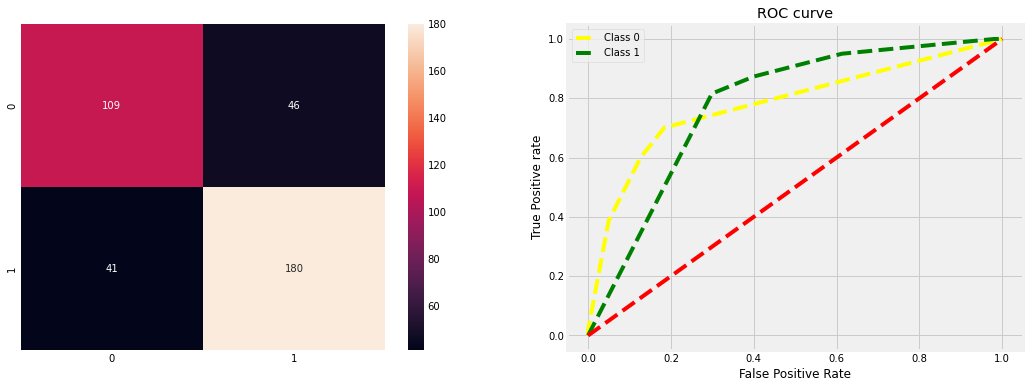

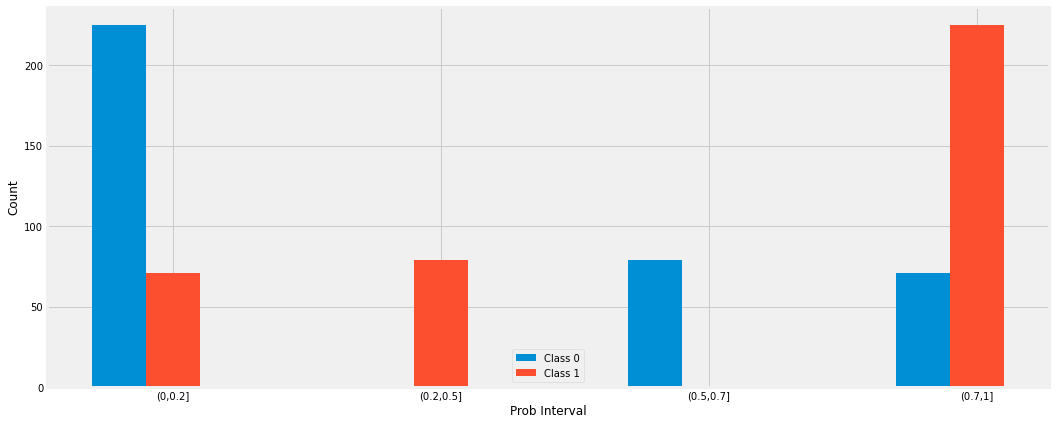

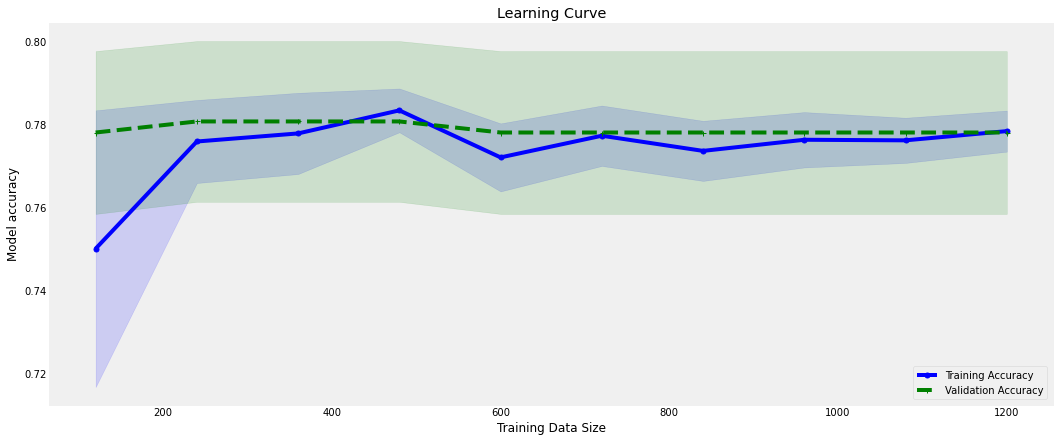

In [140]:
# BernoulliNBModel with Grid perameters
ber_model=BernoulliNBModel(X_train,y_train,X_test,y_test,ber_gridparams)
y_pred_prob = ber_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,ber_model)
LearningCurve_(ber_model, X_train, y_train)

Accuracy:0.77
Precision:0.80
Recall:0.77
F1-Score:0.77
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       155
           1       0.80      0.81      0.81       221

    accuracy                           0.77       376
   macro avg       0.76      0.76      0.76       376
weighted avg       0.77      0.77      0.77       376



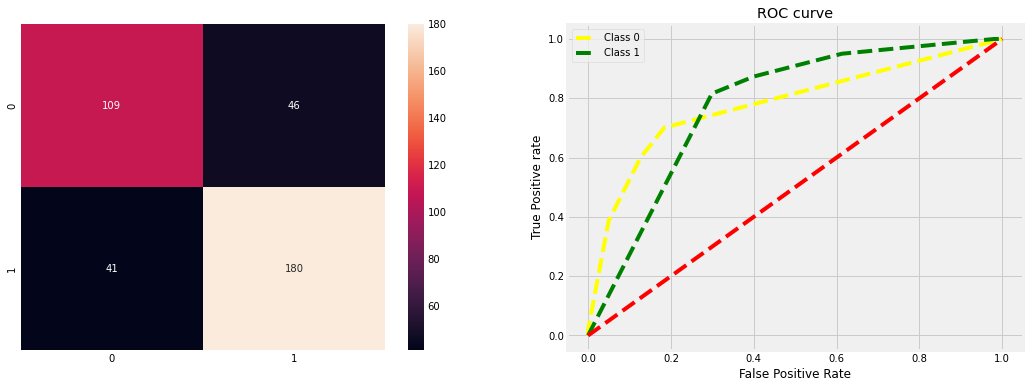

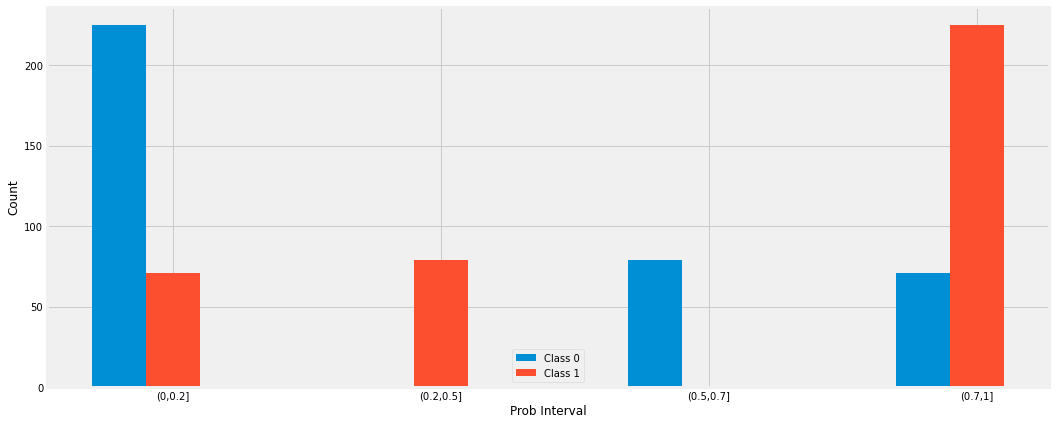

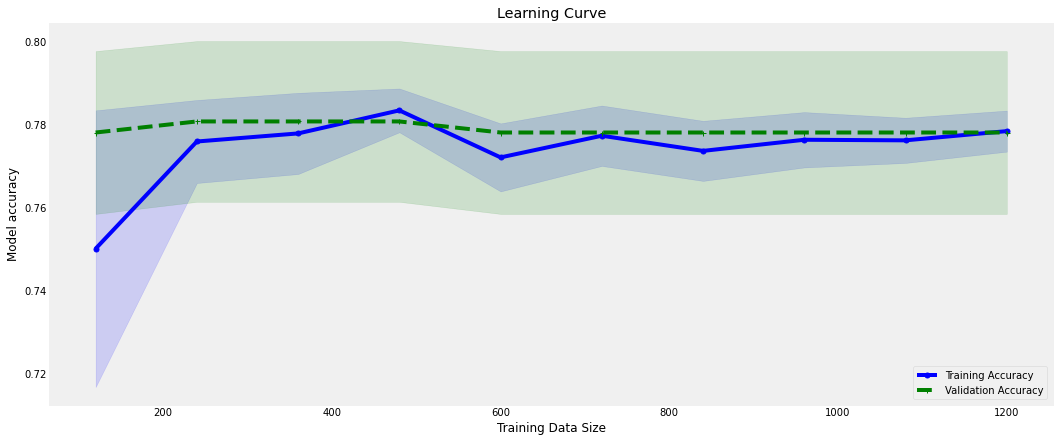

In [141]:
# BernoulliNBModel with randomized perameters
ber_model=BernoulliNBModel(X_train,y_train,X_test,y_test,ber_ran_params)
y_pred_prob = ber_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,ber_model)
LearningCurve_(ber_model, X_train, y_train)

## ***Model 5. MultinomialNB***

### ***Grid search for MultinomialNB***

In [142]:
drop_columns=['MMM-YY', 'EmpID','LastWorkingDate','DateofJoining','Age','Salary','PromoPerYr','Resign']
model=MultinomialNB()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','minmax','under','rfcv',7,drop_columns,model)

In [143]:
features_df_new

Rank
City                          1
EducationLevel                1
JoiningDesignation            1
Designation                   1
TotalBusinessValue            1
QuarterlyRating               1
Salary_change                 1
Designation_change            1
TotalBusinessValue_change     1
QuarterlyRating_change        1
Hike%                         1
Promotion                     1
BinnedSalary                  1
BinnedAge                     1
Retention_years               1
YearsOfExperience             1

In [400]:
# Gridsearch CV for MultinomialNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.pipeline import Pipeline
mnom = MultinomialNB()

parameters = {'alpha':list(np.arange(1e-03,0.1,1)),
             'fit_prior':(True,False)}

# instantiate the grid
grid_mnom = GridSearchCV(mnom, parameters,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
grid_mnom.fit(X_train, y_train)
print('Best Accuracy Score:',grid_mnom.best_score_)
print()
mnom_gridparams=grid_mnom.best_estimator_.get_params()
print(mnom_gridparams)

Best Accuracy Score: 0.762

{'alpha': 0.001, 'class_prior': None, 'fit_prior': False}


In [144]:
mnom_gridparams={'alpha': 0.001, 'class_prior': None, 'fit_prior': False}

In [402]:
# Gridsearch CV for MultinomialNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.pipeline import Pipeline
mnom = MultinomialNB()

parameters = {'alpha':list(np.arange(1e-03,0.1,1)),
             'fit_prior':(True,False)}

# instantiate the grid
ran_mnom = RandomizedSearchCV(mnom, parameters,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
ran_mnom.fit(X_train, y_train)
print('Best Accuracy Score:',ran_mnom.best_score_)
print()
mnom_ranparams=ran_mnom.best_estimator_.get_params()
print(mnom_ranparams)

Best Accuracy Score: 0.762

{'alpha': 0.001, 'class_prior': None, 'fit_prior': False}


In [145]:
mnom_ranparams={'alpha': 0.001, 'class_prior': None, 'fit_prior': False}

### ***MultinomialNB***

In [146]:
def MultinomialNBModel(X_train,y_train,X_test,y_test,params):
    from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
    from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix
    # Training Bernoulli Naive Bayes Model
    model=MultinomialNB(**params)
    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pr)
    
    
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr))
    print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
    report=classification_report(y_test,y_pr)
    print(report)
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.heatmap(cm,annot=True,fmt='d')
      # plot ROC AUC curve
    plt.subplot(1,2,2)
    RocAucPlot(model,X_test,y_test)
    
    return model

Accuracy:0.75
Precision:0.77
Recall:0.75
F1-Score:0.75
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       155
           1       0.77      0.82      0.79       221

    accuracy                           0.75       376
   macro avg       0.74      0.73      0.74       376
weighted avg       0.75      0.75      0.75       376



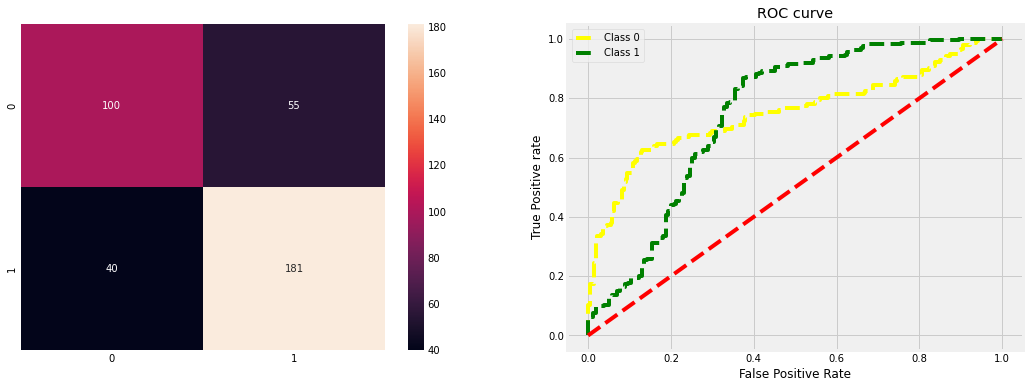

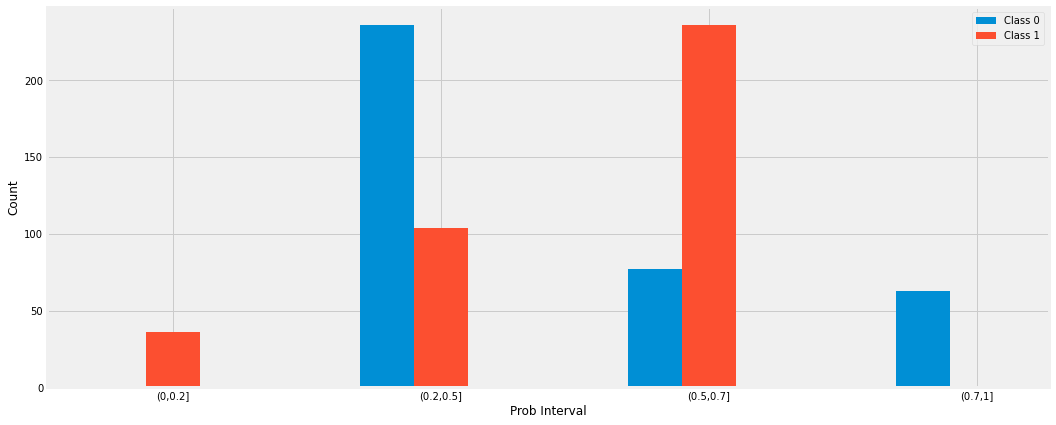

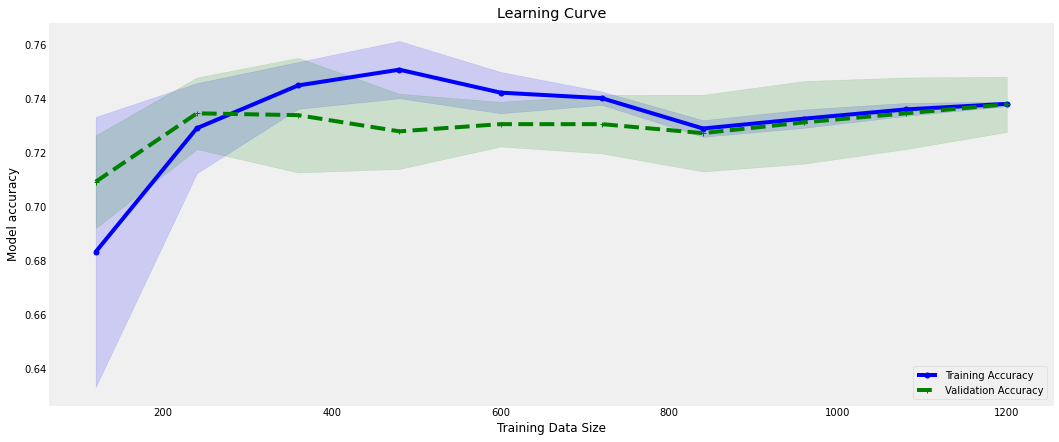

In [147]:
# MultinomialNB with grid perameters
multinb_model=MultinomialNBModel(X_train,y_train,X_test,y_test,mnom_gridparams)
y_pred_prob = multinb_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,multinb_model)
LearningCurve_(multinb_model, X_train, y_train)

Accuracy:0.75
Precision:0.77
Recall:0.75
F1-Score:0.75
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       155
           1       0.77      0.82      0.79       221

    accuracy                           0.75       376
   macro avg       0.74      0.73      0.74       376
weighted avg       0.75      0.75      0.75       376



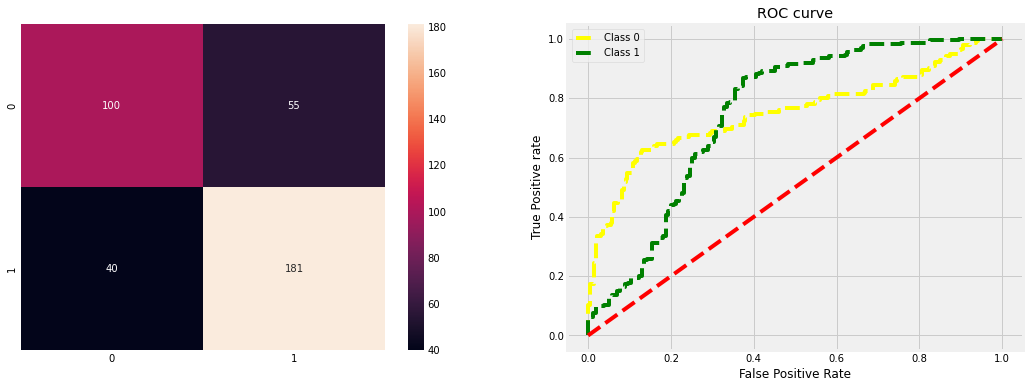

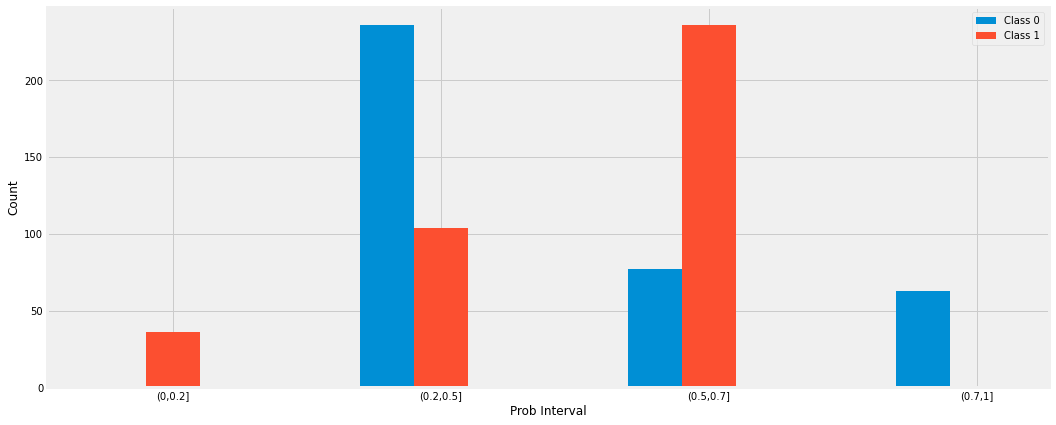

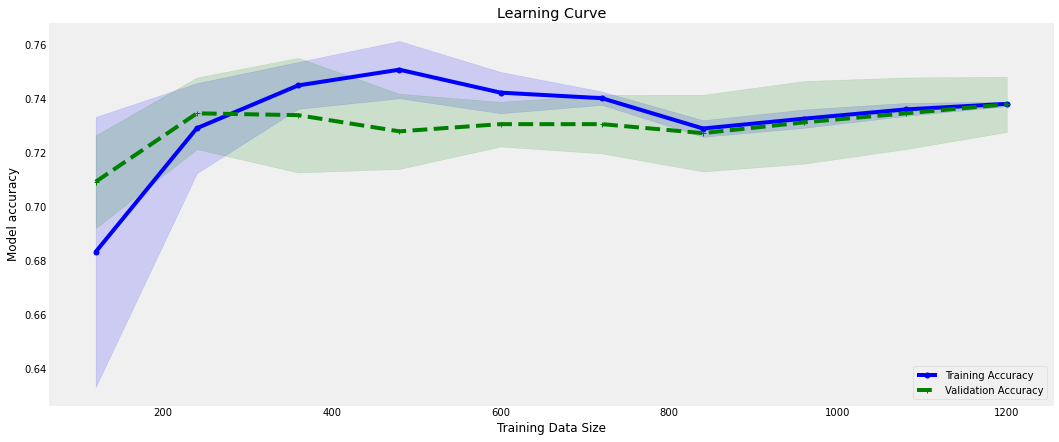

In [148]:
# MultinomialNB with randomized perameters
multinb_model=MultinomialNBModel(X_train,y_train,X_test,y_test,mnom_ranparams)
y_pred_prob = multinb_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,multinb_model)
LearningCurve_(multinb_model, X_train, y_train)

## ***Model 6. GaussianNB***

In [158]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='GaussianNB']
LR_DF['Dataset Variation']

8    'label','standard','under','rfcv'
Name: Dataset Variation, dtype: object

In [159]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=GaussianNB()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=(testing_df,'label','standard','under','rfcv',7,DROP_COLUMN,model)

#### ***Grid search CV for GaussianNB***

In [ ]:
# Gridsearch CV for
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.pipeline import Pipeline
gaus = GaussianNB()

parameters = {'var_smoothing':list(np.arange(1e-03,0.1,1))}

# instantiate the grid
grid_gaus = GridSearchCV(gaus, parameters,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
grid_gaus.fit(X_train, y_train)
print('Best Accuracy Score:',grid_gaus.best_score_)
print()
gaus_gridparams=grid_gaus.best_estimator_.get_params()
print(gaus_gridparams)

In [407]:
gaus_gridparams={'priors': None, 'var_smoothing': 0.001}

In [ ]:
# Randomized CV for
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.pipeline import Pipeline
gaus = GaussianNB()

parameters = {'var_smoothing':list(np.arange(1e-03,0.1,1))}

# instantiate the grid
ran_gaus = RandomizedSearchCV(gaus, parameters,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
ran_gaus.fit(X_train, y_train)
print('Best Accuracy Score:',ran_gaus.best_score_)
print()
gaus_ran_params=ran_gaus.best_estimator_.get_params()
print(gaus_ran_params)

In [408]:
gaus_ran_params={'priors': None, 'var_smoothing': 0.001}

### ***GaussianNB***

In [409]:
def GaussianNBModel(X_train,y_train,X_test,y_test,params):
    from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
    from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix
    # Training Bernoulli Naive Bayes Model
    model=GaussianNB(**params)
    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pr)
    
    
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr))
    print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
    report=classification_report(y_test,y_pr)
    print(report)
    
    plt.figure(figsize=(16,6))
    sns.heatmap(cm,annot=True,fmt='d')
      # plot ROC AUC curve
    RocAucPlot(model,X_test,y_test)
    
    return model

Accuracy:0.75
Precision:0.75
Recall:0.75
F1-Score:0.74
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       155
           1       0.75      0.86      0.80       221

    accuracy                           0.75       376
   macro avg       0.75      0.72      0.73       376
weighted avg       0.75      0.75      0.74       376



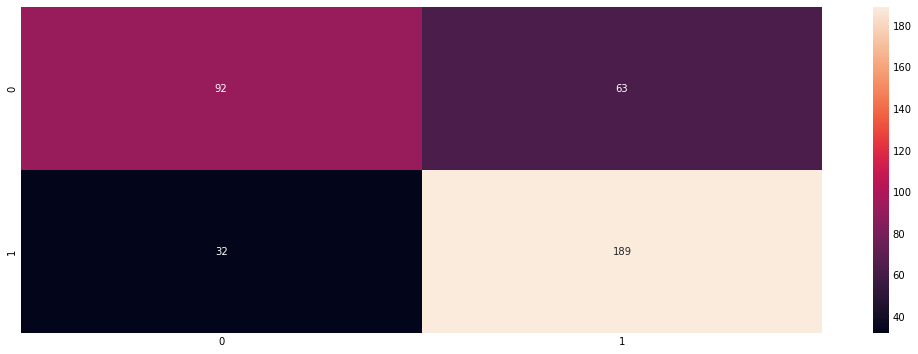

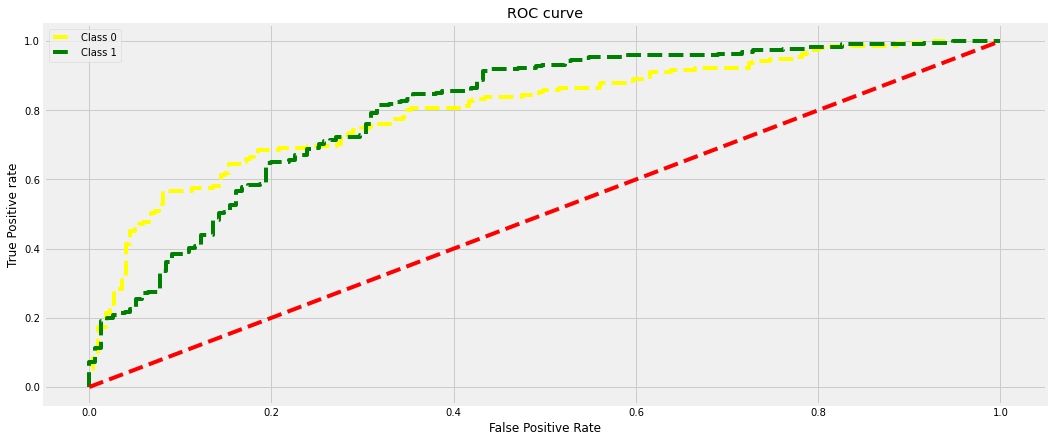

In [410]:
#model with Grid perameters
gus_model=GaussianNBModel(X_train,y_train,X_test,y_test,gaus_gridparams)

Accuracy:0.75
Precision:0.75
Recall:0.75
F1-Score:0.74
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       155
           1       0.75      0.86      0.80       221

    accuracy                           0.75       376
   macro avg       0.75      0.72      0.73       376
weighted avg       0.75      0.75      0.74       376



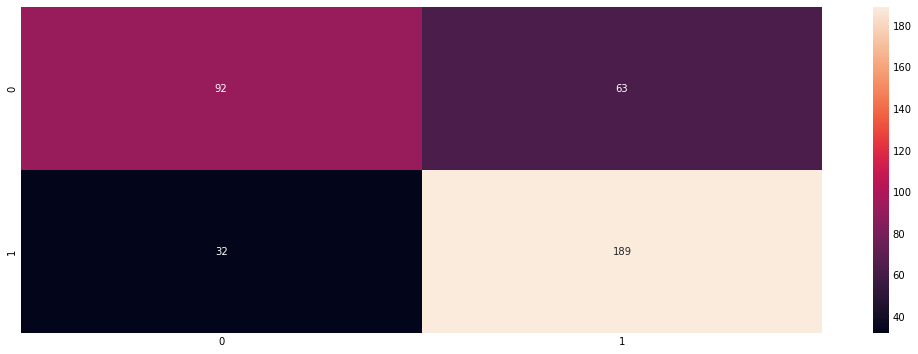

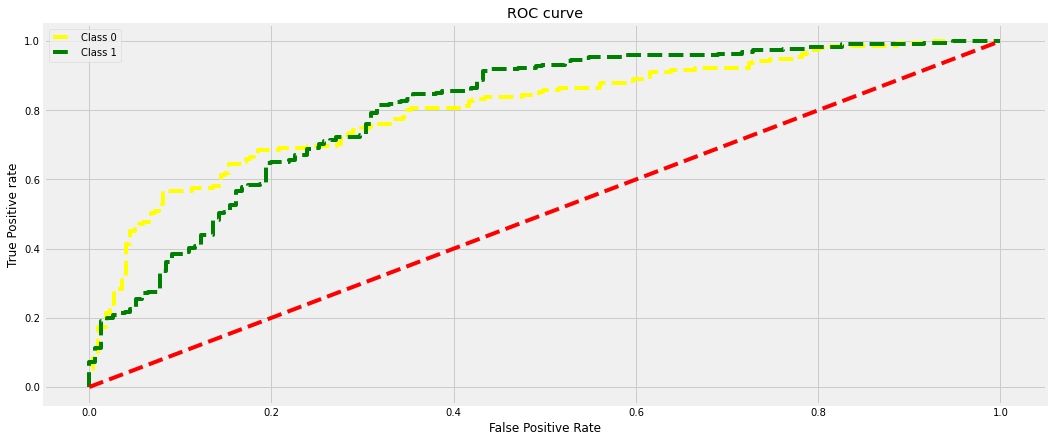

In [411]:
#model with randomized perameters
gus_model=GaussianNBModel(X_train,y_train,X_test,y_test,gaus_ran_params)

In [ ]:
# from sklearn.model_selection import train_test_split
# base_df1=testing_df.copy()
# columns=['Gender','EducationLevel','Promotion']
# base_df1=convertToNumerical(base_df1,columns,'label')
# base_df1=convertToNumerical(base_df1,['City'],'target')

# base_df1.drop(['MMM-YY', 'EmpID','LastWorkingDate','DateofJoining','Age','Salary','TotalBusinessValue','PromoPerYr','City'],axis=1,inplace=True)
# X=base_df1.drop('Resign',axis=1)
# y=base_df1['Resign']
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=41)

## ***Model 7. SVM***

In [161]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='SVC']
LR_DF['Dataset Variation']

9    'label','minmax','under',''
Name: Dataset Variation, dtype: object

In [163]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=SVC()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','minmax','under','',7,DROP_COLUMN,model)

In [164]:
features_df_new

Score
Feature_Name                         
QuarterlyRating            409.300973
TotalBusinessValue         206.230780
TotalBusinessValue_change  151.661133
Designation                 76.506786
BinnedSalary                58.541903
Retention_years             34.316988
City                        31.397284

### ***Hyperperameters for SVM***

linear|0.773936170212766
poly|0.7898936170212766
rbf|0.7925531914893617
sigmoid|0.48936170212765956


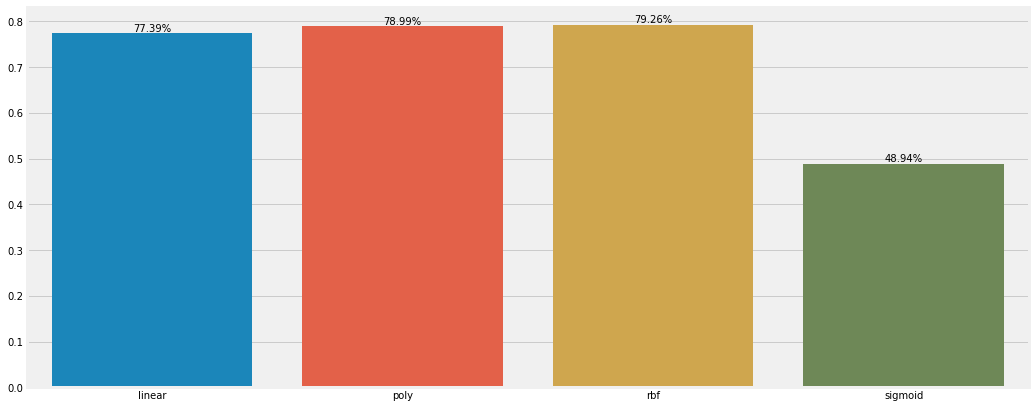

In [416]:
# Let's find the best kernel value for our model
from sklearn.svm import SVC
kernels=['linear', 'poly', 'rbf', 'sigmoid']
kernels_accuracy=[]
for k in kernels:
    svm=SVC(kernel=k)
    model=svm.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    kernels_accuracy.append(acc)
    print(f'{k}|{acc}')

plt.figure(figsize=(16,7))
plot=sns.barplot(x=kernels,y=kernels_accuracy)
for p in plot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    plot.annotate('{:.2f}%'.format(100*y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()
plt.show()

Kernel poly is giving the highest accuracy

Best C value is:3
Accuracy:0.80


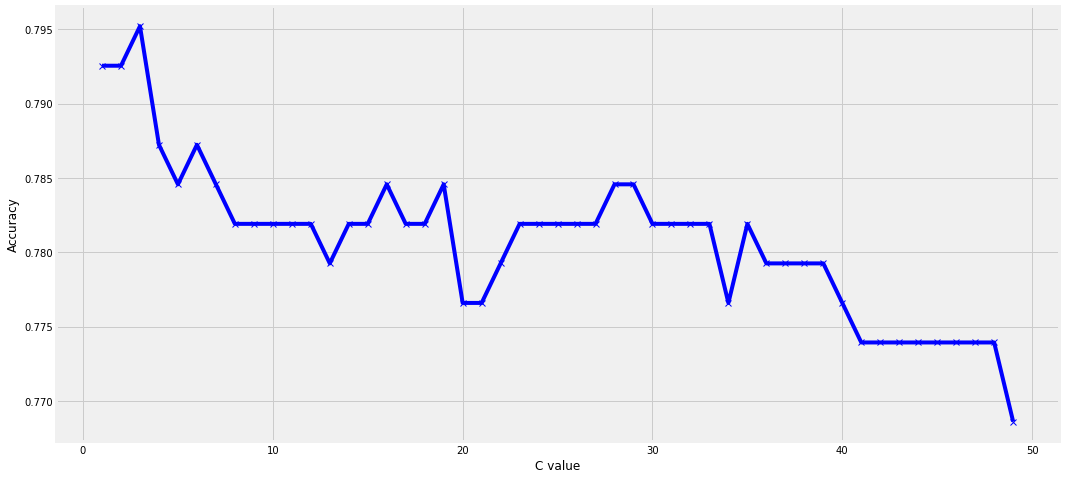

In [417]:
# let's find the best C values for our SVM
accuracy = []
c_value={}
C=range(1,50)
for c in C:
    svm=SVC(kernel='rbf',C=c)
    model=svm.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    accuracy.append(acc)
    c_value[c]=acc

best_c=max(c_value,key=c_value.get)
print('Best C value is:{}'.format(max(c_value,key=c_value.get)))
print('Accuracy:%.2f'%c_value[best_c])
plt.figure(figsize=(16,8))
plt.plot(C, accuracy, 'bx-')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.show()

In [418]:
# Gridsearch CV for SVM
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
svc_cv = SVC()

kernel=['linear', 'poly', 'rbf', 'sigmoid']
gamma=['scale', 'auto']
C=[1,10,100,1000]
shrinking =[True,False]
decision_function_shape =['ovo','ovr']
param_grid = dict(
                 kernel=kernel,
                 gamma=gamma,
                 C=C,
                 shrinking=shrinking,
                 decision_function_shape=decision_function_shape
                 )

# instantiate the grid
grid_svm = GridSearchCV(svc_cv, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
grid_svm.fit(X_train, y_train)

print('Best kernel:', grid_svm.best_estimator_.get_params()['kernel'])
print('Best gamma:', grid_svm.best_estimator_.get_params()['gamma'])
print('Best C:', grid_svm.best_estimator_.get_params()['C'])
print('Best Accuracy Score:',grid_svm.best_score_)
print()
svm_grid_params=grid_svm.best_estimator_.get_params()
print(svm_grid_params)

Best kernel: rbf
Best gamma: scale
Best C: 100
Best Accuracy Score: 0.8053333333333332

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [165]:
svm_gridparam={'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

In [419]:
# Gridsearch CV for KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
svc_cv = SVC()

kernel=['linear', 'poly', 'rbf', 'sigmoid']
gamma=['scale', 'auto']
C=list(range(1,1000))
shrinking =[True,False]
decision_function_shape =['ovo','ovr']
param_grid = dict(
                 kernel=kernel,
                 gamma=gamma,
                 C=C,
                 shrinking=shrinking,
                 decision_function_shape=decision_function_shape
                 )

# instantiate the grid
ran_svm = RandomizedSearchCV(svc_cv, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
ran_svm.fit(X_train, y_train)

print('Best kernel:', ran_svm.best_estimator_.get_params()['kernel'])
print('Best gamma:', ran_svm.best_estimator_.get_params()['gamma'])
print('Best C:', ran_svm.best_estimator_.get_params()['C'])
print('Best Accuracy Score:',ran_svm.best_score_)
print()
svm_ran_params=ran_svm.best_estimator_.get_params()
print(svm_ran_params)

Best kernel: rbf
Best gamma: scale
Best C: 507
Best Accuracy Score: 0.8073333333333332

{'C': 507, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': False, 'tol': 0.001, 'verbose': False}


In [166]:
svm_ran_params={'C': 507, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': False, 'tol': 0.001, 'verbose': False}

### ***SVM***

In [167]:
#svm_gridparam
#svm_ran_params
svm_hyper={'C':3,'probability': True,'kernel':'rbf'}

In [169]:
def SVCModel(X_train,y_train,X_test,y_test,params):
    from sklearn.svm import LinearSVC,SVC
    from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix
    # Training Bernoulli Naive Bayes Model
    model=SVC(**params)
    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pr)
    
    
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr))
    print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
    report=classification_report(y_test,y_pr)
    print(report)
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.heatmap(cm,annot=True,fmt='d')
      # plot ROC AUC curve
    plt.subplot(1,2,2)
    RocAucPlot(model,X_test,y_test)
    
    return model

Accuracy:0.77
Precision:0.81
Recall:0.77
F1-Score:0.77
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       155
           1       0.81      0.81      0.81       221

    accuracy                           0.77       376
   macro avg       0.77      0.77      0.77       376
weighted avg       0.77      0.77      0.77       376



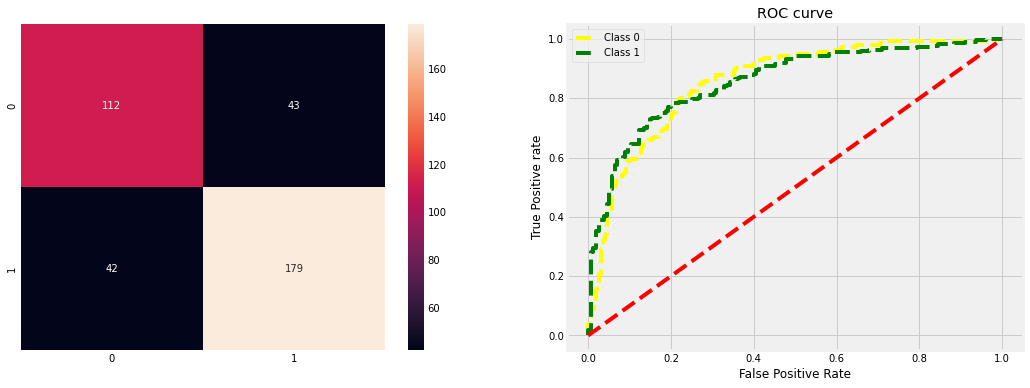

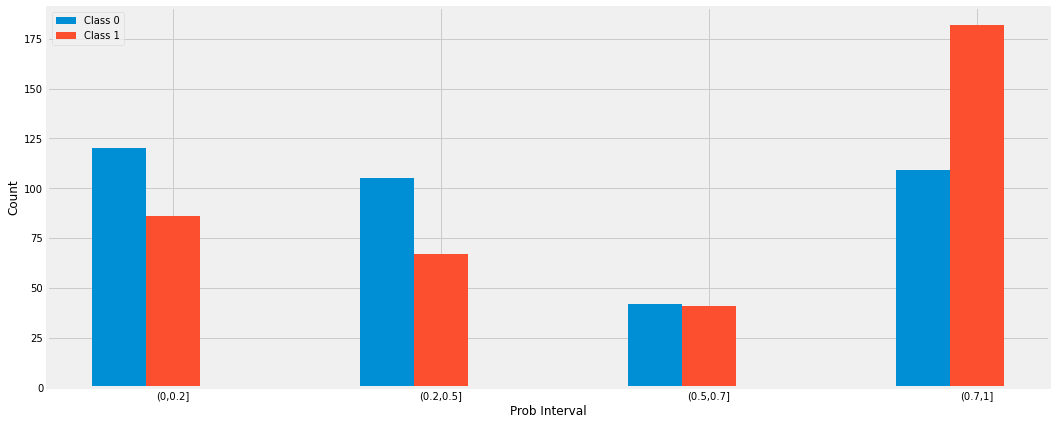

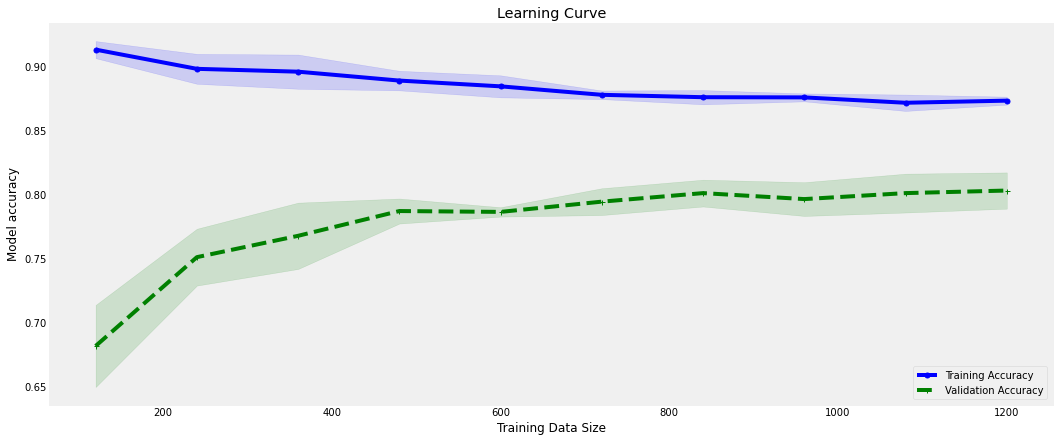

In [170]:
#SVM with grid perameters
import pickle
svm_model=SVCModel(X_train,y_train,X_test,y_test,svm_gridparam)

y_pred_prob = svm_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,svm_model)
LearningCurve_(svm_model, X_train, y_train)
#save the model to disk
filename = './models/SVM_gridr.sav'
pickle.dump(svm_model, open(filename, 'wb'))

Accuracy:0.75
Precision:0.78
Recall:0.75
F1-Score:0.75
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       155
           1       0.78      0.81      0.79       221

    accuracy                           0.75       376
   macro avg       0.75      0.74      0.74       376
weighted avg       0.75      0.75      0.75       376



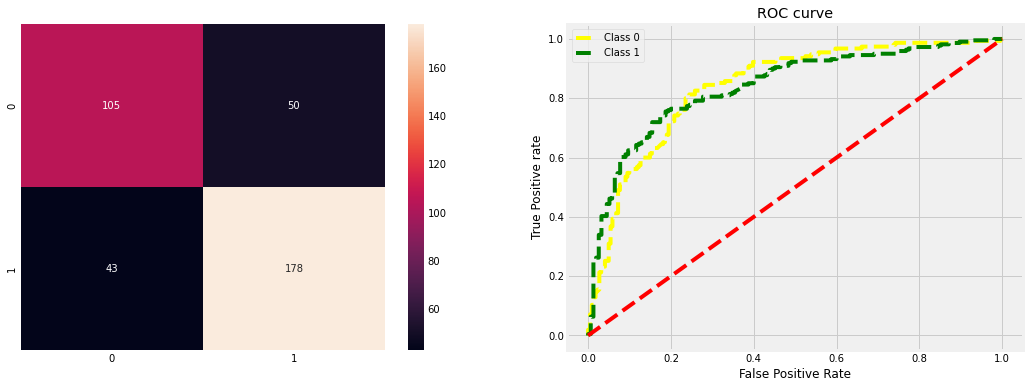

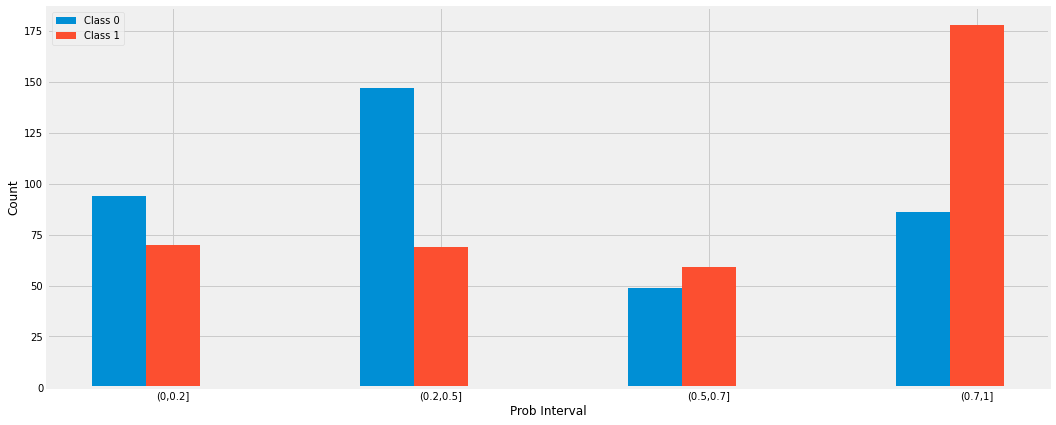

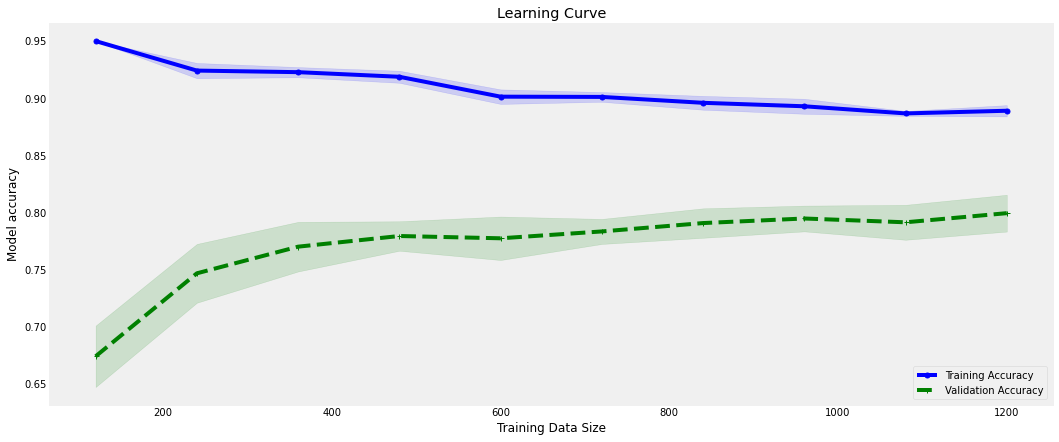

In [171]:
#SVM with randomized perameters
svm_model=SVCModel(X_train,y_train,X_test,y_test,svm_ran_params)
y_pred_prob = svm_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,svm_model)
LearningCurve_(svm_model, X_train, y_train)
#save the model to disk
filename = './models/SVM_randomized.sav'
pickle.dump(svm_model, open(filename, 'wb'))

Accuracy:0.8
Precision:0.80
Recall:0.80
F1-Score:0.79
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       155
           1       0.80      0.87      0.83       221

    accuracy                           0.80       376
   macro avg       0.79      0.78      0.78       376
weighted avg       0.79      0.80      0.79       376



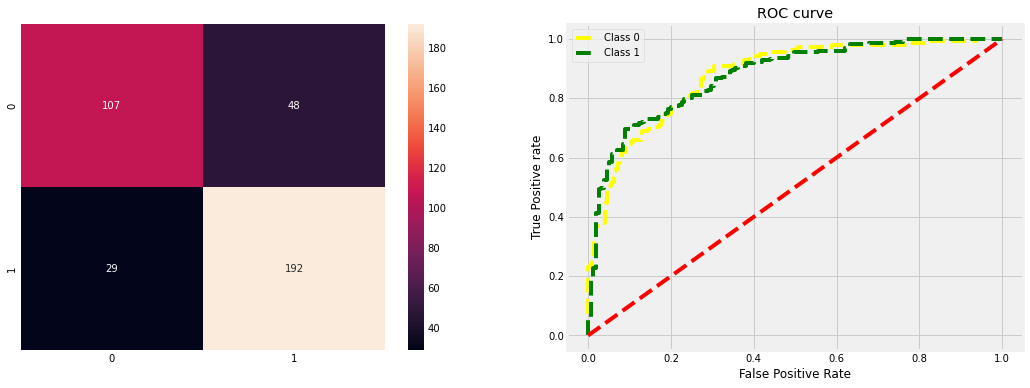

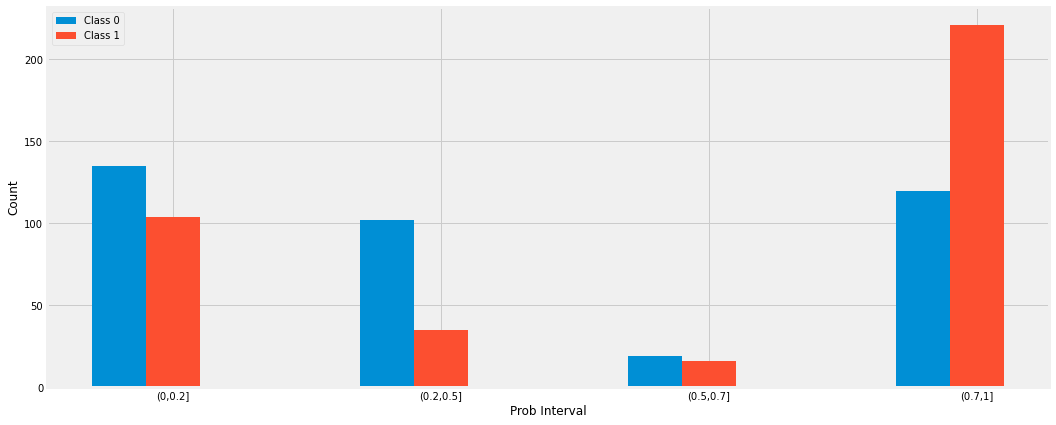

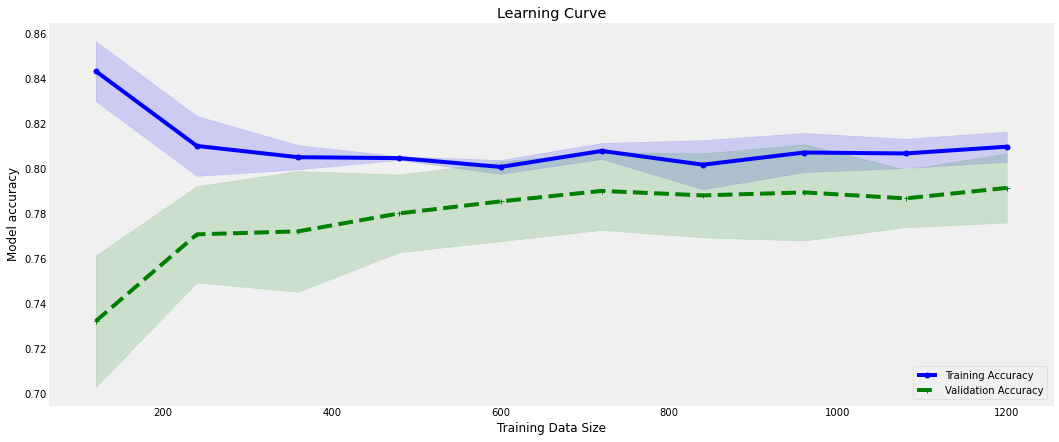

In [172]:
#SVM with hyper perameters
svm_model=SVCModel(X_train,y_train,X_test,y_test,svm_hyper)
y_pred_prob = svm_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,svm_model)
LearningCurve_(svm_model, X_train, y_train)
#save the model to disk
filename = './models/SVM_hyper.sav'
pickle.dump(svm_model, open(filename, 'wb'))

## ***Model 8. Random Forest***

In [173]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='RandomForestClassifier']
LR_DF['Dataset Variation']

5    'label','minmax','under','rfcv'
Name: Dataset Variation, dtype: object

In [175]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=RandomForestClassifier()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','minmax','under','rfcv',7,DROP_COLUMN,model)

In [176]:
features_df_new

Rank
City                          1
EducationLevel                1
JoiningDesignation            1
TotalBusinessValue            1
QuarterlyRating               1
TotalBusinessValue_change     1
Retention_years               1
YearsOfExperience             1

#### ***Hyperperameters for Random Forest***

In [431]:
# # Randomized search 
# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# randomforest_rm = RandomForestClassifier(random_state=12)

# criterion=["gini", "entropy"]
# max_features=["auto", "sqrt", "log2"]
# max_depth=list(range(1,20))
# n_estimators=list(range(10,100))
# min_samples_leaf=list(range(1,20))
# max_leaf_nodes=list(range(1,20))
# min_samples_split=list(range(2,5))
# param_grid = dict(
#                  criterion=criterion,
#                  max_depth=max_depth,
#                  max_features=max_features,
#                  min_samples_leaf=min_samples_leaf,
#                  max_leaf_nodes=max_leaf_nodes,
#                  )

# # instantiate the grid
# random_dt = GridSearchCV(randomforest_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# # fit the grid with data
# random_dt.fit(X_train, y_train)

# print('Best criterion:', random_dt.best_estimator_.get_params()['criterion'])
# print('Best max_depth:', random_dt.best_estimator_.get_params()['max_depth'])
# print('Best max_features:', random_dt.best_estimator_.get_params()['max_features'])
# print('Best max_leaf_nodes:', random_dt.best_estimator_.get_params()['max_leaf_nodes'])
# print('Best Accuracy Score:',random_dt.best_score_)
# print()
# rm_params=random_dt.best_estimator_.get_params()
# print(rm_params)

In [441]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
randomforest_rm = RandomForestClassifier()

criterion=["gini", "entropy"]
max_features=["auto", "sqrt", "log2"]
max_depth=list(range(1,20))
n_estimators=list(range(10,100))
min_samples_leaf=list(range(1,20))
random_state=list(range(1,50))
max_leaf_nodes=list(range(1,20))
ccp_alpha=list(np.arange(1e-03, 2, 0.01))
min_samples_split=list(range(2,5))
param_grid = dict(
                 criterion=criterion,
                 max_depth=max_depth,
                 max_features=max_features,
                 #min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf,
                 random_state=random_state,
                 max_leaf_nodes=max_leaf_nodes,
                 ccp_alpha=ccp_alpha,
                 min_samples_split=min_samples_split
                 )

# instantiate the grid
random_dt = RandomizedSearchCV(randomforest_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
random_dt.fit(X_train, y_train)

print('Best criterion:', random_dt.best_estimator_.get_params()['criterion'])
print('Best max_depth:', random_dt.best_estimator_.get_params()['max_depth'])
print('Best max_features:', random_dt.best_estimator_.get_params()['max_features'])
print('Best min_samples_split:', random_dt.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', random_dt.best_estimator_.get_params()['min_samples_leaf'])
print('Best random_state:', random_dt.best_estimator_.get_params()['random_state'])
print('Best max_leaf_nodes:', random_dt.best_estimator_.get_params()['max_leaf_nodes'])
print('Best Accuracy Score:',random_dt.best_score_)
print()
rm_params=random_dt.best_estimator_.get_params()
print(rm_params)

Best criterion: entropy
Best max_depth: 14
Best max_features: log2
Best min_samples_split: 3
Best min_samples_leaf: 17
Best random_state: 35
Best max_leaf_nodes: 12
Best Accuracy Score: 0.8366666666666667

{'bootstrap': True, 'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2', 'max_leaf_nodes': 12, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 17, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 35, 'verbose': 0, 'warm_start': False}


In [180]:
rm_params_1={'bootstrap': True, 'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 17, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 13, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 8, 'verbose': 0, 'warm_start': False}

In [178]:
#Random Forest
def RandomForestModel(X_train,y_train,X_test,y_test,params):
    from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
    randomforest=RandomForestClassifier(**params)
    model=randomforest.fit(X_train,y_train)
    
    y_pr=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pr)
    
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr))
    print('Recall:%.2f'%recall_score(y_test, y_pr))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr))
    report=classification_report(y_test,y_pr)
    print(report)
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.heatmap(cm,annot=True,fmt='d')
    
    # plot ROC AUC curve
    plt.subplot(1,2,2)
    RocAucPlot(model,X_test,y_test)
    return model

Accuracy:0.84
Precision:0.86
Recall:0.86
F1-Score:0.86
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       155
           1       0.86      0.86      0.86       221

    accuracy                           0.84       376
   macro avg       0.84      0.84      0.84       376
weighted avg       0.84      0.84      0.84       376



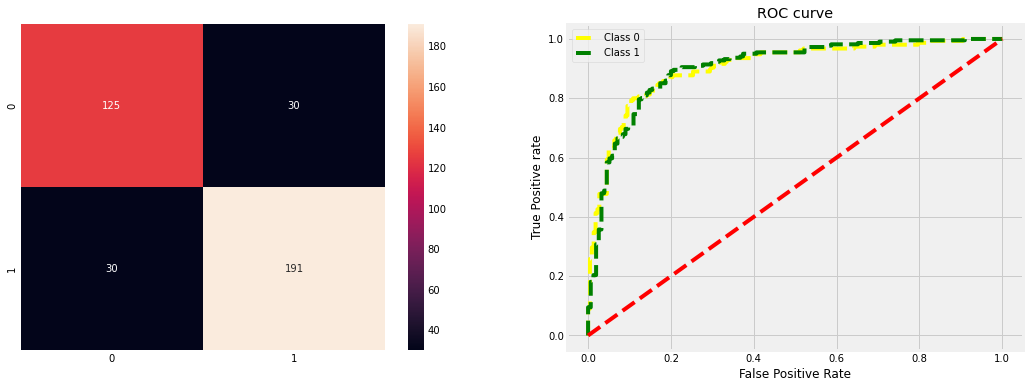

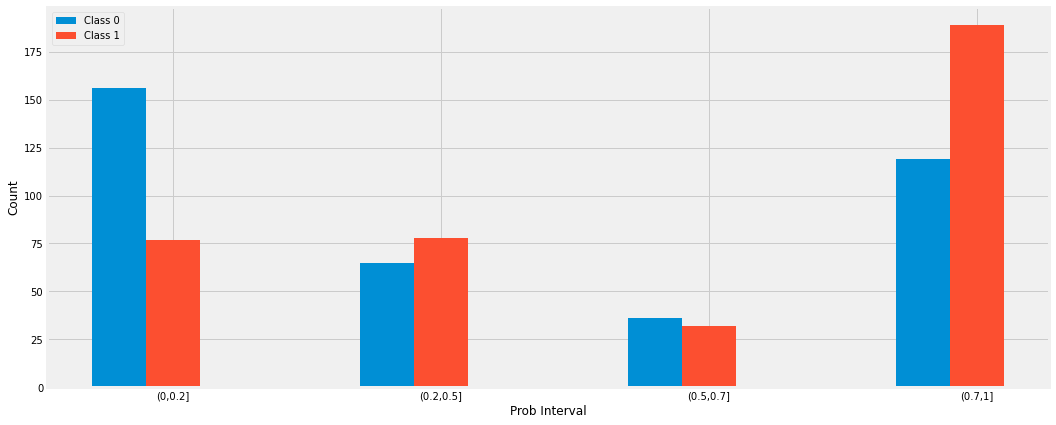

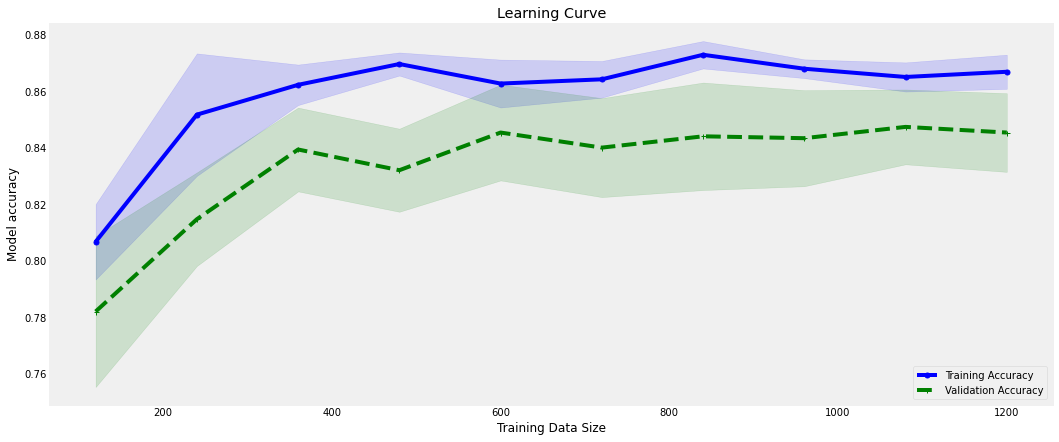

In [181]:
#save the model to disk
randomforst_model=RandomForestModel(X_train,y_train,X_test,y_test,rm_params_1)
y_pred_prob = randomforst_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,randomforst_model)
LearningCurve_(randomforst_model, X_train, y_train)

filename = './models/KNeighborsClassifiert_hyper.sav'
pickle.dump(randomforst_model, open(filename, 'wb'))

## ***Model 9. GradientBoostingClassifier***

In [182]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='GradientBoostingClassifier']
LR_DF['Dataset Variation']

3    'one-hot','standard','under','rfcv'
Name: Dataset Variation, dtype: object

In [184]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=GradientBoostingClassifier()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'one-hot','standarf','under','rfcv',7,DROP_COLUMN,model)

In [185]:
features_df_new

Rank
City                          1
JoiningDesignation            1
TotalBusinessValue            1
QuarterlyRating               1
TotalBusinessValue_change     1
QuarterlyRating_change        1
Retention_years               1

#### ***Hyperperameters for GradientBoostingClassifier***

In [449]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
grad_rm = GradientBoostingClassifier()

criterion=['friedman_mse', 'squared_error', 'mse', 'mae']
loss=['deviance', 'exponential']
max_depth=list(range(1,20))
n_estimators=list(range(100,1000))
min_samples_leaf=list(range(1,20))
random_state=list(range(1,50))
max_leaf_nodes=list(range(1,20))
learning_rate=list(np.arange(1e-03, 2, 0.01))
#min_samples_split=list(range(1,50))
param_grid = dict(
                 criterion=criterion,
                 max_depth=max_depth,
                 loss=loss,
                 #min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf,
                 random_state=random_state,
                 max_leaf_nodes=max_leaf_nodes,
                 learning_rate=learning_rate
                 )

# instantiate the grid
grad_dt = RandomizedSearchCV(grad_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
grad_dt.fit(X_train, y_train)

print('Best learning_rate:', grad_dt.best_estimator_.get_params()['learning_rate'])
print('Best max_depth:', grad_dt.best_estimator_.get_params()['max_depth'])
print('Best loss:', grad_dt.best_estimator_.get_params()['loss'])
print('Best criterion:', grad_dt.best_estimator_.get_params()['criterion'])
print('Best min_samples_leaf:', grad_dt.best_estimator_.get_params()['min_samples_leaf'])
print('Best random_state:', grad_dt.best_estimator_.get_params()['random_state'])
print('Best max_leaf_nodes:', grad_dt.best_estimator_.get_params()['max_leaf_nodes'])
print('Best Accuracy Score:',grad_dt.best_score_)
print()
grad_params=grad_dt.best_estimator_.get_params()
print(grad_params)

Best learning_rate: 0.4709999999999999
Best max_depth: 2
Best loss: exponential
Best criterion: mse
Best min_samples_leaf: 3
Best random_state: 16
Best max_leaf_nodes: 14
Best Accuracy Score: 0.8640000000000001

{'ccp_alpha': 0.0, 'criterion': 'mse', 'init': None, 'learning_rate': 0.4709999999999999, 'loss': 'exponential', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 14, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 16, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [186]:
grad_params_1={'ccp_alpha': 0.0, 'criterion': 'mse', 'init': None, 'learning_rate': 0.36099999999999993, 'loss': 'exponential', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 41, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

In [ ]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
grad_rm = GradientBoostingClassifier()

criterion=['friedman_mse', 'squared_error', 'mse', 'mae']
loss=['deviance', 'exponential']
max_depth=list(range(1,20))
n_estimators=list(range(100,1000))
min_samples_leaf=list(range(1,20))
random_state=list(range(1,50))
max_leaf_nodes=list(range(1,20))
learning_rate=list(np.arange(1e-03, 2, 0.01))
param_grid = dict(
                 criterion=criterion,
                 max_depth=max_depth,
                 loss=loss,
                 min_samples_leaf=min_samples_leaf,
                 random_state=random_state,
                 max_leaf_nodes=max_leaf_nodes,
                 learning_rate=learning_rate
                 )

# instantiate the grid
grad_dt_grid = GridSearchCV(grad_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1)
# fit the grid with data
grad_dt_grid.fit(X_train, y_train)

print('Best learning_rate:', grad_dt_grid.best_estimator_.get_params()['learning_rate'])
print('Best max_depth:', grad_dt_grid.best_estimator_.get_params()['max_depth'])
print('Best loss:', grad_dt_grid.best_estimator_.get_params()['loss'])
print('Best criterion:', grad_dt_grid.best_estimator_.get_params()['criterion'])
print('Best min_samples_leaf:', grad_dt_grid.best_estimator_.get_params()['min_samples_leaf'])
print('Best random_state:', grad_dt_grid.best_estimator_.get_params()['random_state'])
print('Best max_leaf_nodes:', grad_dt_grid.best_estimator_.get_params()['max_leaf_nodes'])
print('Best Accuracy Score:',grad_dt_grid.best_score_)
print()
grad_grid_params=grad_dt_grid.best_estimator_.get_params()
print(grad_grid_params)

### ***GradientBoostingClassifier***

Accuracy:0.85
Precision:0.89
Recall:0.86
F1-Score:0.87
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       155
           1       0.89      0.86      0.87       221

    accuracy                           0.85       376
   macro avg       0.85      0.85      0.85       376
weighted avg       0.86      0.85      0.85       376



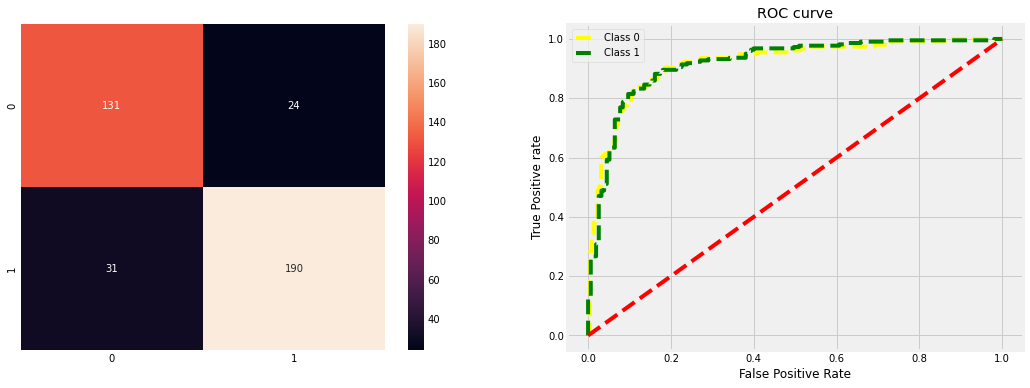

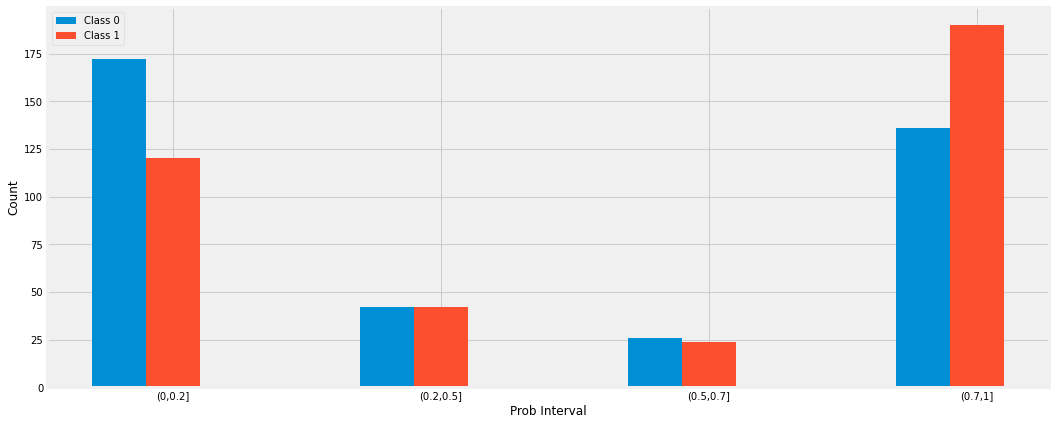

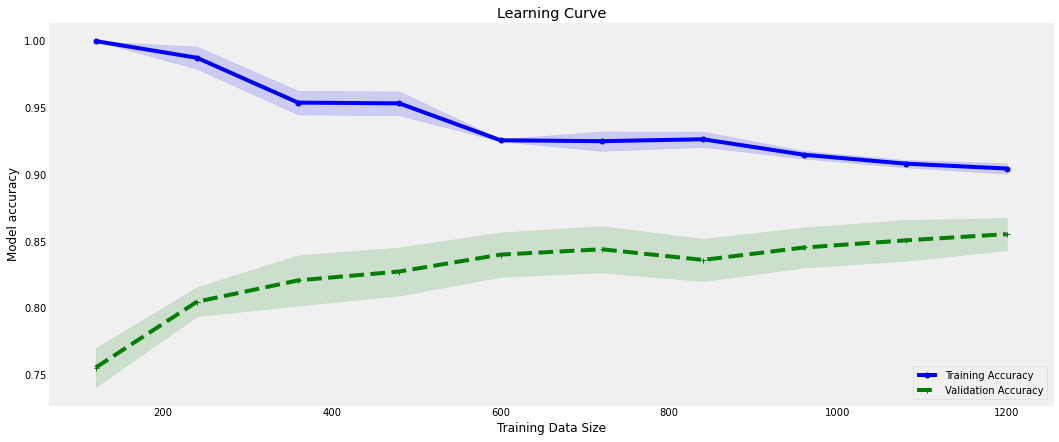

In [188]:
#GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
gradient_model=GradientBoostingClassifier(**grad_params_1)
gradient_model.fit(X_train,y_train)

y_pr=gradient_model.predict(X_test)
cm=confusion_matrix(y_test,y_pr)

print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr))
print('Recall:%.2f'%recall_score(y_test, y_pr))
print('F1-Score:%.2f'%f1_score(y_test, y_pr))
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(cm,annot=True,fmt='d')

# plot ROC AUC curve
plt.subplot(1,2,2)
RocAucPlot(gradient_model,X_test,y_test)

y_pred_prob = gradient_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,gradient_model)
LearningCurve_(gradient_model, X_train, y_train)

filename = './models/GradientBoostingClassifier_grad.sav'
pickle.dump(gradient_model, open(filename, 'wb'))

## **Model 10. AdaBosstClassifier**

In [191]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='AdaBoostClassifier']
LR_DF['Dataset Variation']

4    'label','standard','under','rfcv'
Name: Dataset Variation, dtype: object

In [192]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=AdaBoostClassifier()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','standarf','under','rfcv',7,DROP_COLUMN,model)

In [193]:
features_df_new

Rank
City                          1
Designation                   1
TotalBusinessValue            1
QuarterlyRating               1
TotalBusinessValue_change     1
QuarterlyRating_change        1
Promotion                     1
BinnedAge                     1
Retention_years               1

#### ***Hyperperameters for AdaBoostClassifier***

In [ ]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
ada_rm = AdaBoostClassifier()

algorithm =['SAMME', 'SAMME.R']
n_estimators=list(range(10,1000))
random_state=list(range(1,50))
learning_rate=list(np.arange(1e-03, 2, 0.01))
#min_samples_split=list(range(1,50))
param_grid = dict(
                 algorithm=algorithm,
                 n_estimators=n_estimators,
                 random_state=random_state,
                 learning_rate=learning_rate
                 )

# instantiate the grid
ada_dt = RandomizedSearchCV(ada_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
ada_dt.fit(X_train, y_train)

print('Best algorithm:', ada_dt.best_estimator_.get_params()['algorithm'])
print('Best n_estimators:', ada_dt.best_estimator_.get_params()['n_estimators'])
print('Best random_state:', ada_dt.best_estimator_.get_params()['random_state'])
print('Best learning_rate:', ada_dt.best_estimator_.get_params()['learning_rate'])
print('Best Accuracy Score:',ada_dt.best_score_)
print()
ada_params=ada_dt.best_estimator_.get_params()
print(ada_params)

In [194]:
ada_params={'algorithm': 'SAMME', 'base_estimator': None, 'learning_rate': 1.2609999999999997, 'n_estimators': 949, 'random_state': 39}

### ***AdaBoostClassifier***

Accuracy:0.85
Precision:0.87
Recall:0.88
F1-Score:0.87
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       155
           1       0.87      0.88      0.87       221

    accuracy                           0.85       376
   macro avg       0.85      0.85      0.85       376
weighted avg       0.85      0.85      0.85       376



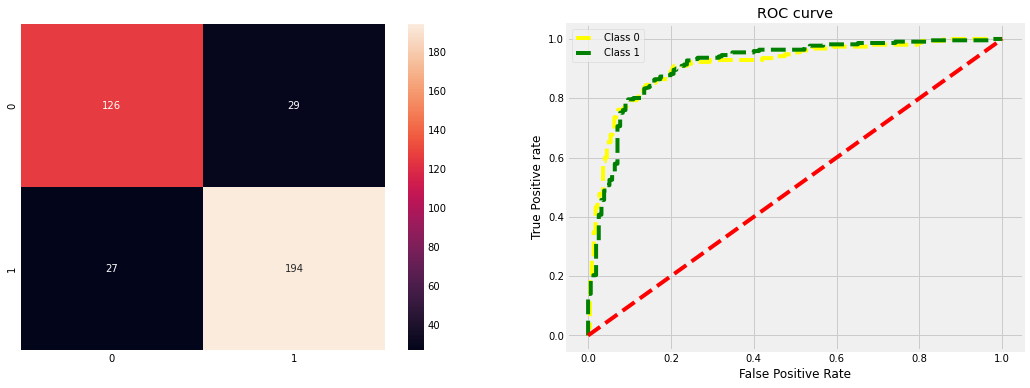

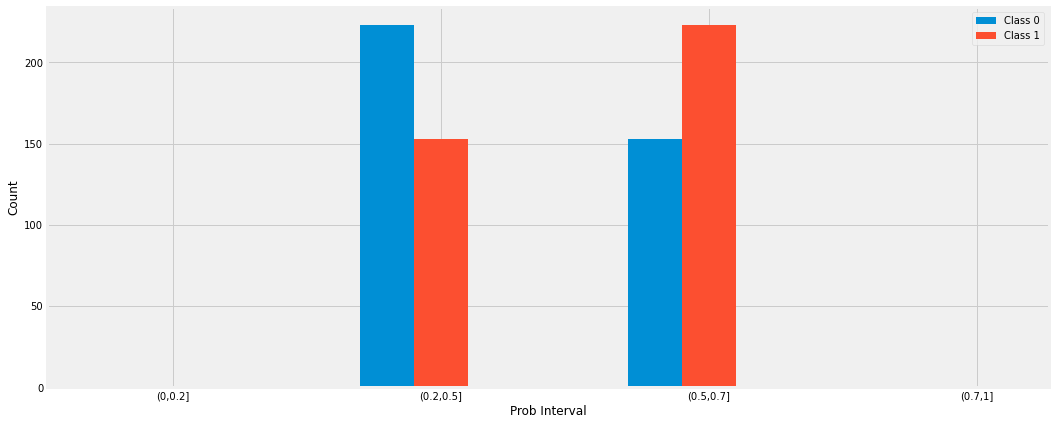

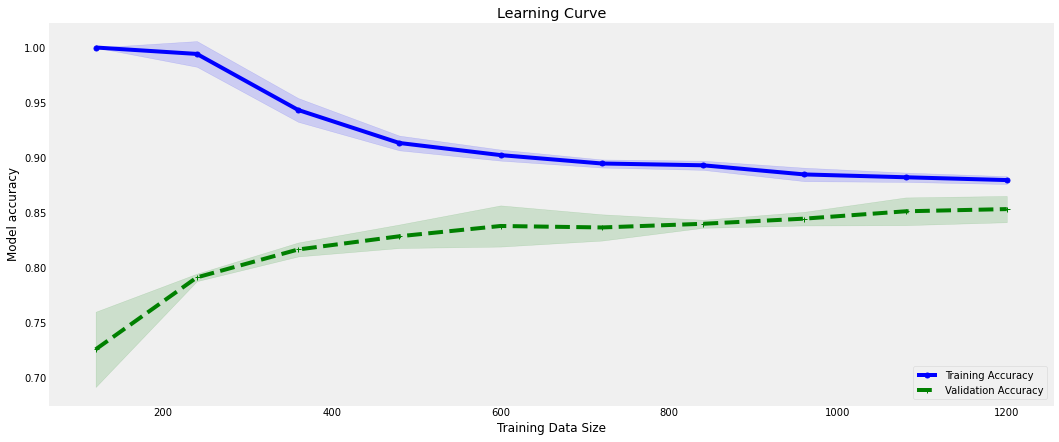

In [195]:
#AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
adboost_model=AdaBoostClassifier(**ada_params)
adboost_model.fit(X_train,y_train)

y_pr=adboost_model.predict(X_test)
cm=confusion_matrix(y_test,y_pr)

print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr))
print('Recall:%.2f'%recall_score(y_test, y_pr))
print('F1-Score:%.2f'%f1_score(y_test, y_pr))
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(cm,annot=True,fmt='d')

# plot ROC AUC curve
plt.subplot(1,2,2)
RocAucPlot(adboost_model,X_test,y_test)

y_pred_prob = adboost_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,adboost_model)
LearningCurve_(adboost_model, X_train, y_train)

filename = './models/AdaBoostClassifier_grad.sav'
pickle.dump(adboost_model, open(filename, 'wb'))

## ***Model 11. AdaBosstClassifier***

Accuracy:0.78
Precision:0.79
Recall:0.84
F1-Score:0.81
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       155
           1       0.79      0.84      0.81       221

    accuracy                           0.78       376
   macro avg       0.77      0.76      0.77       376
weighted avg       0.78      0.78      0.78       376



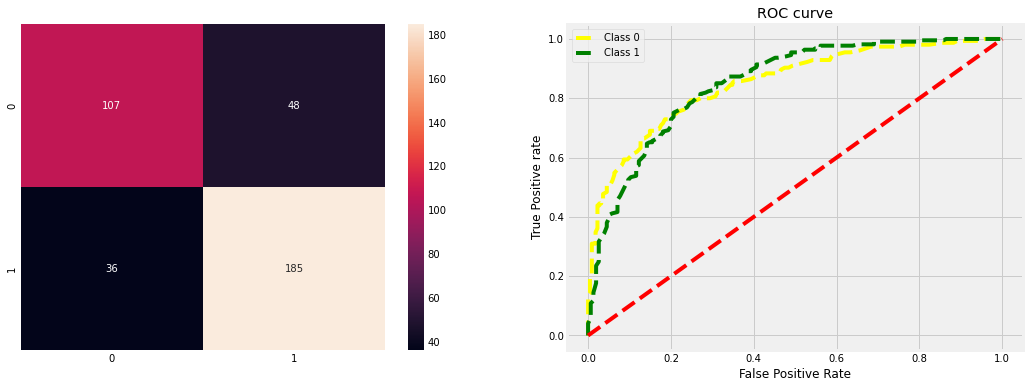

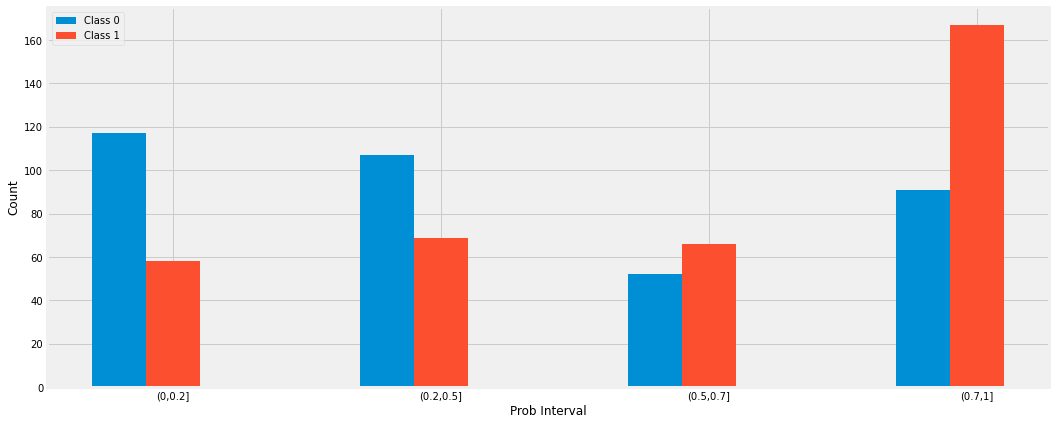

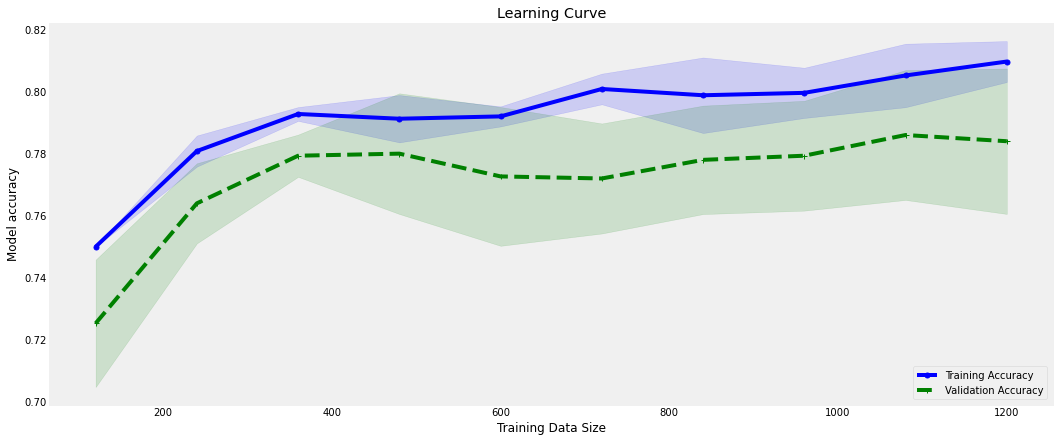

In [197]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
base_knn=KNeighborsClassifier(algorithm='auto',metric='manhattan',n_neighbors=16)
bagging_model = BaggingClassifier(base_estimator=base_knn,random_state=12)
bagging_model.fit(X_train,y_train)

y_pr=bagging_model.predict(X_test)
cm=confusion_matrix(y_test,y_pr)

print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr))
print('Recall:%.2f'%recall_score(y_test, y_pr))
print('F1-Score:%.2f'%f1_score(y_test, y_pr))
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(cm,annot=True,fmt='d')

# plot ROC AUC curve
plt.subplot(1,2,2)
RocAucPlot(bagging_model,X_test,y_test)

y_pred_prob = bagging_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,bagging_model)
LearningCurve_(bagging_model, X_train, y_train)

filename = './models/BaggingClassifier.sav'
pickle.dump(bagging_model, open(filename, 'wb'))

## ***Model 11. Voting Classifier***

Accuracy:0.86
Precision:0.87
Recall:0.89
F1-Score:0.88
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       155
           1       0.87      0.89      0.88       221

    accuracy                           0.86       376
   macro avg       0.86      0.85      0.85       376
weighted avg       0.86      0.86      0.86       376



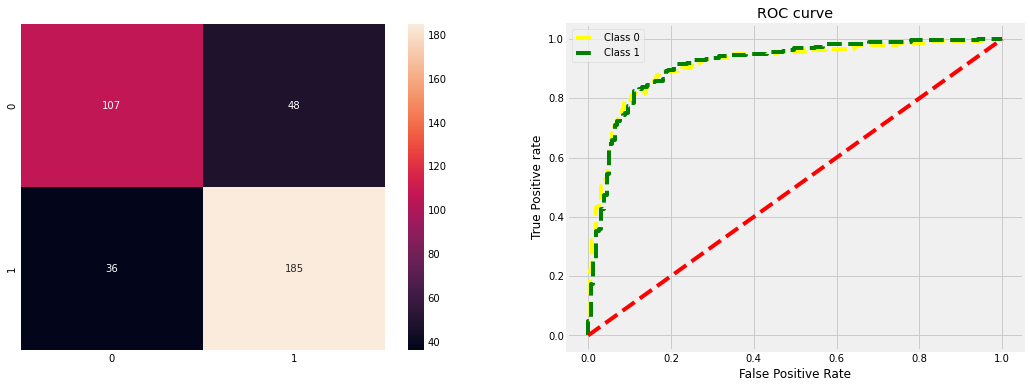

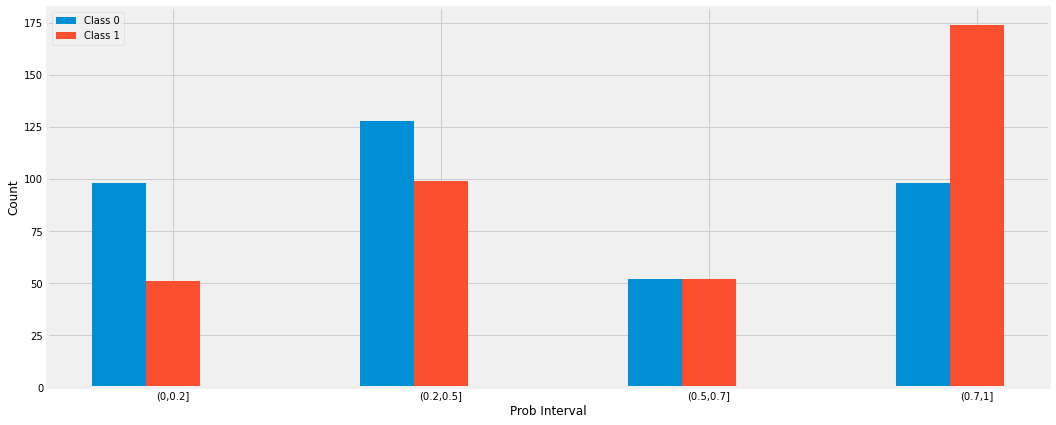

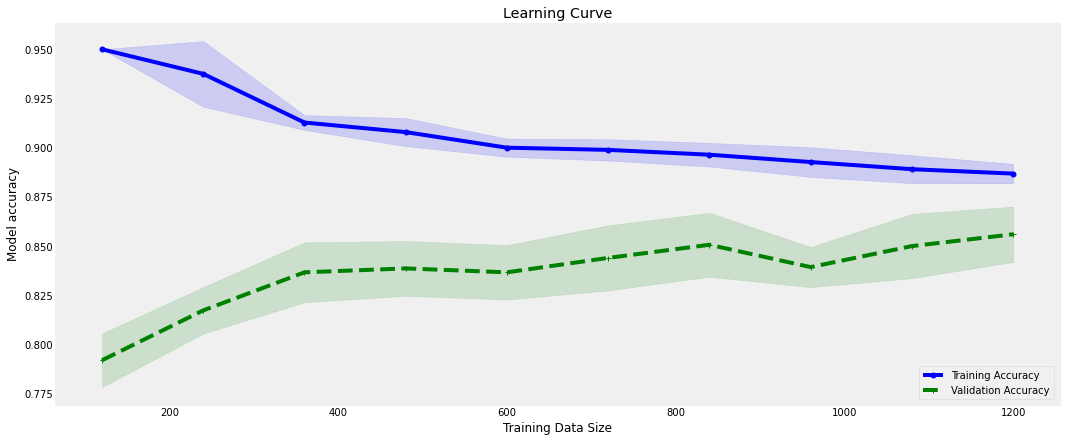

0.8560000000000001


In [199]:
#voting classifier
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = GradientBoostingClassifier(**grad_params_1) #GradientBoostingClassifier
estimators.append(('logistic', model1))

model2 = AdaBoostClassifier(**ada_params) #AdaBoostClassifier
estimators.append(('cart', model2))

model3 = RandomForestClassifier(**rm_params_1) #RandomForestClassifier
estimators.append(('svm', model3))

model4 = KNeighborsClassifier(algorithm='brute',metric='manhattan',n_neighbors=33) #KNeighborsClassifier
estimators.append(('knn', model4))

model5 = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=12) #DecisionTreeClassifier
estimators.append(('Decision', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators,voting='soft')
ensemble.fit(X_train,y_train)
y_pr=ensemble.predict(X_test)

print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr))
print('Recall:%.2f'%recall_score(y_test, y_pr))
print('F1-Score:%.2f'%f1_score(y_test, y_pr))
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(cm,annot=True,fmt='d')

# plot ROC AUC curve
plt.subplot(1,2,2)
RocAucPlot(ensemble,X_test,y_test)

y_pred_prob = ensemble.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,ensemble)
LearningCurve_(ensemble, X_train, y_train)

results = cross_val_score(ensemble, X_train, y_train, cv=5)
print(results.mean())

filename = './models/VotingClassifier.sav'
pickle.dump(ensemble, open(filename, 'wb'))

In [ ]:
base_df=Preprocess('./','new_train.csv')

## ***Model 12. CatBoostClassifier***

In [206]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='CatBoostClassifier']
LR_DF['Dataset Variation']

6    'one-hot','standard','under','rfcv'
Name: Dataset Variation, dtype: object

In [207]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=RandomForestClassifier()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'one-hot','standarf','under','rfcv',7,DROP_COLUMN,model)

In [208]:
features_df_new

Rank
City                          1
JoiningDesignation            1
Designation                   1
TotalBusinessValue            1
QuarterlyRating               1
TotalBusinessValue_change     1
Retention_years               1
YearsOfExperience             1
Female                        1

In [ ]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
cat_features=X.select_dtypes(include=["category"]).columns.tolist()
cat_rm = CatBoostClassifier(cat_features=cat_features)


depth=list(range(1,20))
iterations=list(range(1,50))
learning_rate=list(np.arange(1e-03, 2, 0.01))
feature_border_type=['Median','Uniform','UniformAndQuantiles','GreedyLogSum','MaxLogSum','MinEntropy']
leaf_estimation_method =['Newton','Gradient']
boosting_type=['Ordered','Plain']
grow_policy =['SymmetricTree','Lossguide,Depthwise']
random_state=list(range(1,50))

param_grid = dict(
                 depth=depth,
                 iterations=iterations,
                 learning_rate=learning_rate,
                 feature_border_type=feature_border_type,
                 leaf_estimation_method=leaf_estimation_method,
                 random_state=random_state,
                 boosting_type=boosting_type,
                 grow_policy=grow_policy
                 )

# instantiate the grid
grad_cat = RandomizedSearchCV(cat_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
grad_cat.fit(x_train, y_train)

print('Best depth:', grad_cat.best_estimator_.get_params()['depth'])
print('Best iterations:', grad_cat.best_estimator_.get_params()['iterations'])
print('Best learning_rate:', grad_cat.best_estimator_.get_params()['learning_rate'])
print('Best feature_border_type:', grad_cat.best_estimator_.get_params()['feature_border_type'])
print('Best leaf_estimation_method:', grad_cat.best_estimator_.get_params()['leaf_estimation_method'])
print('Best random_state:', grad_cat.best_estimator_.get_params()['random_state'])
print('Best boosting_type:', grad_cat.best_estimator_.get_params()['boosting_type'])
print('Best grow_policy:', grad_cat.best_estimator_.get_params()['grow_policy'])
print('Best Accuracy Score:',grad_cat.best_score_)
print()
cat_params=grad_cat.best_estimator_.get_params()
print(cat_params)

In [243]:
cat_params={'iterations': 34, 'learning_rate': 0.05, 'depth': 3, 'feature_border_type': 'UniformAndQuantiles', 'leaf_estimation_method': 'Gradient', 'boosting_type': 'Plain','verbose':0}

In [ ]:
# Randomized search 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
cat_features=X.select_dtypes(include=["category"]).columns.tolist()
cat_rm = CatBoostClassifier(cat_features=cat_features)


depth=list(range(1,20))
iterations=list(range(1,50))
learning_rate=list(np.arange(1e-03, 2, 0.01))
leaf_estimation_method =['Newton','Gradient']
boosting_type=['Ordered','Plain']
random_state=list(range(1,50))

param_grid = dict(
                 depth=depth,
                 iterations=iterations,
                 learning_rate=learning_rate,
                 leaf_estimation_method=leaf_estimation_method,
                 random_state=random_state,
                 boosting_type=boosting_type,
                 )

# instantiate the grid
grad_cat = GridSearchCV(cat_rm, param_grid,scoring='accuracy',cv=10,return_train_score=True,n_jobs=-1,n_iter=100)
# fit the grid with data
grad_cat.fit(X_train, y_train)

print('Best depth:', grad_cat.best_estimator_.get_params()['depth'])
print('Best iterations:', grad_cat.best_estimator_.get_params()['iterations'])
print('Best learning_rate:', grad_cat.best_estimator_.get_params()['learning_rate'])
print('Best leaf_estimation_method:', grad_cat.best_estimator_.get_params()['leaf_estimation_method'])
print('Best random_state:', grad_cat.best_estimator_.get_params()['random_state'])
print('Best boosting_type:', grad_cat.best_estimator_.get_params()['boosting_type'])
print('Best Accuracy Score:',grad_cat.best_score_)
print()
cat_grid_params=grad_cat.best_estimator_.get_params()
print(cat_grid_params)

Accuracy:0.81
Precision:0.84
Recall:0.82
F1-Score:0.83
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       155
           1       0.84      0.82      0.83       221

    accuracy                           0.81       376
   macro avg       0.80      0.80      0.80       376
weighted avg       0.81      0.81      0.81       376



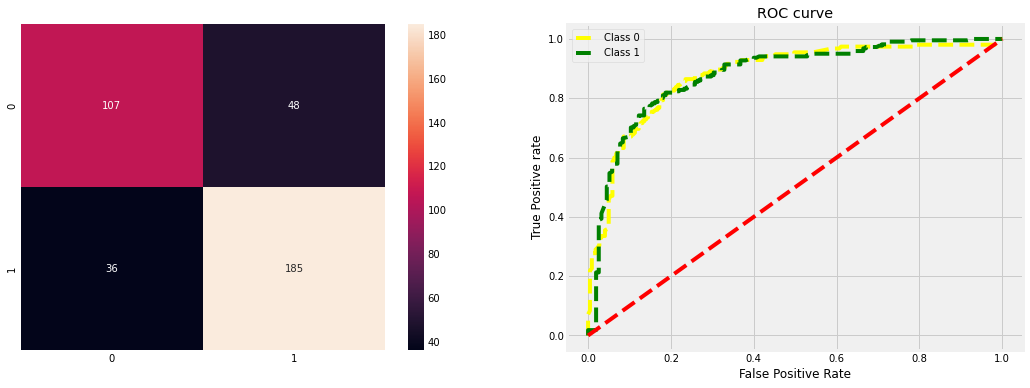

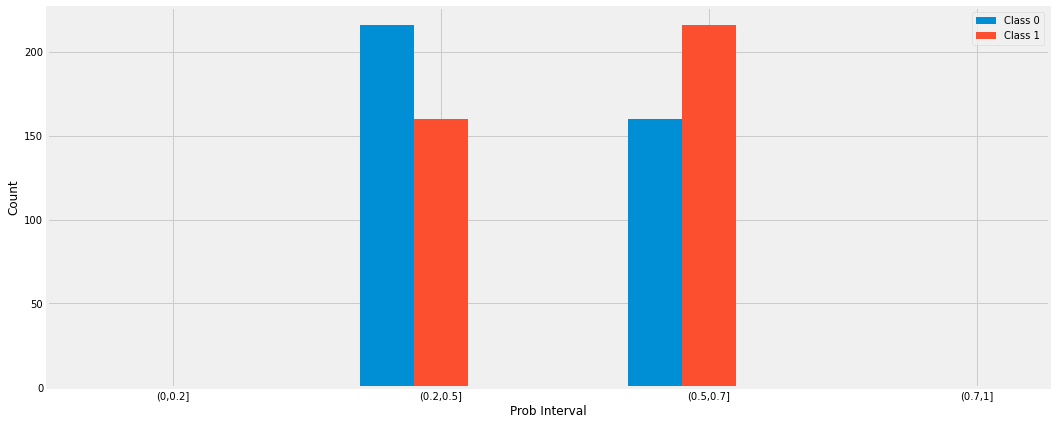

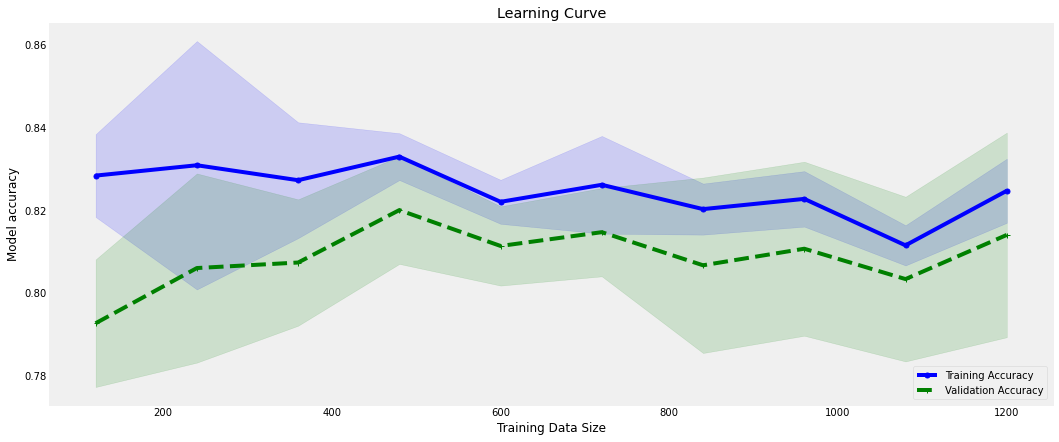

0.8140000000000001


In [212]:
import catboost as cb
from catboost import CatBoostClassifier

cat_features=X_train.select_dtypes(include=["category"]).columns.tolist()
cat_model = CatBoostClassifier(**cat_params,cat_features=cat_features,random_state=43)
cat_model.fit(X_train, y_train,verbose=False)
y_pr = cat_model.predict(X_test)

print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr))
print('Recall:%.2f'%recall_score(y_test, y_pr))
print('F1-Score:%.2f'%f1_score(y_test, y_pr))
report=classification_report(y_test,y_pr)
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(cm,annot=True,fmt='d')

# plot ROC AUC curve
plt.subplot(1,2,2)
RocAucPlot(cat_model,X_test,y_test)

y_pred_prob = cat_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,cat_model)
LearningCurve_(cat_model, X_train, y_train)
results = cross_val_score(cat_model, X_train, y_train, cv=5)
print(results.mean())

filename = './models/CatBoostClassifier.sav'
pickle.dump(cat_model, open(filename, 'wb'))

## ***Model 13. XGBClassifier***

In [239]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=DecisionTreeClassifier()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','standar','under','rfcv',7,DROP_COLUMN,model)

In [240]:
features_df_new

Rank
Gender                        1
City                          1
EducationLevel                1
JoiningDesignation            1
TotalBusinessValue            1
QuarterlyRating               1
TotalBusinessValue_change     1
Retention_years               1

Accuracy:0.84
Precision:0.87
Recall:0.86
F1-Score:0.86
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       155
           1       0.87      0.86      0.86       221

    accuracy                           0.84       376
   macro avg       0.83      0.84      0.84       376
weighted avg       0.84      0.84      0.84       376



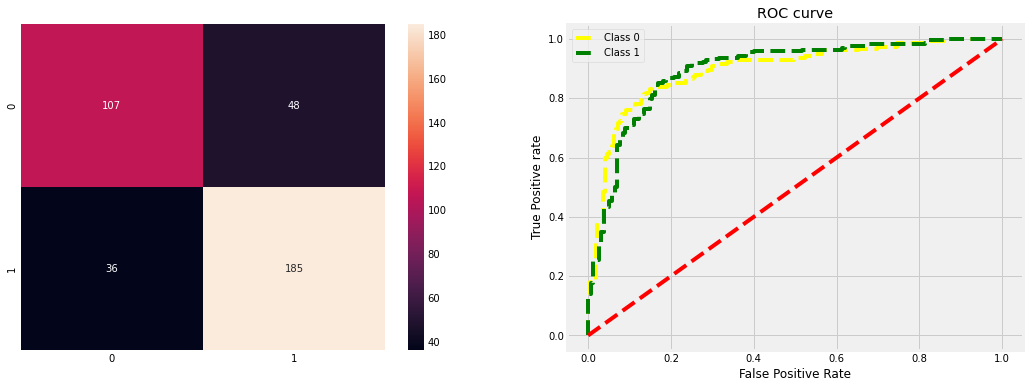

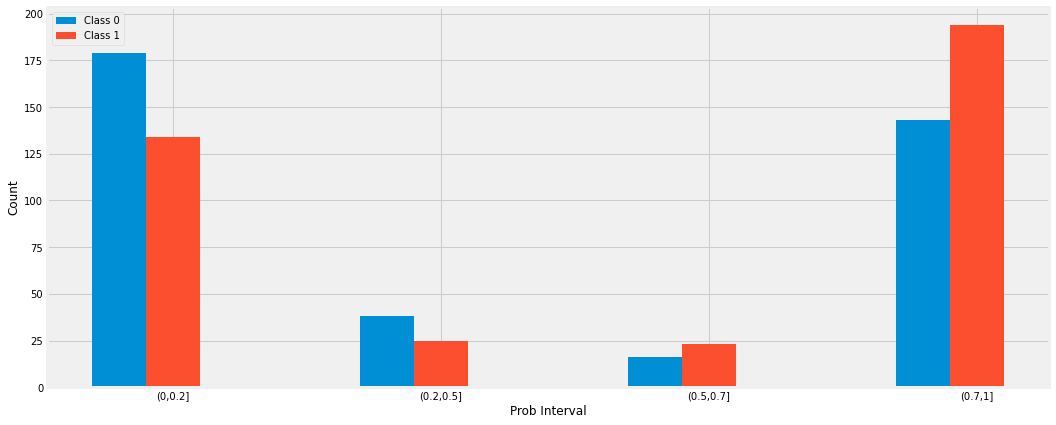

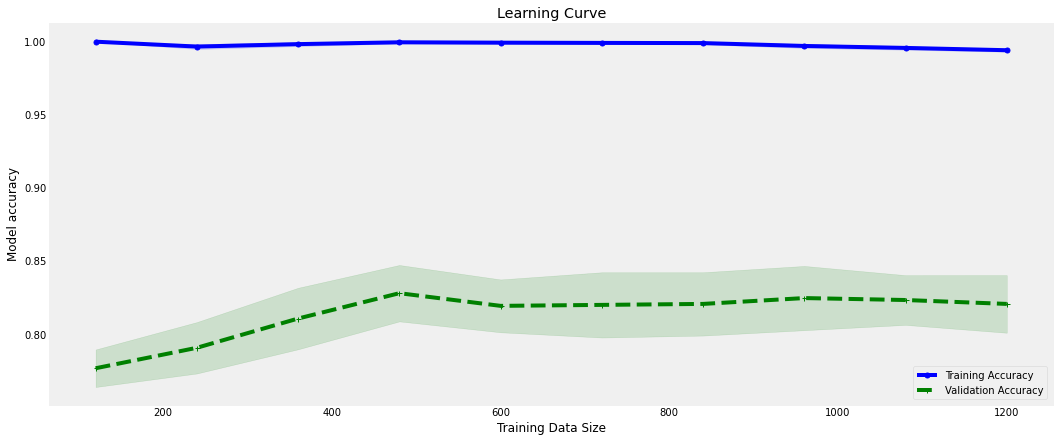

0.8206666666666667


In [241]:
# xgboost for classification
from xgboost import XGBClassifier
from matplotlib import pyplot

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pr = xgb_model.predict(X_test)

print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr))
print('Recall:%.2f'%recall_score(y_test, y_pr))
print('F1-Score:%.2f'%f1_score(y_test, y_pr))
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(cm,annot=True,fmt='d')

# plot ROC AUC curve
plt.subplot(1,2,2)
RocAucPlot(xgb_model,X_test,y_test)

y_pred_prob = xgb_model.predict_proba(X_test)   

PlotProbIntervals(y_pred_prob,xgb_model)
LearningCurve_(xgb_model, X_train, y_train)

results = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(results.mean())

filename = './models/XGBClassifier.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

### ***Final Model Building***

In [242]:
testing_df=Preprocess('./','new_train.csv')

File: new_train.csv
Loading CSV file...

Change in Value Column added..
Change in Value Column added..
Change in Value Column added..
Change in Value Column added..

Resign,Hike and Promotion column added,..
intervals in  Salary
: [(69970.667, 129194.333], (10569.329, 69970.667], (129194.333, 188418.0]]
Categories (3, interval[float64, right]): [(10569.329, 69970.667] < (69970.667, 129194.333] < (129194.333, 188418.0]]
BinnedSalary column added,..
intervals in  Age
: [(33.333, 45.667], (20.963, 33.333], (45.667, 58.0]]
Categories (3, interval[float64, right]): [(20.963, 33.333] < (33.333, 45.667] < (45.667, 58.0]]
BinnedAge column added,..



Before Removing the duplicates:19074
Removing the Duplicate
After Removing the duplicates:2376

No. of Cases where Date of Joining is later than Last Working Date: 60
No. of cases where employees have got more than 1 promotion per year:  40
Max no. of promotions per year:  33.333333333333336



In [ ]:
# label encoding,standard scalling and undersamplling
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','standard','under','rfcv',10)

In [245]:
# saving our final models
import pickle
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
from xgboost import XGBClassifier

# models = []
# models.append(('Logistic Regression', LogisticRegression()))
# models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('RandomForestClassifier', RandomForestClassifier()))
# models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
# models.append(('AdaBoostClassifier', AdaBoostClassifier()))
# models.append(('XGBClassifier', CatBoostClassifier()))
# models.append(('XGBClassifier', VotingClassifier()))
# models.append(('XGBClassifier', XGBClassifier()))


knn_hyper_peram={'algorithm':'brute','metric':'manhattan','n_neighbors':33} #KNeighborsClassifier
dt_hyper_params={'criterion':'gini','max_depth':5,'random_state':12}
voting_parms={'estimators':estimators}
xgb_parms={'n_estimators':100,'verbose':0}
models=[LogisticRegression,
        DecisionTreeClassifier,
        KNeighborsClassifier,
        RandomForestClassifier,
        GradientBoostingClassifier,
        AdaBoostClassifier,
        CatBoostClassifier,
        VotingClassifier,
        XGBClassifier
       ]
#params=[lr_gridparams,dt_grid_param,knn_grid_params,rm_params,grad_params,ada_params]
params=[lr_gridparams,
        dt_grid_param,
        knn_hyper_peram,
        rm_params_1,
        grad_params_1,
        ada_params,
        cat_params,
        voting_parms,
       xgb_parms]

accuracy=[]
training_accuracy=[]
precision=[]
recall=[]
model_names=[]
f1score=[]
precision_0_1=[]
recall_0_1=[]
features=[]
trained_model_name=[]

for m,pr in zip(models,params):
    #model name
    name=str(m).split(".")[-1].split("'>")[0]
    
    ml_model=m(**pr)
    model=ml_model.fit(X_train,y_train)
    
    y_pr=model.predict(X_test)
    y_train_pr=model.predict(X_train)
    
    
    #calculating Accuracy, f1,precision,and recall
    acc=np.round(accuracy_score(y_test, y_pr),2)
    train_acc=np.round(accuracy_score(y_train, y_train_pr),2)
    prc=np.round(precision_score(y_test, y_pr),2)
    rec=np.round(recall_score(y_test, y_pr),2)
    f1=np.round(f1_score(y_test, y_pr),2)
    fet=[features_df_new.index.tolist()]
    
    report=classification_report(y_test,y_pr)
    precision_,recall_=classification_report_csv(report)
    precision_=[precision_]
    recall_=[recall_]
    
    accuracy.append(acc)
    training_accuracy.append(train_acc)
    precision.append(prc)
    recall.append(rec)
    model_names.append(name)
    f1score.append(f1)
    features.append(fet)
    precision_0_1.append(precision_)
    recall_0_1.append(recall_)
    
    # save the model to disk
    modelname=name+'_Acc_'+str(acc)+'_f1_'+str(f1)
    trained_model_name.append(modelname)
    filename = f'./final_Models/{modelname}.sav'
    pickle.dump(model, open(filename, 'wb'))
    
df_score_table1=pd.concat([pd.DataFrame(model_names),
                          pd.DataFrame(accuracy),
                           pd.DataFrame(training_accuracy),
                          pd.DataFrame(precision),
                          pd.DataFrame(recall),
                          pd.DataFrame(precision_0_1),
                           pd.DataFrame(recall_0_1),
                         pd.DataFrame(f1score),
                          pd.DataFrame(features),
                          pd.DataFrame(trained_model_name)],
                         axis=1)
df_score_table1.columns=['Model','Test Accuracy','Training Accuracy','Precision','Recall','0/1 Precision','0/1 Recall','F1-Score','Features','Trained Model']
df_score_table1.sort_values(by=['Test Accuracy'], ascending=False)
df_score_table1

Model  Test Accuracy  Training Accuracy  Precision  \
0          LogisticRegression           0.80               0.79       0.79   
1      DecisionTreeClassifier           0.82               0.85       0.83   
2        KNeighborsClassifier           0.79               0.79       0.77   
3      RandomForestClassifier           0.84               0.86       0.87   
4  GradientBoostingClassifier           0.84               0.90       0.88   
5          AdaBoostClassifier           0.83               0.87       0.85   
6          CatBoostClassifier           0.80               0.82       0.84   
7            VotingClassifier           0.85               0.88       0.87   
8               XGBClassifier           0.84               0.99       0.87   

   Recall 0/1 Precision    0/1 Recall  F1-Score  \
0    0.90  [0.82, 0.79]  [0.65, 0.90]      0.84   
1    0.89  [0.82, 0.83]  [0.74, 0.89]      0.86   
2    0.90  [0.82, 0.77]  [0.62, 0.90]      0.83   
3    0.86  [0.80, 0.87]  [0.82, 0.86]      0.87   
4    0.86  [0.80, 0.88]  [0.83, 0.86]      0.86   
5    0.87  [0.81, 0.85]  [0.78, 0.87]      0.86   
6    0.82  [0.75, 0.84]  [0.78, 0.82]      0.83   
7    0.88  [0.83, 0.87]  [0.81, 0.88]      0.87   
8    0.86  [0.80, 0.87]  [0.82, 0.86]      0.86   

                                            Features  \
0  [Gender, City, EducationLevel, JoiningDesignat...   
1  [Gender, City, EducationLevel, JoiningDesignat...   
2  [Gender, City, EducationLevel, JoiningDesignat...   
3  [Gender, City, EducationLevel, JoiningDesignat...   
4  [Gender, City, EducationLevel, JoiningDesignat...   
5  [Gender, City, EducationLevel, JoiningDesignat...   
6  [Gender, City, EducationLevel, JoiningDesignat...   
7  [Gender, City, EducationLevel, JoiningDesignat...   
8  [Gender, City, EducationLevel, JoiningDesignat...   

                                 Trained Model  
0           LogisticRegression_Acc_0.8_f1_0.84  
1      DecisionTreeClassifier_Acc_0.82_f1_0.86  
2        KNeighborsClassifier_Acc_0.79_f1_0.83  
3      RandomForestClassifier_Acc_0.84_f1_0.87  
4  GradientBoostingClassifier_Acc_0.84_f1_0.86  
5          AdaBoostClassifier_Acc_0.83_f1_0.86  
6           CatBoostClassifier_Acc_0.8_f1_0.83  
7            VotingClassifier_Acc_0.85_f1_0.87  
8               XGBClassifier_Acc_0.84_f1_0.86

* **1.** Best non-ensemble model is Decision Tree and DecisionTreeClassifier.
* **2.** Best Ensemble models are Adaboost, GradientBoosting , Randomforest,VotingClassifier and XGBClassifer.

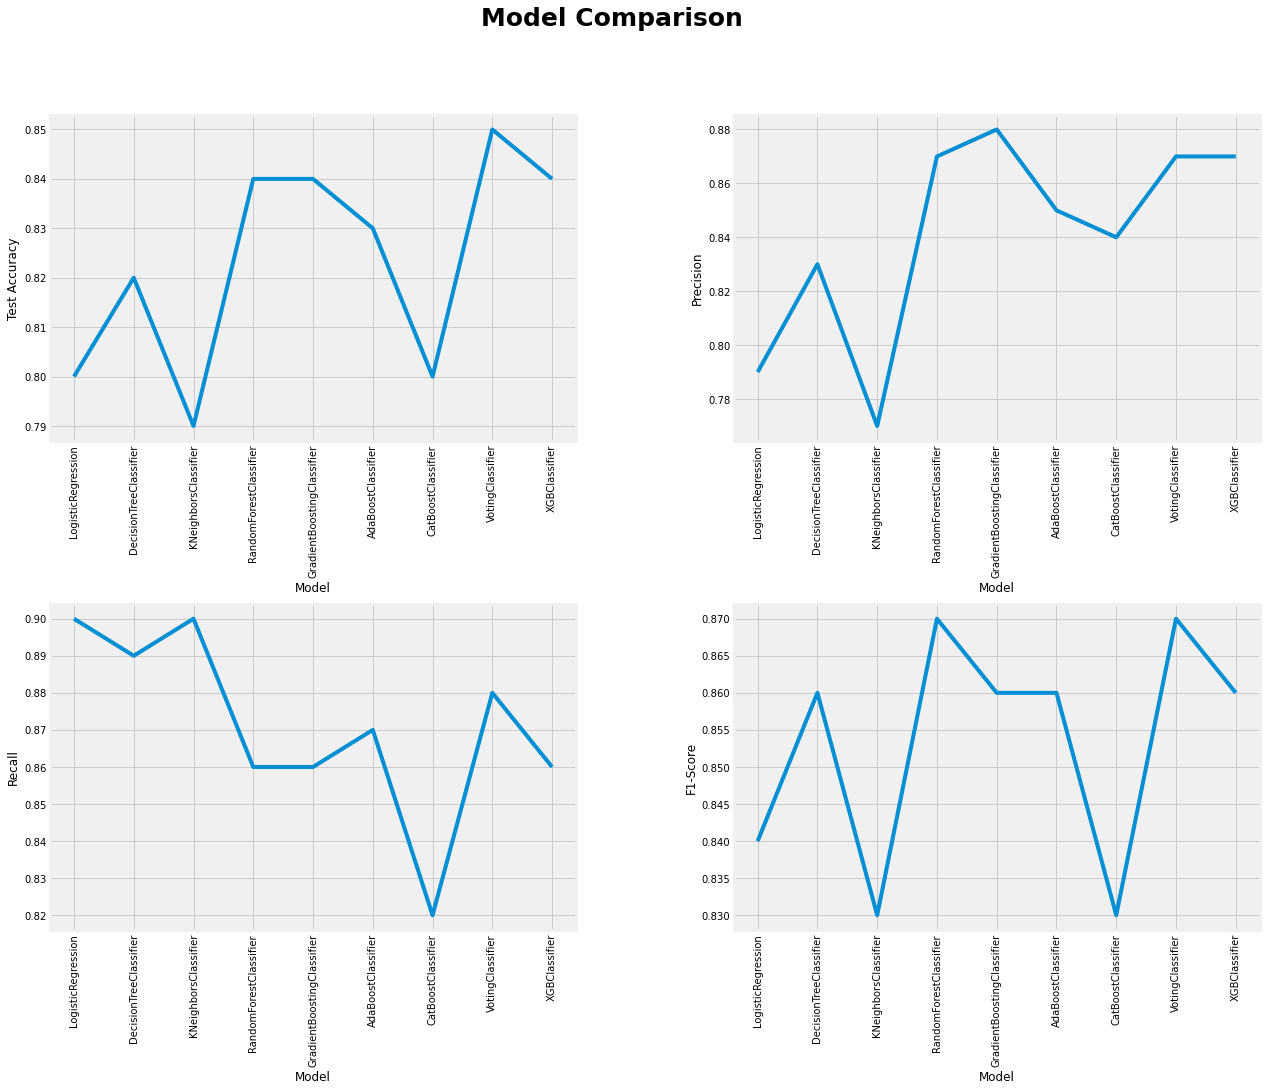

In [247]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
#plots1=sns.barplot(x=df_score_table1['Model'],y=df_score_table1['Test Accuracy'])
plots1=sns.lineplot(x=df_score_table1['Model'],y=df_score_table1['Test Accuracy'])
plt.xticks(rotation=90)

plt.subplot(2,2,2)
#plots2=sns.barplot(x=df_score_table1['Model'],y=df_score_table1['Precision'])
plots2=sns.lineplot(x=df_score_table1['Model'],y=df_score_table1['Precision'])
plt.xticks(rotation=90)

plt.subplot(2,2,3)
#plots3=sns.barplot(x=df_score_table1['Model'],y=df_score_table1['Recall'])
plots3=sns.lineplot(x=df_score_table1['Model'],y=df_score_table1['Recall'])
plt.xticks(rotation=90)

plt.subplot(2,2,4)
#plots4=sns.barplot(x=df_score_table1['Model'],y=df_score_table1['F1-Score'])
plots4=sns.lineplot(x=df_score_table1['Model'],y=df_score_table1['F1-Score'])
plt.xticks(rotation=90)


# plots=[plots1,plots2,plots3,plots4]
# for plot in plots:
#     for p in plot.patches:
#         x=p.get_bbox().get_points()[:,0]
#         y=p.get_bbox().get_points()[1,1]
#         plot.annotate('{:.2f}%'.format(100*y), (x.mean(), y), 
#                 ha='center', va='bottom') # set the alignment of the text
plt.subplots_adjust(right=1.2,wspace=0.3,hspace=0.5)
plt.suptitle('Model Comparison',fontsize=25,fontweight='bold',x=0.60)
plt.show()

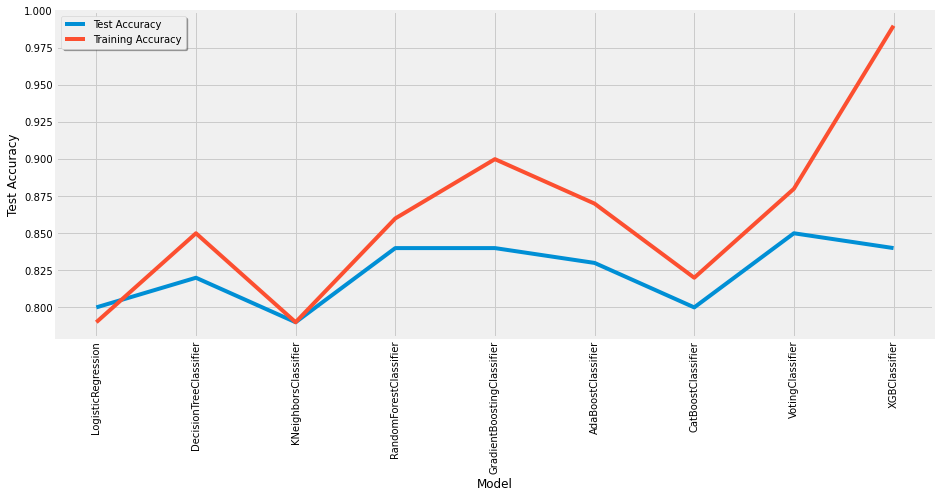

In [248]:
plt.figure(figsize=(14,6))
sns.lineplot(x=df_score_table1['Model'],y=df_score_table1['Test Accuracy'])
sns.lineplot(x=df_score_table1['Model'],y=df_score_table1['Training Accuracy'])
plt.legend(['Test Accuracy','Training Accuracy'],shadow =True)
plt.xticks(rotation=90)
plt.show()

### ***Prediction***
for prediction on new data:
* *1.* Preprocess the data(Add new column,Treat duplicate etc)
* *2.* Feature selection
* *3.* Make Prediction

In [249]:
# preprocessing function for new test data
def TestDataPreprocessing(dataframe,encoding,scalling,features):
    df_copy=dataframe.copy()
    
    # Encoding
    columns=['Gender', 'EducationLevel','Promotion']
    df_copy=convertToNumerical(df_copy,columns,encoding)
    
    df_copy=convertToNumerical(df_copy,['City'],'target')
    
        
    #dropping unnecessary columns
    column=['MMM-YY', 'EmpID','DateofJoining', 'LastWorkingDate','Age','Salary']
    df_copy.drop(column,axis=1,inplace=True)
    
    # scalling the data
    if(scalling=='minmax'):
       # print('MinMax Scalling done..')
        df_copy=MinMaxScalling(df_copy)
    elif(scalling=='robust'):
        #print('Robust Scalling done..')
        df_copy=RobustScalling(df_copy)
    elif(scalling=='power'):
        #print('Power Transform done..')
        df_copy=RobustScalling(df_copy)
    else:
        #print('Standard Scalling done..')
        df_copy=StandardScalling(df_copy)

    X=df_copy[features]
    return X

In [250]:
#function to make prediction on unseen data
def Prediction(data,modelpath,features):
    #check if we have single record or multiple
    if(type(data)==dict):
        dataframe=pd.DataFrame(data,index=[0])
        X=TestDataPreprocessing(dataframe,'label','standard',features)
    else:
        dataframe=data
        X=TestDataPreprocessing(data,'label','standard',features)
    
    #load the model and make prediction
    loaded_model = pickle.load(open(modelpath, 'rb'))
    
    result = loaded_model.predict(X)
    #predict_prob=loaded_model.predict_proba(X)
    
    data_result=pd.concat([dataframe['EmpID'],pd.DataFrame(pd.Series(result))],axis=1)
    data_result.columns=['EmpID','Result']
    return data_result,result,loaded_model,X

In [266]:
def MakePrediction(path,data,model,model_name,features):
    df_score_table1=pd.read_csv('final_models.csv')
    #preprocess the data
    dataframe=Preprocess(path,data)
    #making prediction
    #features=df_score_table1[df_score_table1['Model']==model_name]['Features'].tolist()
    #features=['Gender','City','EducationLevel','JoiningDesination','TotalBusinessValue','QuarterlyRating','TotalBusinessValue_change','Retention_years']
    modelname=model
    modelpath = f'./Final_Models/{modelname}.sav'
    
    
    #call the prediction function
    data_result,result,loaded_model,X=Prediction(dataframe,modelpath,features)
    data_result['Actual']=dataframe['Resign']
    
    return data_result,loaded_model,X

In [267]:
model='RandomForestClassifier_Acc_0.84_f1_0.87'
model_name='RandomForestClassifier'
features=['Gender','City','EducationLevel','JoiningDesignation','TotalBusinessValue','QuarterlyRating','TotalBusinessValue_change','Retention_years']
data_result,loaded_model,X=MakePrediction('./','validation.csv',model,model_name,features)
data_result

File: validation.csv
Loading CSV file...

Change in Value Column added..
Change in Value Column added..
Change in Value Column added..
Change in Value Column added..

Resign,Hike and Promotion column added,..
intervals in  Salary
: [(54912.333, 87069.667], (22658.528, 54912.333], (87069.667, 119227.0]]
Categories (3, interval[float64, right]): [(22658.528, 54912.333] < (54912.333, 87069.667] < (87069.667, 119227.0]]
BinnedSalary column added,..
intervals in  Age
: [(25.983, 31.667], (37.333, 43.0], (31.667, 37.333]]
Categories (3, interval[float64, right]): [(25.983, 31.667] < (31.667, 37.333] < (37.333, 43.0]]
BinnedAge column added,..



Before Removing the duplicates:30
Removing the Duplicate
After Removing the duplicates:17

No. of Cases where Date of Joining is later than Last Working Date: 0
No. of cases where employees have got more than 1 promotion per year:  0
Max no. of promotions per year:  0.6993006993006994



EmpID  Result Actual
0       8       1      1
1      12       1      1
2      13       1      1
3      16       1      1
4      17       1      1
5      18       1      1
6      20       1      1
7      21       1      1
8      22       1      1
9      24       1      1
10     29       1      1
11     30       1      1
12      1       0      0
13      2       1      0
14      4       0      0
15      5       0      0
16      6       0      0

### ***Deep Learning Classification Model***

In [270]:
# function for deep learning classification model
def ANNModel(X_train,y_train,X_test,y_test):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import Adam,Adamax
    from tensorflow.keras.callbacks import EarlyStopping
    
    from tensorflow.keras.callbacks import EarlyStopping
    # we need to monitor the validation loss and it should be minmum and wait for 10 ecpoch even after we have detected first EarlyStop
    early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
    
    model=Sequential()
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    #optimizer
    opt = Adam(learning_rate=0.01, beta_1=0.9)
    
    # finally compile our model with optimizer(adam) and a loss functon (Exa: for LR->RMSE,MSE etc)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit the model
    model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop],batch_size=10)
    
    y_pr=model.predict(X_test).round()
    cm=confusion_matrix(y_test,y_pr)
    
    print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
    print('Precision:%.2f'%precision_score(y_test, y_pr,average='weighted'))
    print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
    print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
    report=classification_report(y_test,y_pr)
    print(report)
    
    plt.figure(figsize=(16,6))
    sns.heatmap(cm,annot=True,fmt='d')
    
    modelname='ANNModel.sav'
    filename = f'./Final_Models/'
    model.save(filepath=filename)
    
    return model

In [271]:
LR_DF=BestModelDatasetDF[BestModelDatasetDF['Model']=='RandomForestClassifier']
LR_DF['Dataset Variation']

5    'label','minmax','under','rfcv'
Name: Dataset Variation, dtype: object

In [272]:
DROP_COLUMN=LR_DF['Drop Columns'].tolist()[0]
model=RandomForestClassifier()
X_train,X_test,y_train,y_test,X,y,features_df_new,finalData=FeatureSelectionPipeline(testing_df,'label','standarf','under','rfcv',7,DROP_COLUMN,model)

In [273]:
features_df_new

Rank
Gender                        1
City                          1
EducationLevel                1
JoiningDesignation            1
Designation                   1
TotalBusinessValue            1
QuarterlyRating               1
Designation_change            1
TotalBusinessValue_change     1
QuarterlyRating_change        1
Hike%                         1
Promotion                     1
BinnedSalary                  1
BinnedAge                     1
Retention_years               1
YearsOfExperience             1

Epoch 1/100
150/150 [==============================] - 2s 4ms/step - loss: 0.5070 - accuracy: 0.7627 - val_loss: 0.4671 - val_accuracy: 0.7633
Epoch 2/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.7907 - val_loss: 0.4711 - val_accuracy: 0.7979
Epoch 3/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8060 - val_loss: 0.4715 - val_accuracy: 0.8059
Epoch 4/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8100 - val_loss: 0.4609 - val_accuracy: 0.7952
Epoch 5/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8147 - val_loss: 0.4451 - val_accuracy: 0.7926
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8247 - val_loss: 0.4727 - val_accuracy: 0.8005
Epoch 7/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8147 - val_loss: 0.4576 - val_accuracy: 0.7793

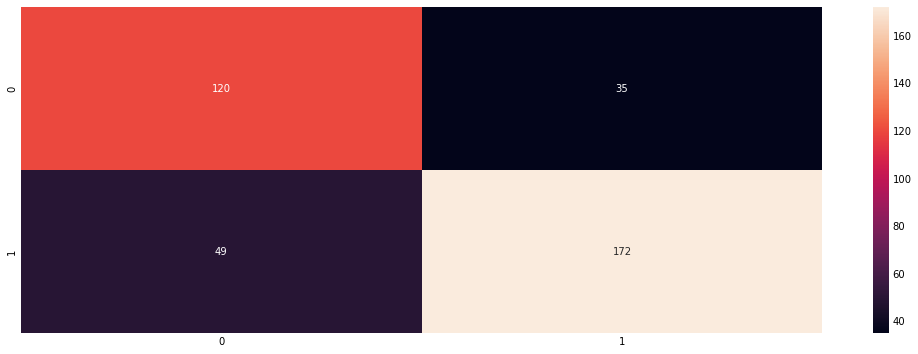

In [275]:
ann_model=ANNModel(X_train,y_train,X_test,y_test)

## ***Conclusion / Recommendations***
The maximum test accuracy achieved among all the models is 0.85 with the train accuracy of
0.90, precision of {0: 0.88, 1: 0.86} and recall of {0: 0.83, 1:0.86}. These results are achieved by
Gradient Boosting Classifier with the best parameters concluded from Randomized Search CV
implementation on Balanced Binned Derived dataset.
Out of the top 9 models in terms of test accuracy, ensemble Classifier models are giving the good result.


After Gradient Boosting Classifier, AdaBoost with best parameters concluded from RFCV when
trained on Stdscaled Balanced Binned Data is giving the best results – test accuracy: 0.83, train
accuracy: 0.87, precision: {0: 0.85, 1: 0.87} and recall {0: 0.78, 1: 0.87}.
Another Classifier named Random Forest when implemented with RFECV and trained on
Balanced Derived Data reaches the bracket of test accuracy >=0.84. It resulted in test accuracy:
0.85, train accuracy: 0.86 precision: {0: 0.87, 1: 0.86} and recall {0: 0.80, 1: 0.87}.

Thus, the top 3 algorithm implementations concluded are –
* Gradient Boosting Classifier
* AdaBoost Classifier
* Random Forest Classifier

The above mentioned top 3 models are recommended for Employee Attrition Prediction for the
given feature set and data.
Since the given data spans over 2 years of reporting only. It is recommended to acquire data that
covers records from larger duration of reporting for model building to achieve best results.